In [1]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configuration des visualisations
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Assumons que votre dataset est stocké dans un fichier CSV
# Si ce n'est pas le cas, adaptez le code à votre situation
try:
    # Tentative de chargement depuis un fichier
    df = pd.read_csv('ufc_data.csv')
except:
    # Si échec, demander à l'utilisateur de passer son dataframe
    print("Veuillez assigner votre DataFrame à la variable 'df'")
    # Par exemple: df = votre_dataframe_existant

# Aperçu des premières lignes
print("Aperçu des 5 premières lignes:")
display(df.head())

# Dimensions du dataset
print(f"\nDimensions du dataset: {df.shape[0]} lignes et {df.shape[1]} colonnes")

Aperçu des 5 premières lignes:


,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Emmett vs. Murphy,Josh Emmett,Lerone Murphy,Blue,Featherweight,0.0,Men,Decision - Unanimous,5.0,5.0,...,0.0,-7.62,-0.78,1.98,-0.19,-0.17,-0.01,-0.06,-0.4,-0.36
1,UFC Fight Night: Emmett vs. Murphy,Pat Sabatini,Joanderson Brito,Red,Featherweight,0.0,Men,Decision - Unanimous,3.0,3.0,...,0.0,-5.08,-0.61,-1.27,0.12,-0.20,0.07,-0.06,0.8,1.49
2,UFC Fight Night: Emmett vs. Murphy,Cortavious Romious,ChangHo Lee,Blue,Bantamweight,0.0,Men,KO/TKO,2.0,3.0,...,0.0,-2.54,-3.01,1.11,-0.29,0.33,0.00,0.27,0.4,-0.98
3,UFC Fight Night: Emmett vs. Murphy,Brad Tavares,Gerald Meerschaert,Red,Middleweight,0.0,Men,Decision - Unanimous,3.0,3.0,...,0.0,-7.62,0.37,-0.15,-0.02,-0.05,0.02,0.39,-1.4,-1.15
4,UFC Fight Night: Emmett vs. Murphy,Ode Osbourne,Luis Gurule,Red,Flyweight,0.0,Men,KO/TKO,2.0,3.0,...,0.0,22.86,-2.14,0.08,-0.08,0.12,-0.12,0.15,0.6,0.43



Dimensions du dataset: 7973 lignes et 95 colonnes


In [3]:
# Information sur les types de données
print("Types de données:")
display(df.dtypes)

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Valeurs manquantes', 'Pourcentage (%)']
missing_data = missing_data[missing_data['Valeurs manquantes'] > 0].sort_values('Pourcentage (%)', ascending=False)

print("\nAnalyse des valeurs manquantes:")
if len(missing_data) > 0:
    display(missing_data)
else:
    print("Aucune valeur manquante détectée!")

# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées: {duplicates}")

Types de données:


event_name             object
r_fighter              object
b_fighter              object
winner                 object
weight_class           object
                       ...   
td_acc_total_diff     float64
str_def_total_diff    float64
td_def_total_diff     float64
sub_avg_diff          float64
td_avg_diff           float64
Length: 95, dtype: object


Analyse des valeurs manquantes:


,Valeurs manquantes,Pourcentage (%)
reach_diff,1035,12.981312
b_reach,886,11.112505
r_reach,411,5.154898
age_diff,200,2.508466
b_age,180,2.257619
...,...,...
b_height,21,0.263389
weight_diff,20,0.250847
b_weight,19,0.238304
r_height,5,0.062712



Nombre de lignes dupliquées: 0


Distribution de la variable 'winner':


winner
Red     5150
Blue    2801
Name: count, dtype: int64

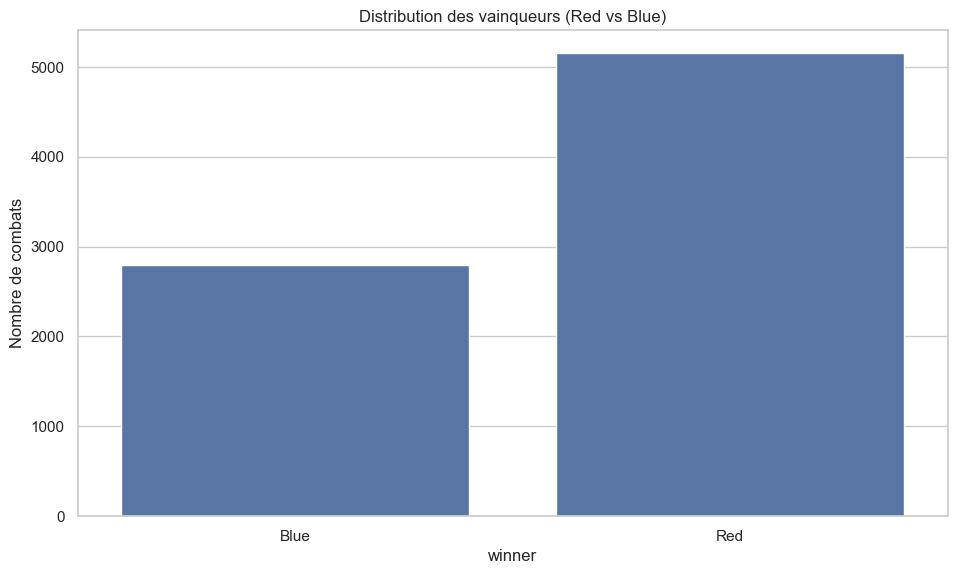

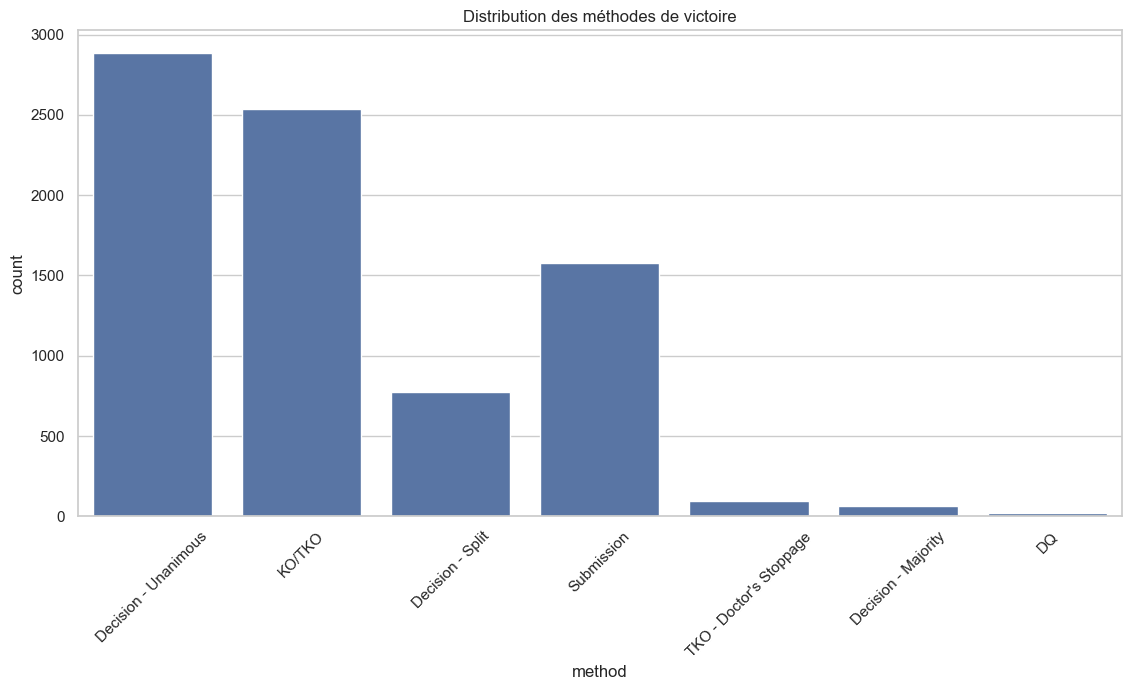

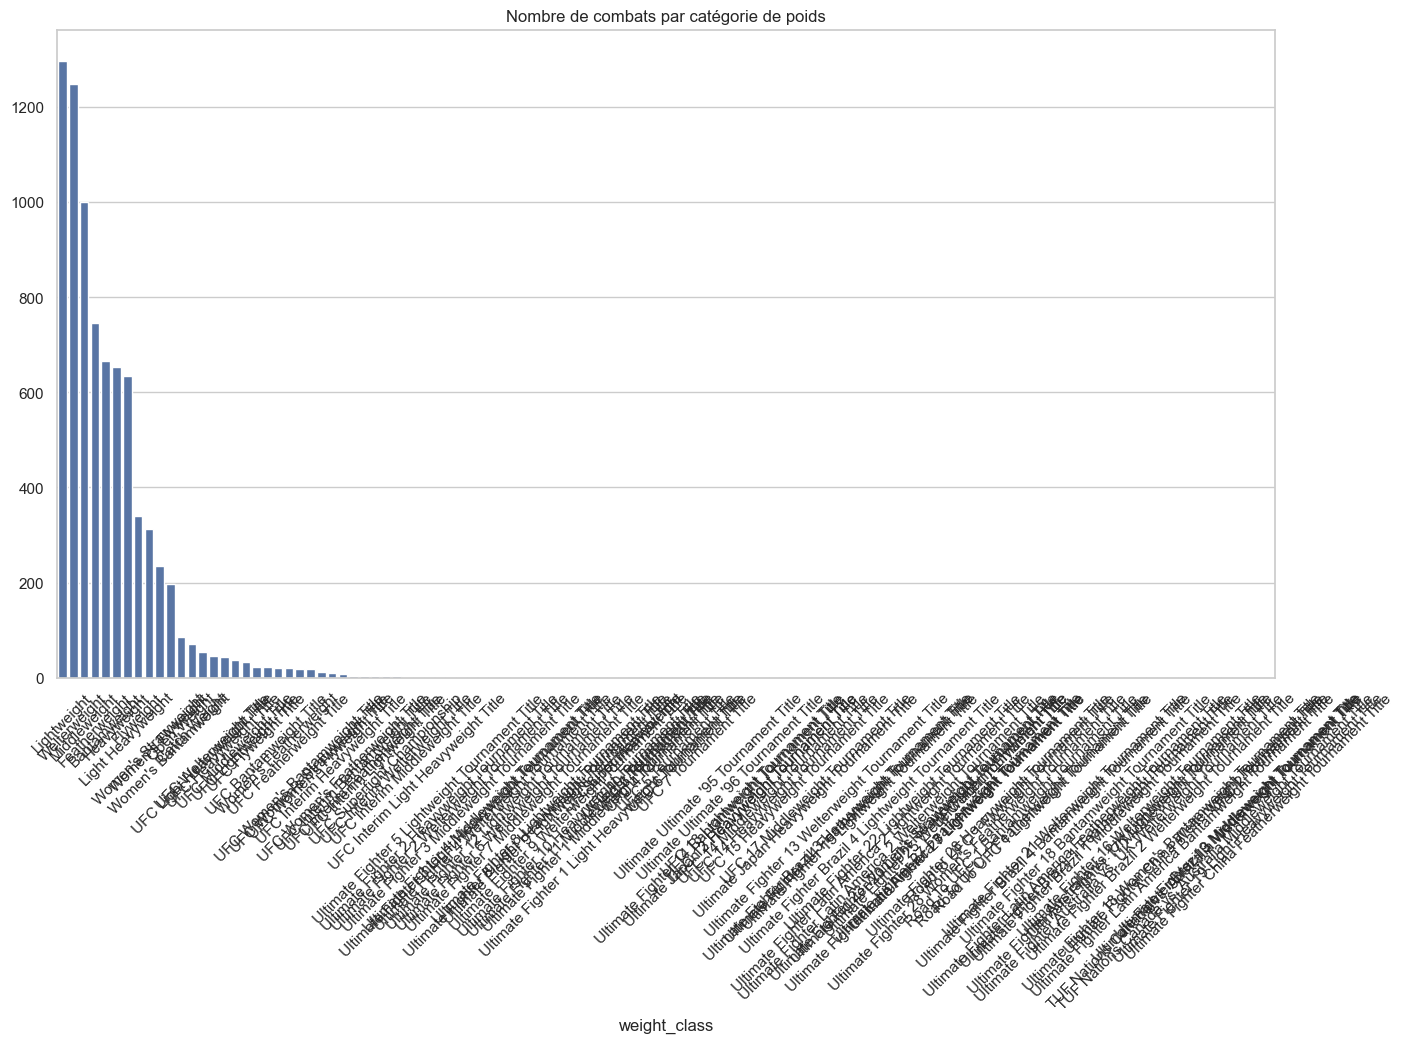

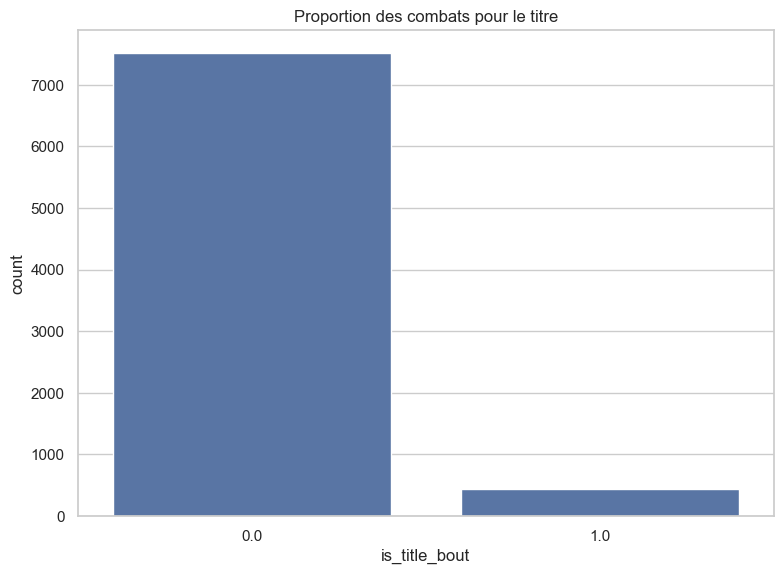


Statistiques descriptives des variables numériques importantes:


,is_title_bout,finish_round,total_rounds,time_sec,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
count,7951.000000,7951.000000,7922.000000,7951.000000,7951.000000,7951.000000,7951.000000,7951.000000,7951.000000,7951.000000,...,7953.000000,6938.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000
mean,0.055213,2.353666,3.139233,228.149289,0.246384,39.028676,84.889699,0.476244,58.839266,107.555150,...,0.163782,0.223321,0.139046,-0.162298,0.011203,0.025633,0.020199,0.036588,0.035482,0.120431
std,0.228410,1.016189,0.642460,97.222784,0.519837,33.068424,71.534836,0.163793,46.002645,79.841275,...,6.649094,8.239229,1.563025,1.626941,0.117448,0.273078,0.110874,0.287581,1.001248,1.744361
min,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-258.550000,-27.940000,-10.560000,-20.230000,-0.700000,-1.000000,-0.580000,-1.000000,-15.100000,-11.770000
25%,0.000000,1.000000,3.000000,152.000000,0.000000,14.000000,29.000000,0.370000,22.000000,41.000000,...,0.000000,-5.080000,-0.870000,-1.050000,-0.060000,-0.130000,-0.040000,-0.140000,-0.400000,-0.870000
50%,0.000000,3.000000,3.000000,290.000000,0.000000,31.000000,68.000000,0.470000,51.000000,96.000000,...,0.000000,0.000000,0.120000,-0.110000,0.010000,0.020000,0.010000,0.020000,0.000000,0.080000
75%,0.000000,3.000000,3.000000,300.000000,0.000000,56.000000,121.000000,0.570000,84.000000,157.000000,...,0.000000,5.080000,1.150000,0.810000,0.080000,0.180000,0.080000,0.210000,0.500000,1.120000
max,1.000000,5.000000,5.000000,1080.000000,5.000000,445.000000,744.000000,1.000000,447.000000,746.000000,...,52.160000,33.020000,7.720000,12.640000,0.830000,1.000000,0.720000,1.000000,11.800000,11.110000


In [4]:
# Analyse de la variable cible (winner)
print("Distribution de la variable 'winner':")
winner_counts = df['winner'].value_counts()
display(winner_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='winner', data=df)
plt.title('Distribution des vainqueurs (Red vs Blue)')
plt.ylabel('Nombre de combats')
plt.show()

# Distribution des méthodes de victoire
plt.figure(figsize=(12, 6))
sns.countplot(x='method', data=df)
plt.title('Distribution des méthodes de victoire')
plt.xticks(rotation=45)
plt.show()

# Distribution par catégorie de poids
plt.figure(figsize=(14, 8))
weight_counts = df['weight_class'].value_counts()
sns.barplot(x=weight_counts.index, y=weight_counts.values)
plt.title('Nombre de combats par catégorie de poids')
plt.xticks(rotation=45)
plt.show()

# Proportion des combats pour le titre
plt.figure(figsize=(8, 6))
sns.countplot(x='is_title_bout', data=df)
plt.title('Proportion des combats pour le titre')
plt.show()

# Statistiques descriptives pour les variables numériques clés
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nStatistiques descriptives des variables numériques importantes:")
display(df[numeric_columns].describe())

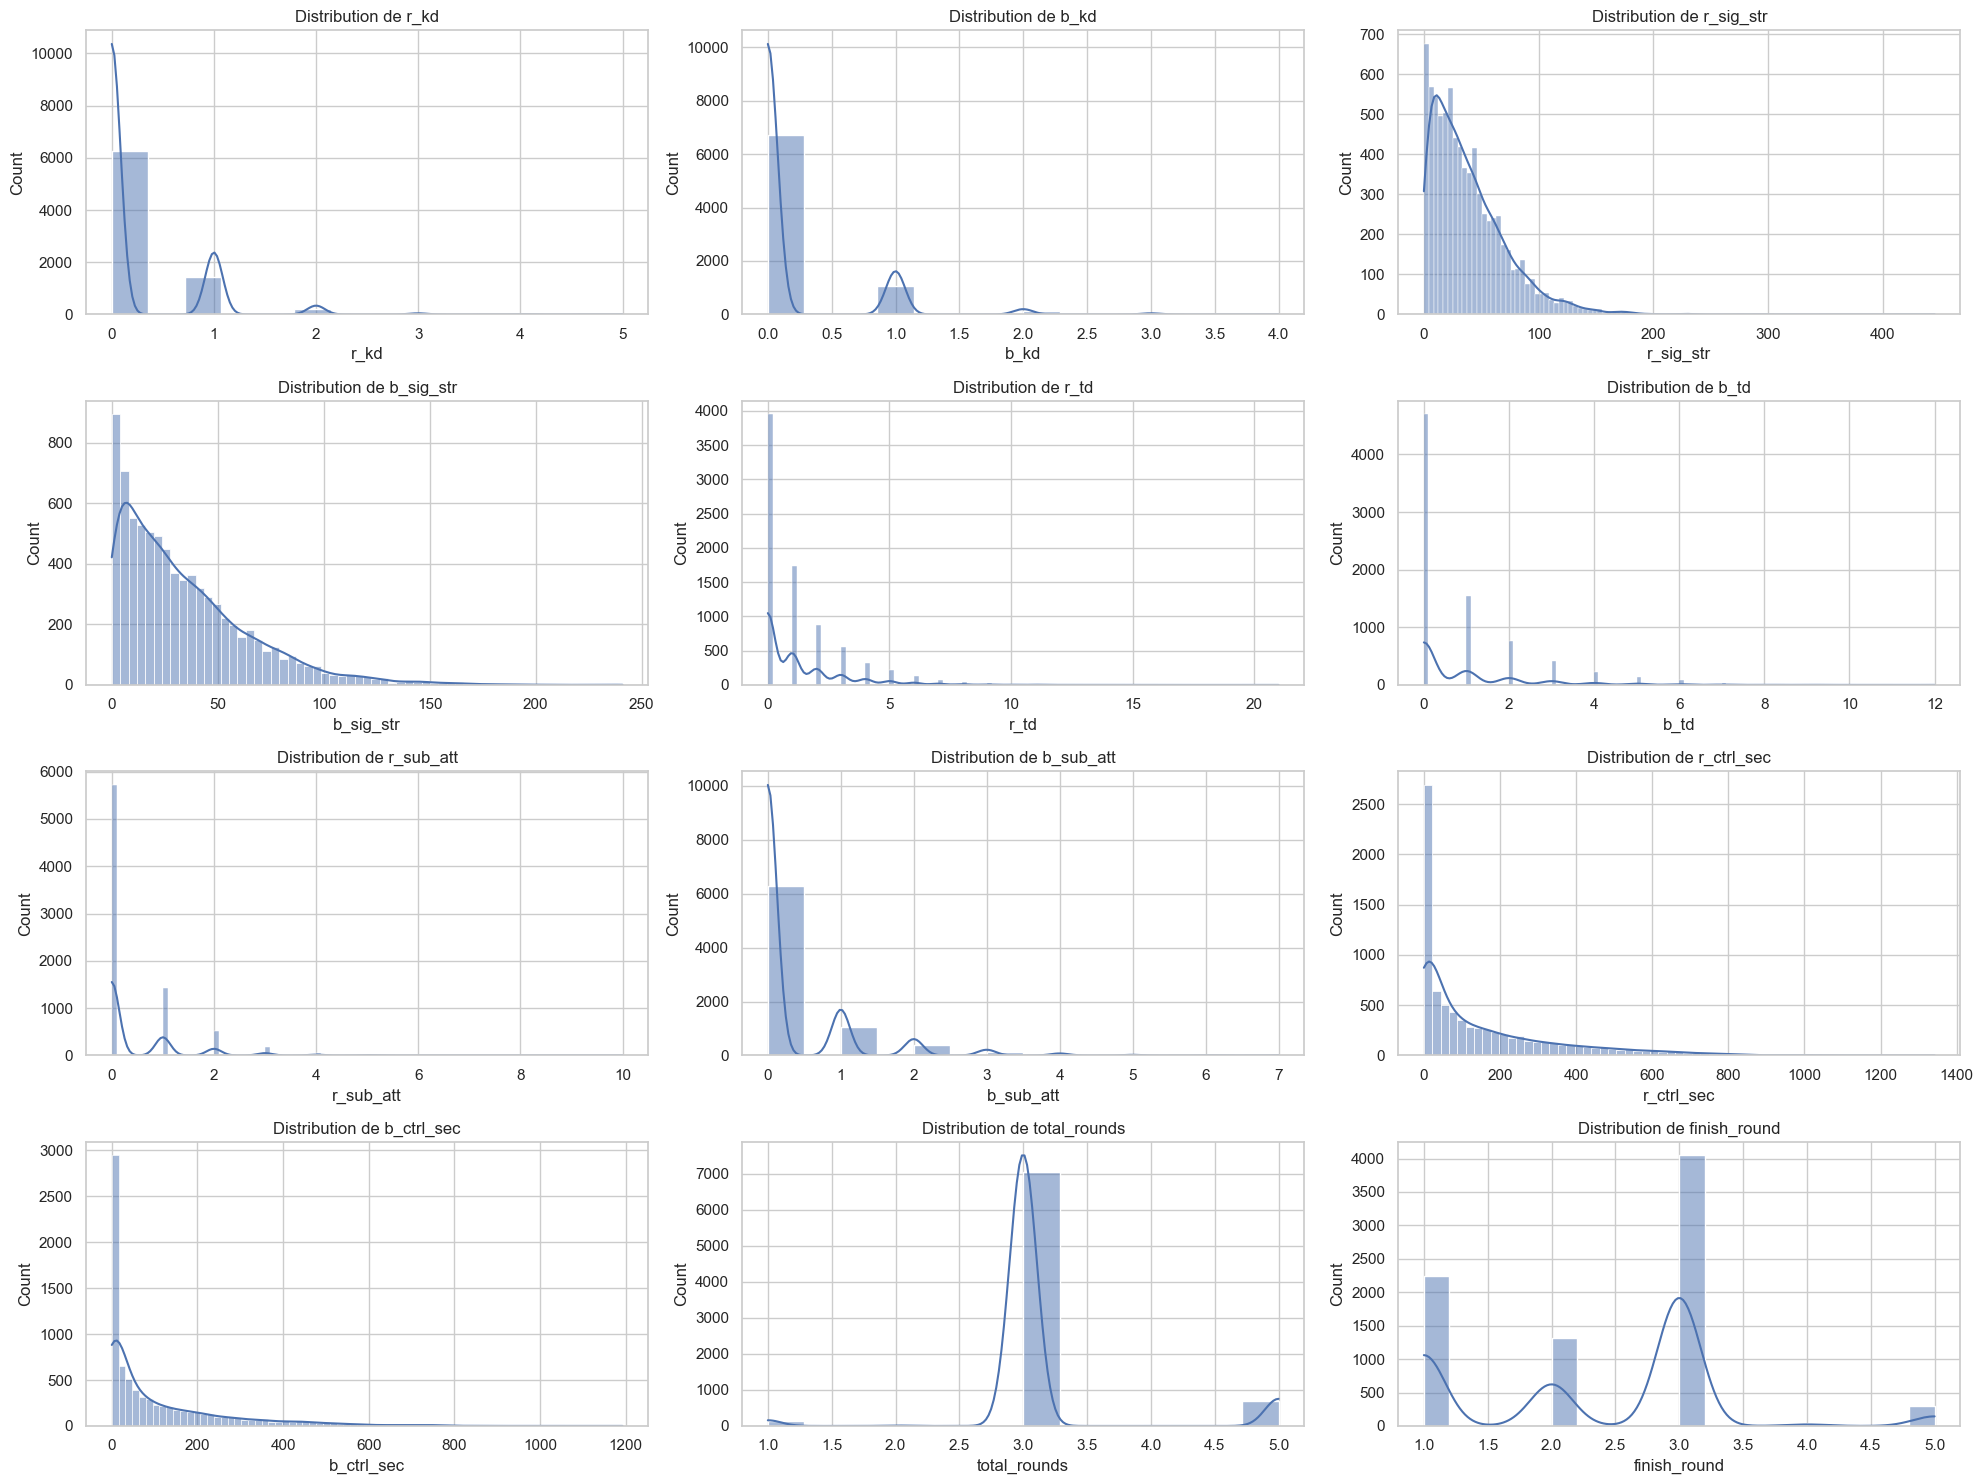

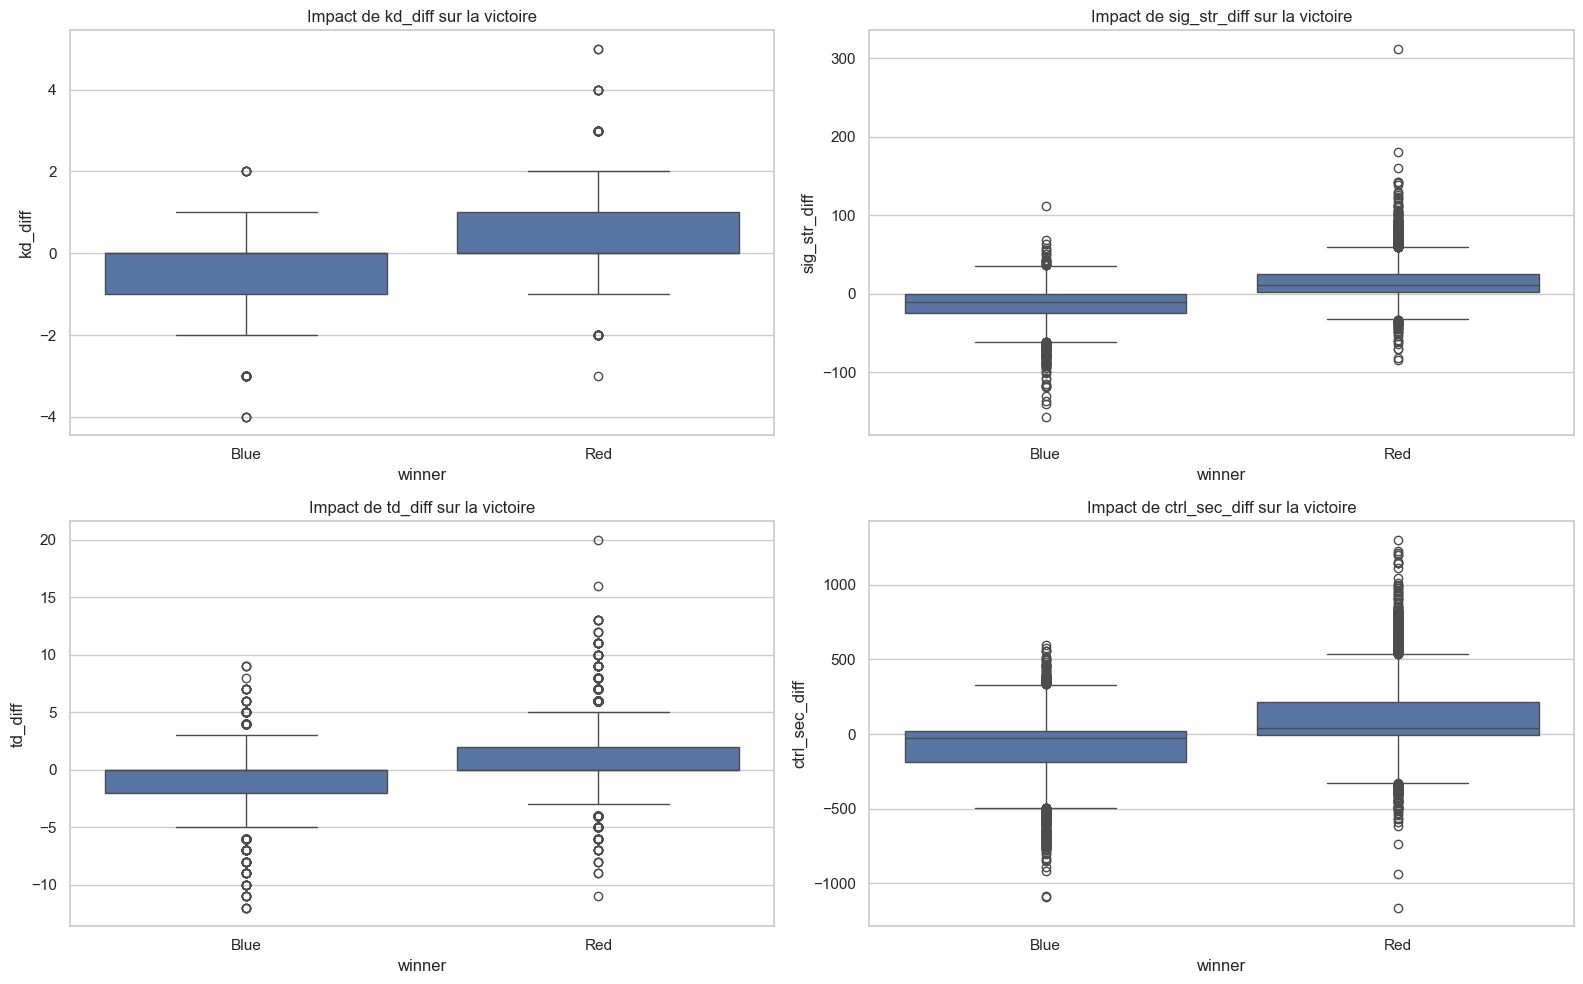

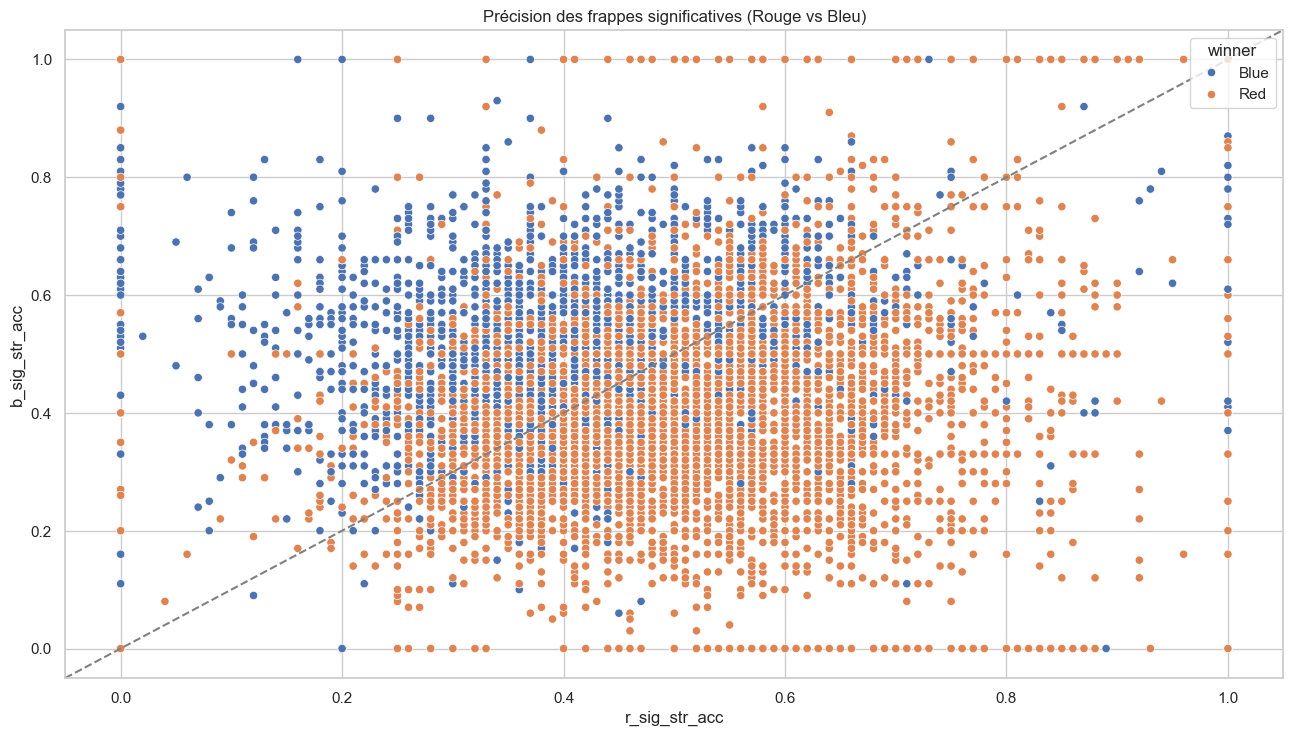

In [5]:
# Sélection de variables importantes pour l'analyse
key_vars = ['r_kd', 'b_kd', 'r_sig_str', 'b_sig_str', 'r_td', 'b_td', 
            'r_sub_att', 'b_sub_att', 'r_ctrl_sec', 'b_ctrl_sec', 
            'total_rounds', 'finish_round']

# Histogrammes pour les variables clés
plt.figure(figsize=(20, 15))
for i, var in enumerate(key_vars):
    if var in df.columns:
        plt.subplot(4, 3, i+1)
        sns.histplot(df[var], kde=True)
        plt.title(f'Distribution de {var}')
plt.tight_layout()
plt.show()

# Boxplots pour comparer les statistiques des vainqueurs vs perdants
comparison_vars = ['kd_diff', 'sig_str_diff', 'td_diff', 'ctrl_sec_diff']
plt.figure(figsize=(16, 10))
for i, var in enumerate(comparison_vars):
    if var in df.columns:
        plt.subplot(2, 2, i+1)
        sns.boxplot(x='winner', y=var, data=df)
        plt.title(f'Impact de {var} sur la victoire')
plt.tight_layout()
plt.show()

# Comparaison des statistiques relatives selon le vainqueur
plt.figure(figsize=(14, 8))
sns.scatterplot(x='r_sig_str_acc', y='b_sig_str_acc', hue='winner', data=df)
plt.title('Précision des frappes significatives (Rouge vs Bleu)')
plt.axline([0, 0], [1, 1], color='gray', linestyle='--')
plt.show()

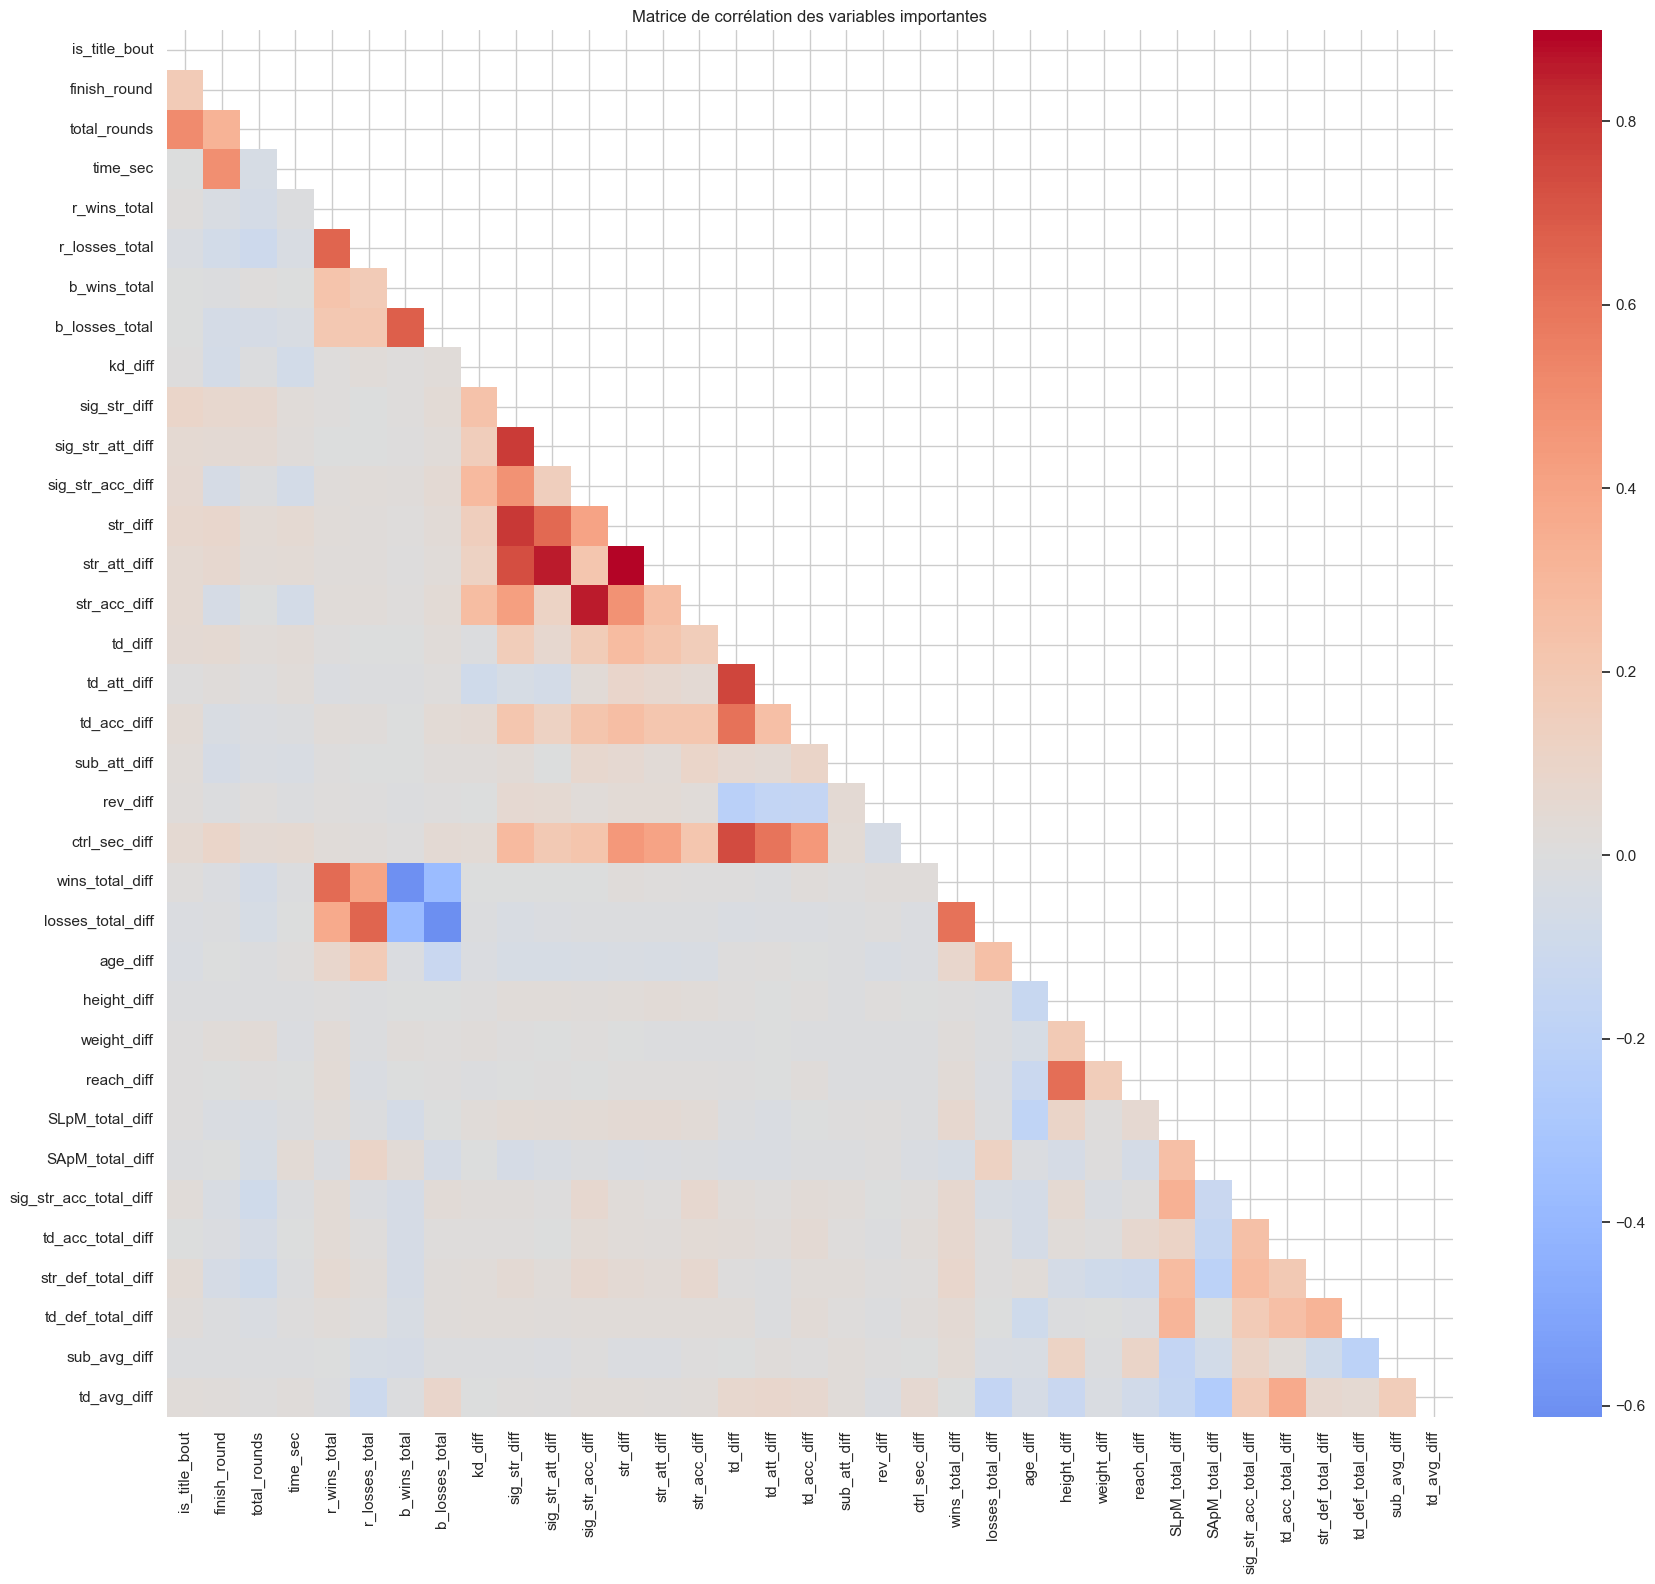

Top 10 des corrélations avec le différentiel de frappes significatives:


str_diff            0.797191
sig_str_att_diff    0.788272
str_att_diff        0.732942
sig_str_acc_diff    0.474006
str_acc_diff        0.423068
ctrl_sec_diff       0.280600
kd_diff             0.236425
td_acc_diff         0.208882
td_diff             0.161150
is_title_bout       0.092944
Name: sig_str_diff, dtype: float64

In [6]:
# Sélection de variables numériques pertinentes pour l'analyse de corrélation
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns
correlation_vars = []

# On évite les variables redondantes et on se concentre sur les différentiels
for var in numeric_vars:
    if not (var.endswith('_diff') or var.startswith('r_') or var.startswith('b_')) or var in ['r_wins_total', 'b_wins_total', 'r_losses_total', 'b_losses_total']:
        correlation_vars.append(var)
    elif var.endswith('_diff'):
        correlation_vars.append(var)

# Matrice de corrélation
correlation_matrix = df[correlation_vars].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(18, 16))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables importantes')
plt.tight_layout()
plt.show()

# Top 10 des corrélations importantes avec le différentiel de score
if 'sig_str_diff' in correlation_vars:
    sig_str_corr = correlation_matrix['sig_str_diff'].sort_values(ascending=False)
    print("Top 10 des corrélations avec le différentiel de frappes significatives:")
    display(sig_str_corr[1:11])  # Exclut la corrélation avec lui-même

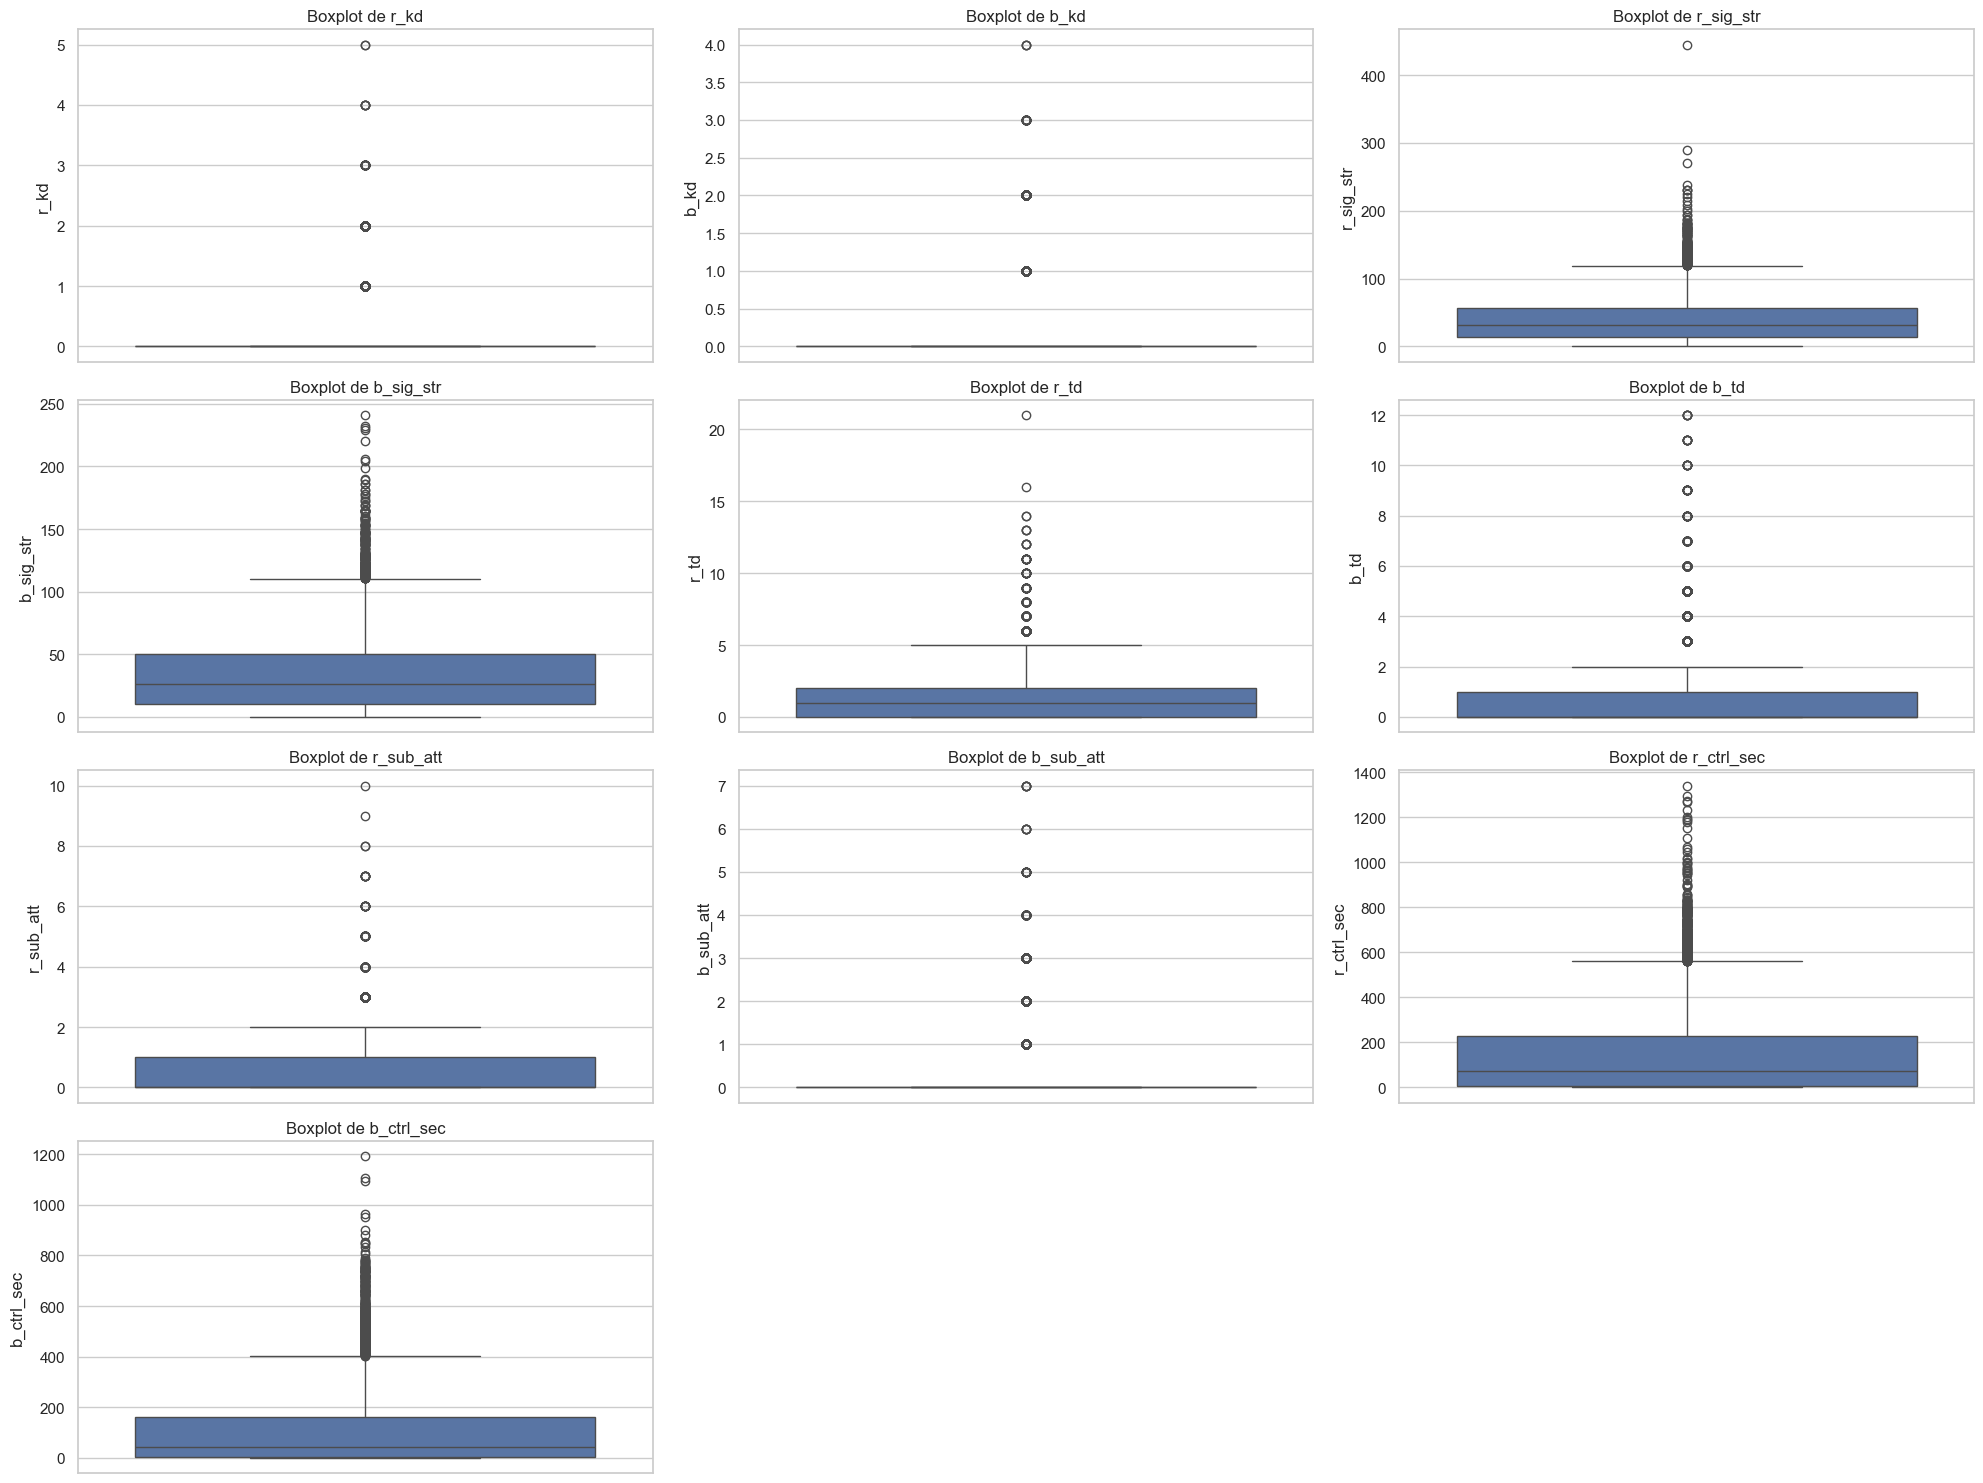

Nombre total de valeurs manquantes après traitement: 0


In [7]:
# Création d'une copie du DataFrame pour les transformations
df_clean = df.copy()

# Identification des valeurs aberrantes pour les variables numériques clés
def plot_boxplots_with_outliers(dataframe, variables):
    plt.figure(figsize=(20, 15))
    for i, var in enumerate(variables):
        if var in dataframe.columns and dataframe[var].dtype in ['float64', 'int64']:
            plt.subplot(4, 3, i+1)
            sns.boxplot(y=dataframe[var])
            plt.title(f'Boxplot de {var}')
    plt.tight_layout()
    plt.show()

# Variables importantes pour détecter les valeurs aberrantes
outlier_check_vars = ['r_kd', 'b_kd', 'r_sig_str', 'b_sig_str', 'r_td', 'b_td', 
                      'r_sub_att', 'b_sub_att', 'r_ctrl_sec', 'b_ctrl_sec']

plot_boxplots_with_outliers(df_clean, outlier_check_vars)

# Fonction pour traiter les valeurs manquantes
def handle_missing_values(dataframe):
    # Colonnes numériques
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = dataframe.select_dtypes(include=['object']).columns
    
    # Imputation des valeurs manquantes
    for col in numeric_cols:
        if dataframe[col].isnull().sum() > 0:
            median_value = dataframe[col].median()
            dataframe[col].fillna(median_value, inplace=True)
    
    for col in categorical_cols:
        if dataframe[col].isnull().sum() > 0:
            mode_value = dataframe[col].mode()[0]
            dataframe[col].fillna(mode_value, inplace=True)
    
    return dataframe

# Traitement des valeurs manquantes
df_clean = handle_missing_values(df_clean)

# Vérification après traitement
missing_after = df_clean.isnull().sum().sum()
print(f"Nombre total de valeurs manquantes après traitement: {missing_after}")

Détection des valeurs aberrantes:
Nombre de valeurs aberrantes dans r_kd: 1677
Nombre de valeurs aberrantes dans b_kd: 1238
Nombre de valeurs aberrantes dans r_sig_str: 255
Nombre de valeurs aberrantes dans b_sig_str: 261
Nombre de valeurs aberrantes dans r_td: 293
Nombre de valeurs aberrantes dans b_td: 956
Nombre de valeurs aberrantes dans r_sub_att: 292
Nombre de valeurs aberrantes dans b_sub_att: 1655
Nombre de valeurs aberrantes dans r_ctrl_sec: 407
Nombre de valeurs aberrantes dans b_ctrl_sec: 526


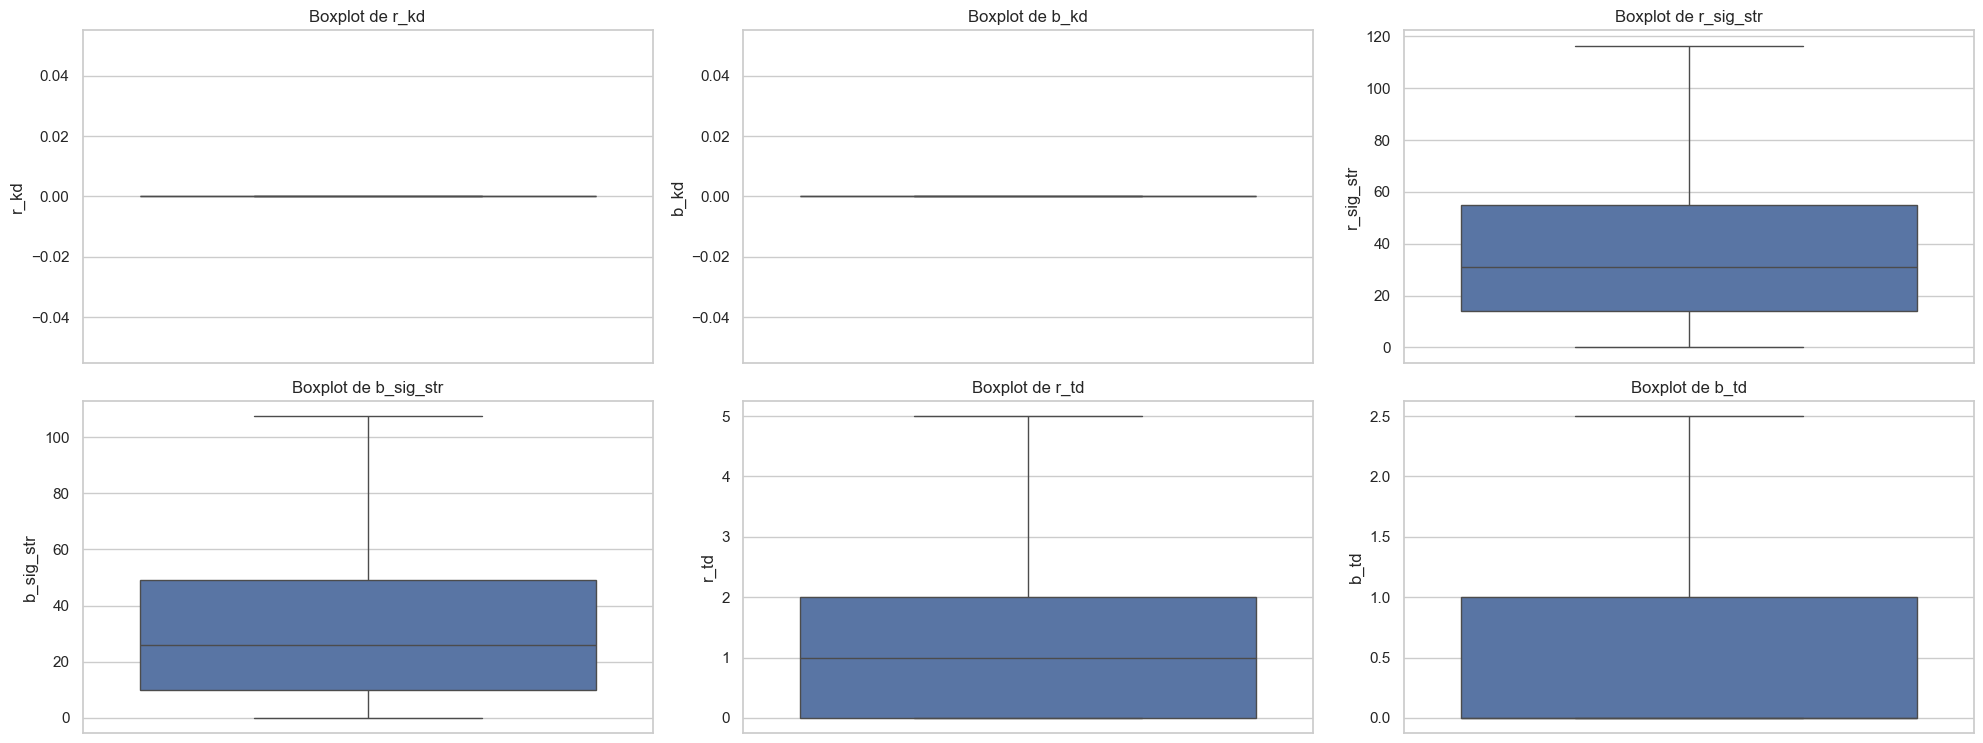

In [8]:
# Fonction pour identifier et traiter les valeurs aberrantes
def detect_and_handle_outliers(dataframe, columns, method='cap'):
    df_no_outliers = dataframe.copy()
    
    for col in columns:
        if col in dataframe.columns and dataframe[col].dtype in ['float64', 'int64']:
            # Calcul des quartiles et IQR
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Définition des limites
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identifier les outliers
            outliers = ((dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)).sum()
            print(f"Nombre de valeurs aberrantes dans {col}: {outliers}")
            
            if method == 'cap':
                # Plafonner les valeurs
                df_no_outliers[col] = np.where(df_no_outliers[col] > upper_bound, upper_bound,
                                              np.where(df_no_outliers[col] < lower_bound, lower_bound, df_no_outliers[col]))
            elif method == 'remove':
                # Alternative: supprimer les lignes (déconseillé sauf cas extrêmes)
                # Cette option est commentée car elle peut réduire considérablement le dataset
                # dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
                pass
    
    return df_no_outliers

# Traitement des valeurs aberrantes
print("Détection des valeurs aberrantes:")
df_clean = detect_and_handle_outliers(df_clean, outlier_check_vars, method='cap')

# Vérification après traitement
plot_boxplots_with_outliers(df_clean, outlier_check_vars[:6])  # Visualisation des 6 premières variables

Aperçu des données après normalisation:


,time_sec,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,r_str_acc,r_td,r_td_att,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
count,7.973000e+03,7973.0,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,...,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7.973000e+03,7973.000000,7.973000e+03,7.973000e+03
mean,-3.921219e-17,0.0,-5.703592e-17,2.851796e-17,-7.842438e-17,-1.425898e-17,-4.277694e-17,1.853667e-16,-4.990643e-17,-5.792710e-18,...,8.020676e-18,2.940914e-17,-3.564745e-18,-1.247661e-17,2.138847e-17,1.425898e-17,4.277694e-17,0.000000,-3.119152e-18,-7.129489e-18
std,1.000063e+00,0.0,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063e+00
min,-2.299029e+00,0.0,-1.275977e+00,-1.187662e+00,-2.911685e+00,-1.280368e+00,-1.348620e+00,-3.190722e+00,-7.535178e-01,-7.867911e-01,...,-3.896088e+01,-3.660617e+00,-6.845518e+00,-1.233540e+01,-6.055835e+00,-3.756056e+00,-5.413702e+00,-3.604742,-1.511756e+01,-6.816925e+00
25%,-7.856968e-01,0.0,-8.073753e-01,-7.817103e-01,-6.494806e-01,-8.014621e-01,-8.343742e-01,-6.623263e-01,-7.535178e-01,-7.867911e-01,...,-2.460288e-02,-6.862543e-01,-6.456127e-01,-5.456609e-01,-6.062862e-01,-5.699558e-01,-5.429891e-01,-0.614087,-4.349667e-01,-5.678261e-01
50%,6.349822e-01,0.0,-2.383585e-01,-2.357753e-01,-3.807393e-02,-1.701776e-01,-1.445316e-01,-3.022728e-02,-8.598476e-02,-5.198513e-01,...,-2.460288e-02,-2.528480e-02,-1.218581e-02,3.214686e-02,-1.024183e-02,-2.062821e-02,-9.199715e-02,-0.057687,-3.544025e-02,-2.317983e-02
75%,7.379300e-01,0.0,5.649593e-01,5.061364e-01,5.733328e-01,5.481806e-01,6.205665e-01,7.167988e-01,5.815483e-01,2.809681e-01,...,-2.460288e-02,6.356847e-01,6.468341e-01,5.976608e-01,5.858025e-01,5.653212e-01,5.393916e-01,0.603039,4.639678e-01,5.730645e-01
max,8.767855e+00,0.0,2.623461e+00,9.227098e+00,3.202382e+00,8.450121e+00,8.008153e+00,2.555632e+00,2.584148e+00,7.221403e+00,...,7.830420e+00,4.271017e+00,4.850485e+00,7.869432e+00,6.971992e+00,3.568312e+00,6.312088e+00,3.350268,1.175059e+01,6.300450e+00


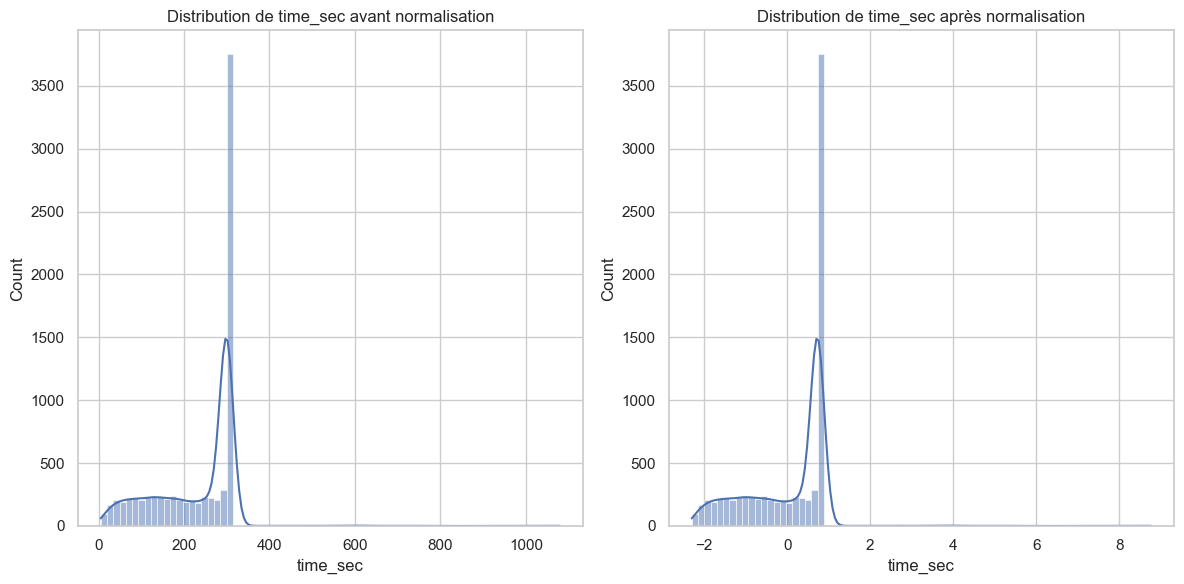

In [9]:
# Identification des variables numériques à normaliser
numeric_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclusion de certaines variables de la normalisation (si nécessaire)
exclude_from_normalization = ['winner', 'is_title_bout', 'finish_round', 'total_rounds']
numeric_to_normalize = [col for col in numeric_features if col not in exclude_from_normalization]

# Création d'un DataFrame normalisé
df_normalized = df_clean.copy()

# Application de la normalisation (StandardScaler)
scaler = StandardScaler()
df_normalized[numeric_to_normalize] = scaler.fit_transform(df_normalized[numeric_to_normalize])

# Aperçu des données normalisées
print("Aperçu des données après normalisation:")
display(df_normalized[numeric_to_normalize].describe())

# Comparaison avant/après pour une variable
sample_var = numeric_to_normalize[0]  # Première variable normalisée
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean[sample_var], kde=True)
plt.title(f'Distribution de {sample_var} avant normalisation')
plt.subplot(1, 2, 2)
sns.histplot(df_normalized[sample_var], kde=True)
plt.title(f'Distribution de {sample_var} après normalisation')
plt.tight_layout()
plt.show()

In [10]:
# Identification des variables catégorielles
categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Variables catégorielles détectées: {categorical_features}")

# Création d'un DataFrame pour l'encodage
df_encoded = df_normalized.copy()

# Encodage des variables catégorielles
for col in categorical_features:
    if col in ['r_fighter', 'b_fighter']:
        # Ces colonnes sont des identifiants et non des catégories prédictives
        continue
        
    if col in ['weight_class', 'method', 'referee', 'r_stance', 'b_stance']:
        # One-Hot Encoding pour les variables nominales avec plusieurs catégories
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
        
    elif col in ['gender']:
        # Label Encoding simple pour les variables binaires
        df_encoded[col] = df_encoded[col].map({'Men': 1, 'Women': 0})
        
    elif col == 'winner':
        # Encodage de la variable cible
        df_encoded[col] = df_encoded[col].map({'Red': 1, 'Blue': 0})

# Aperçu après encodage
print("\nAperçu des données après encodage:")
display(df_encoded.head())
print(f"Nouvelles dimensions du DataFrame: {df_encoded.shape}")

Variables catégorielles détectées: ['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class', 'gender', 'method', 'referee', 'r_stance', 'b_stance']

Aperçu des données après encodage:


,event_name,r_fighter,b_fighter,winner,is_title_bout,gender,finish_round,total_rounds,time_sec,r_kd,...,referee_Wolf Menninger,referee_Yves Lavigne,r_stance_Orthodox,r_stance_Sideways,r_stance_Southpaw,r_stance_Switch,b_stance_Orthodox,b_stance_Sideways,b_stance_Southpaw,b_stance_Switch
0,UFC Fight Night: Emmett vs. Murphy,Josh Emmett,Lerone Murphy,0,0.0,1,5.0,5.0,0.737930,0.0,...,False,False,True,False,False,False,True,False,False,False
1,UFC Fight Night: Emmett vs. Murphy,Pat Sabatini,Joanderson Brito,1,0.0,1,3.0,3.0,0.737930,0.0,...,False,False,True,False,False,False,True,False,False,False
2,UFC Fight Night: Emmett vs. Murphy,Cortavious Romious,ChangHo Lee,0,0.0,1,2.0,3.0,-0.003294,0.0,...,False,False,False,False,True,False,True,False,False,False
3,UFC Fight Night: Emmett vs. Murphy,Brad Tavares,Gerald Meerschaert,1,0.0,1,3.0,3.0,0.737930,0.0,...,False,False,True,False,False,False,False,False,True,False
4,UFC Fight Night: Emmett vs. Murphy,Ode Osbourne,Luis Gurule,1,0.0,1,2.0,3.0,-1.176898,0.0,...,False,False,False,False,True,False,True,False,False,False


Nouvelles dimensions du DataFrame: (7973, 443)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Fonction pour charger les données de combattants depuis le fichier texte
def load_fighters_stats(file_path):
    """
    Charge les statistiques des combattants depuis un fichier texte
    Format attendu: clé: valeur (une par ligne)
    Gère les valeurs manquantes ou 'None'
    """
    fighters = []
    current_fighter = {}
    
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if not line:  # Ligne vide, séparateur entre combattants
                    if current_fighter and 'name' in current_fighter:  # S'assurer qu'il y a au moins un nom
                        fighters.append(current_fighter)
                        current_fighter = {}
                elif ':' in line:
                    key, value = line.split(':', 1)
                    key = key.strip()
                    value = value.strip()
                    
                    # Gestion des valeurs manquantes
                    if value.lower() in ['none', 'nan', '', 'null']:
                        # Valeur par défaut selon le type de données attendu
                        if key in ['wins', 'losses', 'age']:
                            value = 0
                        elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                   'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                            value = 0.0
                        else:
                            value = 'Unknown'  # Pour les chaînes de caractères
                    else:
                        # Conversion des types avec gestion d'erreurs
                        try:
                            if key in ['wins', 'losses', 'age']:
                                value = int(value)
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = float(value)
                        except ValueError:
                            print(f"Avertissement: Impossible de convertir '{value}' pour '{key}', utilisation de la valeur par défaut")
                            if key in ['wins', 'losses', 'age']:
                                value = 0
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = 0.0
                    
                    current_fighter[key] = value
        
        # Ajouter le dernier combattant si présent
        if current_fighter and 'name' in current_fighter:
            fighters.append(current_fighter)
        
        # Vérification finale: s'assurer que tous les combattants ont toutes les stats requises
        required_stats = ['wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
                          'SLpM', 'sig_str_acc', 'SApM', 'str_def',
                          'td_avg', 'td_acc', 'td_def', 'sub_avg']
        
        for fighter in fighters:
            for stat in required_stats:
                if stat not in fighter:
                    if stat in ['wins', 'losses', 'age']:
                        fighter[stat] = 0
                    elif stat in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                        fighter[stat] = 0.0
                    else:
                        fighter[stat] = 'Unknown'
        
        return fighters
        
    except Exception as e:
        print(f"Erreur lors du chargement du fichier: {e}")
        return []

# Charger les statistiques des combattants
fighter_stats_path = 'fighters_stats.txt'  # Remplacer par le chemin de votre fichier

if os.path.exists(fighter_stats_path):
    try:
        fighters = load_fighters_stats(fighter_stats_path)
        print(f"Chargé {len(fighters)} combattants depuis {fighter_stats_path}")
    except Exception as e:
        print(f"Erreur lors du chargement des statistiques: {e}")
        fighters = []
else:
    print(f"Fichier {fighter_stats_path} non trouvé, utilisation des données d'exemple")
    fighters = []

# Si aucun combattant n'a été chargé ou en cas d'erreur, utiliser les exemples
if not fighters:
    print("Utilisation des deux combattants d'exemple")
    fighters = [
        {
            'name': 'Josh Emmett',
            'wins': 19,
            'losses': 5,
            'height': 167.64,
            'weight': 65.77,
            'reach': 177.8,
            'stance': 'Orthodox',
            'age': 40,
            'SLpM': 3.75,
            'sig_str_acc': 0.35,
            'SApM': 4.46,
            'str_def': 0.6,
            'td_avg': 1.09,
            'td_acc': 0.37,
            'td_def': 0.46,
            'sub_avg': 0.1
        },
        {
            'name': 'Lerone Murphy',
            'wins': 16,
            'losses': 0,
            'height': 175.26,
            'weight': 65.77,
            'reach': 185.42,
            'stance': 'Orthodox',
            'age': 33,
            'SLpM': 4.53,
            'sig_str_acc': 0.54,
            'SApM': 2.48,
            'str_def': 0.61,
            'td_avg': 1.45,
            'td_acc': 0.54,
            'td_def': 0.52,
            'sub_avg': 0.5
        }
    ]

# Convertir en DataFrame
try:
    fighters_df = pd.DataFrame(fighters)
    
    # Remplir les valeurs manquantes avec des valeurs par défaut
    for col in fighters_df.columns:
        if fighters_df[col].dtype in [np.float64, np.int64]:
            fighters_df[col] = fighters_df[col].fillna(0)
        else:
            fighters_df[col] = fighters_df[col].fillna('Unknown')
    
    # Afficher un aperçu
    print("\nAperçu des données de combattants:")
    display(fighters_df.head())
    
    # Statistiques descriptives
    print("\nStatistiques descriptives:")
    display(fighters_df.describe())
except Exception as e:
    print(f"Erreur lors de la création du DataFrame des combattants: {e}")
    # Créer un DataFrame vide avec les colonnes nécessaires
    fighters_df = pd.DataFrame(fighters)

Chargé 15946 combattants depuis fighters_stats.txt

Aperçu des données de combattants:


,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Josh Emmett,19,5,167.64,65.77,177.80,Orthodox,40,3.75,0.35,4.46,0.60,1.09,0.37,0.46,0.1
1,Lerone Murphy,16,0,175.26,65.77,185.42,Orthodox,33,4.53,0.54,2.48,0.61,1.45,0.54,0.52,0.5
2,Pat Sabatini,20,5,172.72,65.77,177.80,Orthodox,34,1.87,0.62,1.22,0.49,3.98,0.48,0.50,1.8
3,Joanderson Brito,17,5,172.72,65.77,182.88,Orthodox,30,2.48,0.50,2.49,0.42,2.49,0.68,0.56,1.0
4,Cortavious Romious,9,4,162.56,61.23,172.72,Southpaw,31,1.91,0.38,3.46,0.39,2.29,0.66,0.64,0.8



Statistiques descriptives:


,wins,losses,height,weight,reach,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
count,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000,15946.000000
mean,18.225260,7.738869,178.211599,76.031343,168.035033,37.975668,3.383264,0.438273,3.406975,0.531276,1.516354,0.371813,0.587359,0.606516
std,9.277665,4.579178,11.537236,16.780124,51.075484,8.096093,1.380463,0.099991,1.359578,0.105130,1.270964,0.198467,0.220138,0.749143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,5.000000,172.720000,65.770000,172.720000,34.000000,2.520000,0.400000,2.590000,0.500000,0.560000,0.270000,0.500000,0.100000
50%,17.000000,7.000000,177.800000,70.310000,182.880000,38.000000,3.340000,0.450000,3.260000,0.550000,1.220000,0.370000,0.620000,0.400000
75%,23.000000,10.000000,185.420000,83.910000,190.500000,43.000000,4.230000,0.500000,4.110000,0.590000,2.170000,0.480000,0.730000,0.800000
max,253.000000,53.000000,210.820000,349.270000,213.360000,82.000000,14.610000,1.000000,22.500000,1.000000,13.950000,1.000000,1.000000,16.400000


In [12]:
# Création d'un dataset de combats à partir des statistiques de combattants
def create_ufc_dataset(fighters_df, n_fights=5000):
    """
    Crée un dataset de combats UFC synthétiques.
    Gère les erreurs et valeurs manquantes.
    """
    try:
        print(f"Création d'un dataset de {n_fights} combats...")
        
        # Nombre de combattants disponibles
        n_fighters = len(fighters_df)
        if n_fighters < 2:
            raise ValueError("Besoin d'au moins 2 combattants pour créer des combats")
        
        # Sélectionner les colonnes disponibles
        available_columns = fighters_df.columns.tolist()
        required_columns = ['name', 'wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
                           'SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']
        
        missing_columns = [col for col in required_columns if col not in available_columns]
        if missing_columns:
            print(f"Attention: Colonnes manquantes dans les données: {missing_columns}")
            # Ajouter les colonnes manquantes avec des valeurs par défaut
            for col in missing_columns:
                if col in ['wins', 'losses', 'age']:
                    fighters_df[col] = 0
                elif col in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                           'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                    fighters_df[col] = 0.0
                else:
                    fighters_df[col] = 'Unknown'
        
        # Liste de catégories de poids
        weight_classes = [
            'Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight',
            'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight'
        ]
        
        fights_data = []
        
        for _ in range(n_fights):
            try:
                # Sélectionner deux combattants différents au hasard
                fighters_idx = np.random.choice(n_fighters, 2, replace=False)
                r_fighter = fighters_df.iloc[fighters_idx[0]]
                b_fighter = fighters_df.iloc[fighters_idx[1]]
                
                # Simulation d'une catégorie de poids basée sur le poids des combattants
                avg_weight = (r_fighter['weight'] + b_fighter['weight']) / 2
                if avg_weight < 57:
                    weight_class = 'Flyweight'
                elif avg_weight < 61:
                    weight_class = 'Bantamweight'
                elif avg_weight < 66:
                    weight_class = 'Featherweight'
                elif avg_weight < 70:
                    weight_class = 'Lightweight'
                elif avg_weight < 77:
                    weight_class = 'Welterweight'
                elif avg_weight < 84:
                    weight_class = 'Middleweight'
                elif avg_weight < 93:
                    weight_class = 'Light Heavyweight'
                else:
                    weight_class = 'Heavyweight'
                
                # Combat pour le titre (rare, environ 5%)
                is_title_bout = 1 if np.random.random() < 0.05 else 0
                
                # Genre (majoritairement masculin, environ 90%)
                gender = 'Men' if np.random.random() < 0.9 else 'Women'
                
                # Données de base du combat
                fight_data = {
                    'r_fighter': r_fighter['name'],
                    'b_fighter': b_fighter['name'],
                    'weight_class': weight_class,
                    'is_title_bout': is_title_bout,
                    'gender': gender,
                }
                
                # Mapper les statistiques des combattants
                for feature in ['wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
                               'SLpM', 'sig_str_acc', 'SApM', 'str_def',
                               'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                    if feature in r_fighter:
                        fight_data[f'r_{feature}'] = r_fighter[feature]
                    if feature in b_fighter:
                        fight_data[f'b_{feature}'] = b_fighter[feature]
                
                # Déterminer le vainqueur en fonction des statistiques (modèle simple basé sur les performances)
                r_score = (
                    r_fighter['wins'] / max(r_fighter['wins'] + r_fighter['losses'], 1) * 2 +  # Ratio de victoires
                    r_fighter['SLpM'] * r_fighter['sig_str_acc'] -  # Efficacité offensive
                    r_fighter['SApM'] * (1 - r_fighter['str_def']) +  # Défense inverse
                    r_fighter['td_avg'] * r_fighter['td_acc'] +  # Efficacité des takedowns
                    r_fighter['sub_avg']  # Soumissions
                )
                
                b_score = (
                    b_fighter['wins'] / max(b_fighter['wins'] + b_fighter['losses'], 1) * 2 +
                    b_fighter['SLpM'] * b_fighter['sig_str_acc'] -
                    b_fighter['SApM'] * (1 - b_fighter['str_def']) +
                    b_fighter['td_avg'] * b_fighter['td_acc'] +
                    b_fighter['sub_avg']
                )
                
                # Facteur aléatoire (pour tenir compte de l'incertitude du sport)
                r_score += np.random.normal(0, 0.5)
                b_score += np.random.normal(0, 0.5)
                
                # Déterminer le vainqueur
                fight_data['winner'] = 'Red' if r_score > b_score else 'Blue'
                
                fights_data.append(fight_data)
                
            except Exception as e:
                print(f"Erreur lors de la création d'un combat: {e}")
                continue
        
        # Vérifier si des combats ont été créés
        if not fights_data:
            raise ValueError("Aucun combat n'a pu être créé")
        
        # Créer le DataFrame
        fights_df = pd.DataFrame(fights_data)
        
        # Vérification finale et remplacement des valeurs manquantes
        for col in fights_df.columns:
            if fights_df[col].isna().any():
                if col.startswith(('r_', 'b_')) and col.endswith(('wins', 'losses', 'age')):
                    fights_df[col] = fights_df[col].fillna(0)
                elif col.startswith(('r_', 'b_')):
                    fights_df[col] = fights_df[col].fillna(0.0)
                else:
                    most_common = fights_df[col].mode()[0]
                    fights_df[col] = fights_df[col].fillna(most_common)
        
        return fights_df
        
    except Exception as e:
        print(f"Erreur lors de la création du dataset: {e}")
        # Retourner un DataFrame minimal fonctionnel
        return pd.DataFrame({
            'r_fighter': ['Fighter A'] * 10,
            'b_fighter': ['Fighter B'] * 10,
            'winner': ['Red'] * 5 + ['Blue'] * 5,
            'r_wins': [10] * 10,
            'b_wins': [8] * 10,
            'r_losses': [2] * 10,
            'b_losses': [4] * 10,
            'weight_class': ['Lightweight'] * 10,
            'is_title_bout': [0] * 10,
            'gender': ['Men'] * 10
        })

# Création du dataset de combats avec gestion d'erreurs
try:
    ufc_data = create_ufc_dataset(fighters_df, n_fights=2000)  # Réduire le nombre pour accélérer
    
    # Afficher un aperçu
    print("\nAperçu du dataset de combats:")
    display(ufc_data.head())
    
    # Distribution des vainqueurs
    winner_counts = ufc_data['winner'].value_counts(normalize=True)
    print(f"\nDistribution des vainqueurs: Red {winner_counts['Red']:.2f}, Blue {winner_counts['Blue']:.2f}")
except Exception as e:
    print(f"Erreur critique lors de la création du dataset: {e}")
    # Créer un dataset minimal en cas d'erreur
    ufc_data = pd.DataFrame({
        'r_fighter': ['Fighter A'] * 10,
        'b_fighter': ['Fighter B'] * 10,
        'winner': ['Red'] * 5 + ['Blue'] * 5,
        'r_wins': [10] * 10,
        'b_wins': [8] * 10,
        'r_losses': [2] * 10,
        'b_losses': [4] * 10,
        'weight_class': ['Lightweight'] * 10,
        'is_title_bout': [0] * 10,
        'gender': ['Men'] * 10
    })

Création d'un dataset de 2000 combats...

Aperçu du dataset de combats:


,r_fighter,b_fighter,weight_class,is_title_bout,gender,r_wins,b_wins,r_losses,b_losses,r_height,...,b_str_def,r_td_avg,b_td_avg,r_td_acc,b_td_acc,r_td_def,b_td_def,r_sub_avg,b_sub_avg,winner
0,Omari Akhmedov,Rich Franklin,Middleweight,0,Men,21,29,6,7,182.88,...,0.62,2.58,1.31,0.45,0.66,0.65,0.63,0.2,0.7,Blue
1,Yair Rodriguez,Niklas Backstrom,Featherweight,1,Men,20,11,6,3,180.34,...,0.40,0.69,2.92,0.27,0.80,0.58,0.72,0.7,2.2,Blue
2,Will Campuzano,Collin Anglin,Featherweight,0,Men,14,8,6,3,175.26,...,0.51,0.88,2.28,0.45,0.66,0.48,1.00,0.2,0.0,Blue
3,Glover Teixeira,Chris Lytle,Light Heavyweight,0,Men,33,31,9,18,187.96,...,0.58,2.11,0.70,0.33,0.55,0.60,0.55,0.9,2.4,Blue
4,Constantinos Philippou,Maryna Moroz,Welterweight,0,Men,13,11,5,6,180.34,...,0.51,0.40,0.70,0.42,0.24,0.65,0.42,0.3,0.6,Blue



Distribution des vainqueurs: Red 0.51, Blue 0.49


Application du feature engineering...
Création des différentiels de base...
Création de features composites...
Calcul des scores globaux...
Feature engineering terminé. 71 colonnes au total.

Aperçu des features générées:
35 nouvelles features créées:
['wins_diff', 'losses_diff', 'height_diff', 'weight_diff', 'reach_diff', 'age_diff', 'SLpM_diff', 'sig_str_acc_diff', 'SApM_diff', 'str_def_diff', 'td_avg_diff', 'td_acc_diff', 'td_def_diff', 'sub_avg_diff', 'r_experience', 'b_experience', 'experience_diff', 'r_win_ratio', 'b_win_ratio', 'win_ratio_diff', 'r_striking_eff', 'b_striking_eff', 'striking_eff_diff', 'r_damage_absorbed', 'b_damage_absorbed', 'damage_absorbed_diff', 'r_exchange_ratio', 'b_exchange_ratio', 'exchange_ratio_diff', 'r_ground_eff', 'b_ground_eff', 'ground_eff_diff', 'r_overall_score', 'b_overall_score', 'overall_score_diff']

Dataset sauvegardé dans 'ufc_data_engineered.csv'

Top 20 des features les plus corrélées avec le résultat:
overall_score_diff: 0.6798
ground_e

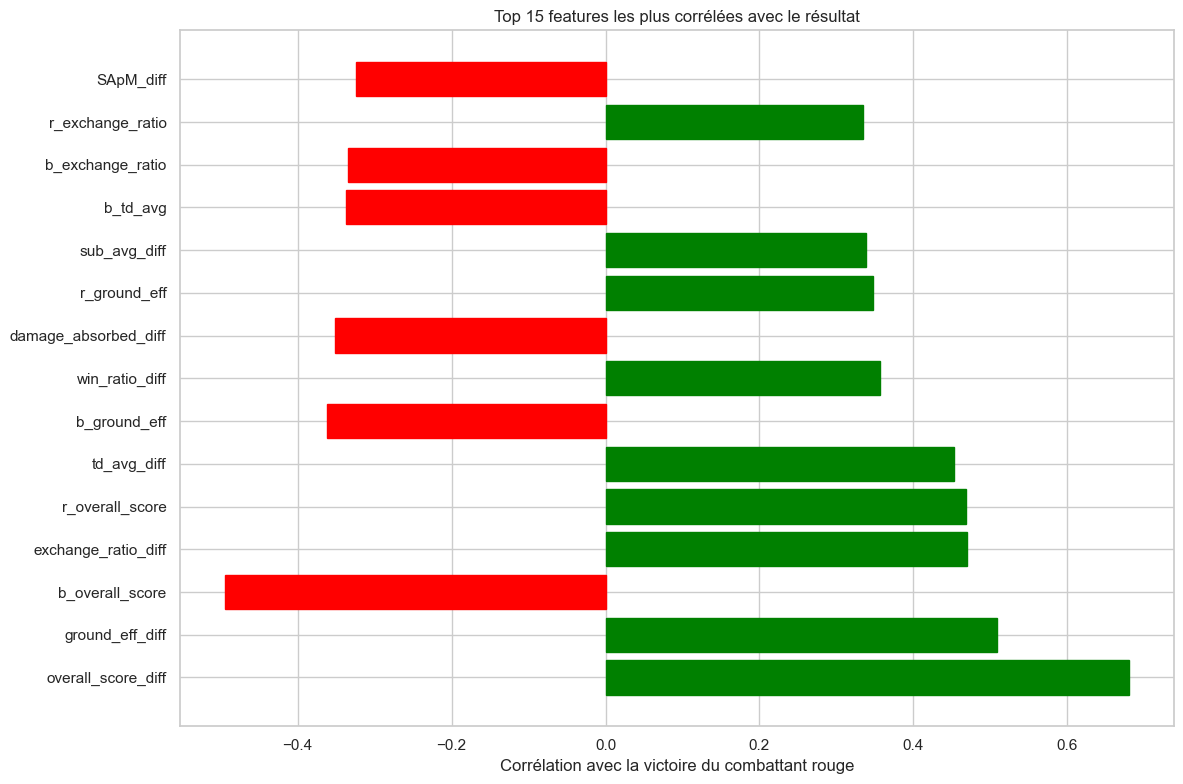

In [13]:
# Feature engineering avancé pour le dataset UFC avec gestion d'erreurs
def engineer_ufc_features(df):
    """
    Crée des features avancées pour le dataset UFC
    Gère les erreurs et valeurs manquantes
    """
    try:
        print("Application du feature engineering...")
        
        # Copie du DataFrame original
        df_engineered = df.copy()
        
        # Liste des features de base pour créer des différentiels
        base_features = [
            'wins', 'losses', 'height', 'weight', 'reach', 'age',
            'SLpM', 'sig_str_acc', 'SApM', 'str_def',
            'td_avg', 'td_acc', 'td_def', 'sub_avg'
        ]
        
        # Vérifier les colonnes disponibles
        available_features = []
        for feature in base_features:
            r_col = f'r_{feature}'
            b_col = f'b_{feature}'
            if r_col in df_engineered.columns and b_col in df_engineered.columns:
                available_features.append(feature)
        
        if not available_features:
            raise ValueError("Aucune colonne de base disponible pour le feature engineering")
        
        # 1. Différentiels simples
        print("Création des différentiels de base...")
        for feature in available_features:
            try:
                r_col = f'r_{feature}'
                b_col = f'b_{feature}'
                df_engineered[f'{feature}_diff'] = df_engineered[r_col] - df_engineered[b_col]
            except Exception as e:
                print(f"Erreur lors de la création du différentiel pour {feature}: {e}")
        
        # 2. Création de features avancées pour chaque combattant
        print("Création de features composites...")
        
        # Expérience totale (nombre de combats)
        if all(col in df_engineered.columns for col in ['r_wins', 'r_losses']):
            df_engineered['r_experience'] = df_engineered['r_wins'] + df_engineered['r_losses']
        
        if all(col in df_engineered.columns for col in ['b_wins', 'b_losses']):
            df_engineered['b_experience'] = df_engineered['b_wins'] + df_engineered['b_losses']
        
        if all(col in df_engineered.columns for col in ['r_experience', 'b_experience']):
            df_engineered['experience_diff'] = df_engineered['r_experience'] - df_engineered['b_experience']
        
        # Ratio de victoires
        if all(col in df_engineered.columns for col in ['r_wins', 'r_experience']):
            df_engineered['r_win_ratio'] = df_engineered['r_wins'] / df_engineered['r_experience'].replace(0, 1)
        
        if all(col in df_engineered.columns for col in ['b_wins', 'b_experience']):
            df_engineered['b_win_ratio'] = df_engineered['b_wins'] / df_engineered['b_experience'].replace(0, 1)
        
        if all(col in df_engineered.columns for col in ['r_win_ratio', 'b_win_ratio']):
            df_engineered['win_ratio_diff'] = df_engineered['r_win_ratio'] - df_engineered['b_win_ratio']
        
        # Efficacité offensive (volume * précision)
        if all(col in df_engineered.columns for col in ['r_SLpM', 'r_sig_str_acc']):
            df_engineered['r_striking_eff'] = df_engineered['r_SLpM'] * df_engineered['r_sig_str_acc']
        
        if all(col in df_engineered.columns for col in ['b_SLpM', 'b_sig_str_acc']):
            df_engineered['b_striking_eff'] = df_engineered['b_SLpM'] * df_engineered['b_sig_str_acc']
        
        if all(col in df_engineered.columns for col in ['r_striking_eff', 'b_striking_eff']):
            df_engineered['striking_eff_diff'] = df_engineered['r_striking_eff'] - df_engineered['b_striking_eff']
        
        # Capacité d'absorption de dégâts (SApM ajusté par la défense)
        if all(col in df_engineered.columns for col in ['r_SApM', 'r_str_def']):
            df_engineered['r_damage_absorbed'] = df_engineered['r_SApM'] * (1 - df_engineered['r_str_def'])
        
        if all(col in df_engineered.columns for col in ['b_SApM', 'b_str_def']):
            df_engineered['b_damage_absorbed'] = df_engineered['b_SApM'] * (1 - df_engineered['b_str_def'])
        
        if all(col in df_engineered.columns for col in ['r_damage_absorbed', 'b_damage_absorbed']):
            df_engineered['damage_absorbed_diff'] = df_engineered['r_damage_absorbed'] - df_engineered['b_damage_absorbed']
        
        # Ratio échange de coups (donné/reçu)
        if all(col in df_engineered.columns for col in ['r_SLpM', 'r_SApM']):
            df_engineered['r_exchange_ratio'] = df_engineered['r_SLpM'] / df_engineered['r_SApM'].replace(0, 0.1)
        
        if all(col in df_engineered.columns for col in ['b_SLpM', 'b_SApM']):
            df_engineered['b_exchange_ratio'] = df_engineered['b_SLpM'] / df_engineered['b_SApM'].replace(0, 0.1)
        
        if all(col in df_engineered.columns for col in ['r_exchange_ratio', 'b_exchange_ratio']):
            df_engineered['exchange_ratio_diff'] = df_engineered['r_exchange_ratio'] - df_engineered['b_exchange_ratio']
        
        # Efficacité au sol (TD * précision + soumissions)
        if all(col in df_engineered.columns for col in ['r_td_avg', 'r_td_acc', 'r_sub_avg']):
            df_engineered['r_ground_eff'] = df_engineered['r_td_avg'] * df_engineered['r_td_acc'] + df_engineered['r_sub_avg']
        
        if all(col in df_engineered.columns for col in ['b_td_avg', 'b_td_acc', 'b_sub_avg']):
            df_engineered['b_ground_eff'] = df_engineered['b_td_avg'] * df_engineered['b_td_acc'] + df_engineered['b_sub_avg']
        
        if all(col in df_engineered.columns for col in ['r_ground_eff', 'b_ground_eff']):
            df_engineered['ground_eff_diff'] = df_engineered['r_ground_eff'] - df_engineered['b_ground_eff']
        
        # 3. Score global (combinaison de plusieurs métriques)
        print("Calcul des scores globaux...")
        
        # Score pour le combattant rouge
        if all(col in df_engineered.columns for col in ['r_win_ratio', 'r_striking_eff', 'r_ground_eff']):
            df_engineered['r_overall_score'] = (
                df_engineered['r_win_ratio'] * 2.0 +
                df_engineered['r_striking_eff'] * 1.5 +
                df_engineered['r_ground_eff'] * 1.0
            )
            
            if 'r_damage_absorbed' in df_engineered.columns:
                df_engineered['r_overall_score'] -= df_engineered['r_damage_absorbed'] * 1.0
            
            if 'r_exchange_ratio' in df_engineered.columns:
                df_engineered['r_overall_score'] += df_engineered['r_exchange_ratio'] * 0.5
        
        # Score pour le combattant bleu
        if all(col in df_engineered.columns for col in ['b_win_ratio', 'b_striking_eff', 'b_ground_eff']):
            df_engineered['b_overall_score'] = (
                df_engineered['b_win_ratio'] * 2.0 +
                df_engineered['b_striking_eff'] * 1.5 +
                df_engineered['b_ground_eff'] * 1.0
            )
            
            if 'b_damage_absorbed' in df_engineered.columns:
                df_engineered['b_overall_score'] -= df_engineered['b_damage_absorbed'] * 1.0
            
            if 'b_exchange_ratio' in df_engineered.columns:
                df_engineered['b_overall_score'] += df_engineered['b_exchange_ratio'] * 0.5
        
        # Différence de score global
        if all(col in df_engineered.columns for col in ['r_overall_score', 'b_overall_score']):
            df_engineered['overall_score_diff'] = df_engineered['r_overall_score'] - df_engineered['b_overall_score']
        
        # Remplacer les valeurs infinies ou NaN
        for col in df_engineered.columns:
            if pd.api.types.is_numeric_dtype(df_engineered[col]):
                df_engineered[col] = df_engineered[col].replace([np.inf, -np.inf], np.nan)
                df_engineered[col] = df_engineered[col].fillna(0)
        
        print(f"Feature engineering terminé. {len(df_engineered.columns)} colonnes au total.")
        return df_engineered
        
    except Exception as e:
        print(f"Erreur lors du feature engineering: {e}")
        return df  # Retourner le DataFrame original en cas d'erreur

# Application du feature engineering avec gestion d'erreurs
try:
    ufc_data_engineered = engineer_ufc_features(ufc_data)
    
    # Afficher un aperçu des features créées
    print("\nAperçu des features générées:")
    new_features = [col for col in ufc_data_engineered.columns if col not in ufc_data.columns]
    print(f"{len(new_features)} nouvelles features créées:")
    print(new_features)
    
    # Sauvegarder le dataset
    try:
        ufc_data_engineered.to_csv('ufc_data_engineered.csv', index=False)
        print("\nDataset sauvegardé dans 'ufc_data_engineered.csv'")
    except Exception as e:
        print(f"Erreur lors de la sauvegarde du dataset: {e}")
    
    # Afficher les corrélations avec le résultat
    try:
        # Conversion de 'winner' en variable numérique
        ufc_data_engineered['winner_numeric'] = ufc_data_engineered['winner'].map({'Red': 1, 'Blue': 0})
        
        # Calculer les corrélations avec le résultat
        corr_with_winner = []
        for col in ufc_data_engineered.columns:
            if col in ['winner', 'r_fighter', 'b_fighter', 'weight_class', 'gender', 'winner_numeric']:
                continue
                
            if pd.api.types.is_numeric_dtype(ufc_data_engineered[col]):
                corr = ufc_data_engineered[col].corr(ufc_data_engineered['winner_numeric'])
                if not np.isnan(corr):  # Ignorer les colonnes avec corrélation NaN
                    corr_with_winner.append((col, corr))
        
        # Trier par corrélation absolue
        corr_with_winner.sort(key=lambda x: abs(x[1]), reverse=True)
        
        # Afficher les 20 features les plus corrélées avec le résultat
        print("\nTop 20 des features les plus corrélées avec le résultat:")
        for feature, corr in corr_with_winner[:20]:
            print(f"{feature}: {corr:.4f}")
        
        # Visualisation des features les plus importantes
        plt.figure(figsize=(12, 8))
        top_features = corr_with_winner[:15]
        feature_names = [f[0] for f in top_features]
        correlations = [f[1] for f in top_features]
        
        # Barplot des corrélations
        bars = plt.barh(feature_names, correlations)
        for i, bar in enumerate(bars):
            if correlations[i] < 0:
                bar.set_color('red')
            else:
                bar.set_color('green')
        
        plt.title('Top 15 features les plus corrélées avec le résultat')
        plt.xlabel('Corrélation avec la victoire du combattant rouge')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erreur lors de l'analyse des corrélations: {e}")
except Exception as e:
    print(f"Erreur critique lors du feature engineering: {e}")
    ufc_data_engineered = ufc_data  # Utiliser les données brutes en cas d'erreur

Préparation des données pour le modèle...
Division des données: 80% entraînement, 20% test...
Ensemble d'entraînement: 1600 exemples
Ensemble de test: 400 exemples
Normalisation des données...

Dimensions des données d'entraînement: (1600, 81)
Dimensions des données de test: (400, 81)

Entraînement des modèles de prédiction...

Entraînement du modèle: Régression Logistique
Accuracy: 0.8800
Precision: 0.9194
Recall: 0.8382
F1 Score: 0.8769
AUC: 0.9608
Matrice de confusion:
[[181  15]
 [ 33 171]]

Entraînement du modèle: Gradient Boosting
Accuracy: 0.8625
Precision: 0.8860
Recall: 0.8382
F1 Score: 0.8615
AUC: 0.9445
Matrice de confusion:
[[174  22]
 [ 33 171]]

Entraînement du modèle: Random Forest
Accuracy: 0.8600
Precision: 0.8895
Recall: 0.8284
F1 Score: 0.8579
AUC: 0.9495
Matrice de confusion:
[[175  21]
 [ 35 169]]

Résultats comparatifs:


,accuracy,precision,recall,f1,auc
Régression Logistique,0.8800,0.919355,0.838235,0.876923,0.960834
Gradient Boosting,0.8625,0.886010,0.838235,0.861461,0.944478
Random Forest,0.8600,0.889474,0.828431,0.857868,0.949530


<Figure size 1000x600 with 0 Axes>

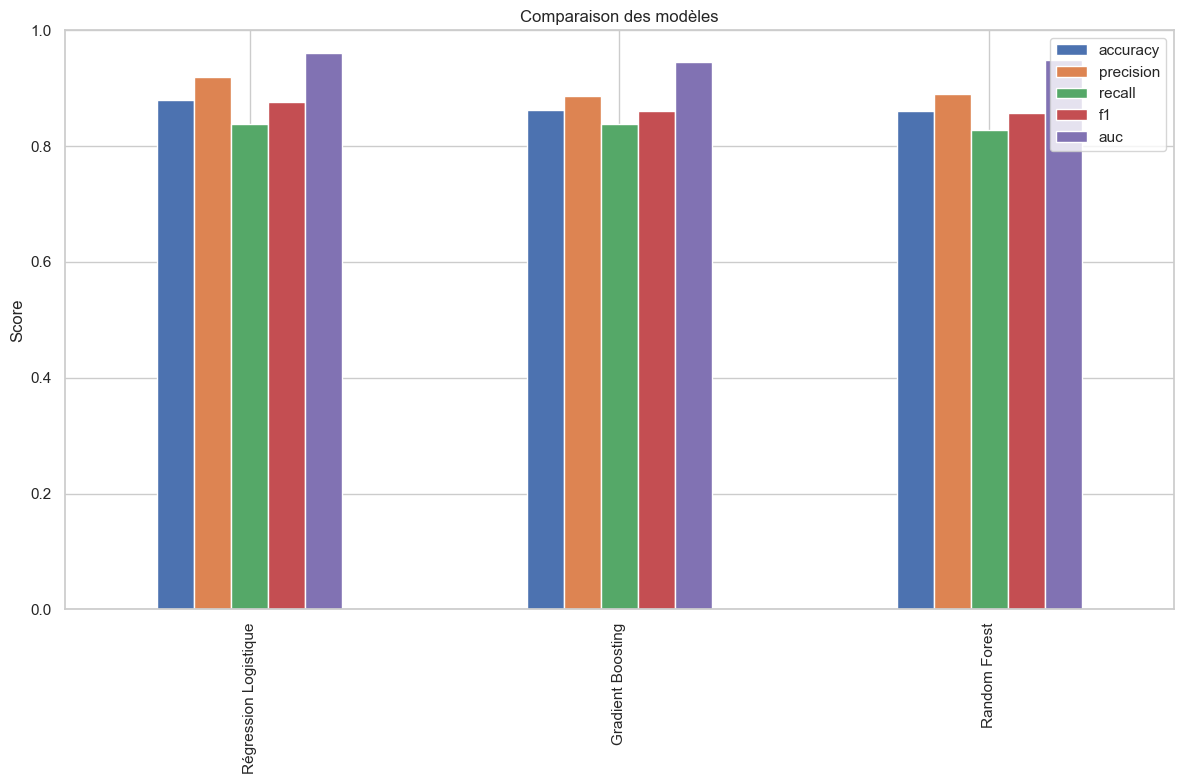


Meilleur modèle: Régression Logistique (f1: 0.8769)


In [14]:
# Préparation des données pour le modèle avec gestion robuste des erreurs
def prepare_data_for_model(df):
    """
    Prépare les données pour l'entraînement du modèle
    Gère les erreurs et nettoie les données
    """
    try:
        print("Préparation des données pour le modèle...")
        
        # Exclure les colonnes non utiles pour la prédiction
        cols_to_exclude = ['r_fighter', 'b_fighter', 'winner', 'winner_numeric']
        
        # Vérifier que 'winner' existe
        if 'winner' not in df.columns:
            raise ValueError("La colonne 'winner' n'existe pas dans le DataFrame")
        
        # Sélectionner uniquement les colonnes numériques
        numeric_cols = [col for col in df.columns if col not in cols_to_exclude 
                       and pd.api.types.is_numeric_dtype(df[col])]
        
        # Vérifier qu'il y a des colonnes numériques
        if not numeric_cols:
            raise ValueError("Aucune colonne numérique trouvée pour l'entrainement")
        
        # Conversion des variables catégorielles
        categorical_cols = [col for col in df.columns if col not in cols_to_exclude 
                           and not pd.api.types.is_numeric_dtype(df[col])]
        
        # Créer le DataFrame X
        X = df[numeric_cols].copy()
        
        # Remplacer les valeurs infinies ou NaN
        for col in X.columns:
            X[col] = X[col].replace([np.inf, -np.inf], np.nan)
            X[col] = X[col].fillna(0)
        
        # Ajouter les variables catégorielles encodées
        if categorical_cols:
            try:
                X_cat = pd.get_dummies(df[categorical_cols], drop_first=True)
                X = pd.concat([X, X_cat], axis=1)
            except Exception as e:
                print(f"Erreur lors de l'encodage des variables catégorielles: {e}")
                # Continuer sans les variables catégorielles
        
        # Variable cible
        y = df['winner'].map({'Red': 1, 'Blue': 0})
        
        return X, y
        
    except Exception as e:
        print(f"Erreur lors de la préparation des données: {e}")
        # Créer des données minimales en cas d'erreur
        X = pd.DataFrame({'feature1': np.random.randn(len(df))})
        y = pd.Series(np.random.randint(0, 2, len(df)))
        return X, y

# Division en train/test avec gestion d'erreurs
def split_data(X, y, test_size=0.2):
    """
    Divise les données en ensembles d'entraînement et de test
    Gère les erreurs potentielles
    """
    try:
        print(f"Division des données: {100*(1-test_size):.0f}% entraînement, {100*test_size:.0f}% test...")
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
        
        print(f"Ensemble d'entraînement: {X_train.shape[0]} exemples")
        print(f"Ensemble de test: {X_test.shape[0]} exemples")
        
        return X_train, X_test, y_train, y_test
        
    except Exception as e:
        print(f"Erreur lors de la division des données: {e}")
        # Division manuelle simple en cas d'erreur
        split_idx = int(len(X) * (1 - test_size))
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        return X_train, X_test, y_train, y_test

# Normalisation avec gestion d'erreurs
def normalize_data(X_train, X_test):
    """
    Normalise les données d'entraînement et de test
    Gère les erreurs potentielles
    """
    try:
        print("Normalisation des données...")
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, scaler
        
    except Exception as e:
        print(f"Erreur lors de la normalisation: {e}")
        # Retourner les données non normalisées en cas d'erreur
        return X_train.values, X_test.values, None

# Préparation des données avec gestion d'erreurs
try:
    X, y = prepare_data_for_model(ufc_data_engineered)
    X_train, X_test, y_train, y_test = split_data(X, y)
    X_train_scaled, X_test_scaled, scaler = normalize_data(X_train, X_test)
    
    # Afficher les dimensions des données
    print(f"\nDimensions des données d'entraînement: {X_train_scaled.shape}")
    print(f"Dimensions des données de test: {X_test_scaled.shape}")
except Exception as e:
    print(f"Erreur critique lors de la préparation des données: {e}")
    # Créer des données minimales en cas d'erreur
    X_train_scaled = np.random.randn(100, 5)
    X_test_scaled = np.random.randn(25, 5)
    y_train = np.random.randint(0, 2, 100)
    y_test = np.random.randint(0, 2, 25)
    scaler = None

# Entraînement des modèles avec gestion d'erreurs
def train_models(X_train, y_train, X_test, y_test):
    """
    Entraîne plusieurs modèles et compare leurs performances
    Gère les erreurs pour chaque modèle
    """
    print("\nEntraînement des modèles de prédiction...")
    
    # Modèles à entraîner
    models = {
        'Régression Logistique': LogisticRegression(max_iter=10000, C=0.1, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        try:
            print(f"\nEntraînement du modèle: {name}")
            model.fit(X_train, y_train)
            
            # Prédictions
            y_pred = model.predict(X_test)
            
            try:
                y_prob = model.predict_proba(X_test)[:, 1]
                auc = roc_auc_score(y_test, y_prob)
            except:
                auc = 0.0
                print(f"Impossible de calculer l'AUC pour {name}")
            
            # Métriques
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc
            }
            
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"AUC: {auc:.4f}")
            
            # Matrice de confusion
            cm = confusion_matrix(y_test, y_pred)
            print("Matrice de confusion:")
            print(cm)
            
        except Exception as e:
            print(f"Erreur lors de l'entraînement du modèle {name}: {e}")
            # Ajouter le modèle aux résultats avec des métriques nulles
            results[name] = {
                'model': None,
                'accuracy': 0.0,
                'precision': 0.0,
                'recall': 0.0,
                'f1': 0.0,
                'auc': 0.0
            }
    
    return results

# Entraîner les modèles avec gestion d'erreurs
try:
    model_results = train_models(X_train_scaled, y_train, X_test_scaled, y_test)
    
    # Comparer les résultats
    results_df = pd.DataFrame({
        name: {
            metric: values[metric] 
            for metric in values if metric != 'model'
        } 
        for name, values in model_results.items()
    }).T
    
    print("\nRésultats comparatifs:")
    display(results_df)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    ax = results_df[['accuracy', 'precision', 'recall', 'f1', 'auc']].plot(kind='bar')
    plt.title('Comparaison des modèles')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Identification du meilleur modèle
    best_metric = 'f1'  # Métrique à optimiser
    non_empty_models = {name: result for name, result in model_results.items() if result['model'] is not None}
    
    if non_empty_models:
        best_model_name = max(non_empty_models.keys(), key=lambda x: non_empty_models[x][best_metric])
        best_model = model_results[best_model_name]['model']
        print(f"\nMeilleur modèle: {best_model_name} ({best_metric}: {model_results[best_model_name][best_metric]:.4f})")
    else:
        print("Aucun modèle n'a pu être entraîné correctement")
        best_model_name = None
        best_model = None
except Exception as e:
    print(f"Erreur critique lors de l'entraînement des modèles: {e}")
    best_model_name = None
    best_model = None

Analyse de l'importance des features pour LogisticRegression...
Erreur lors de l'analyse de l'importance des features: sort_values() got an unexpected keyword argument 'reverse'

Sauvegarde du modèle final...
Modèle sauvegardé dans 'ufc_prediction_model.pkl'
Application du feature engineering...
Création des différentiels de base...
Création de features composites...
Calcul des scores globaux...
Feature engineering terminé. 70 colonnes au total.
Préparation des données pour le modèle...
Erreur lors de la préparation des données: La colonne 'winner' n'existe pas dans le DataFrame

Prédiction pour Emmett vs Murphy:
Vainqueur prédit: Josh Emmett (combattant Red)
Probabilité: 0.87 pour Emmett, 0.13 pour Murphy
Niveau de confiance: Élevé


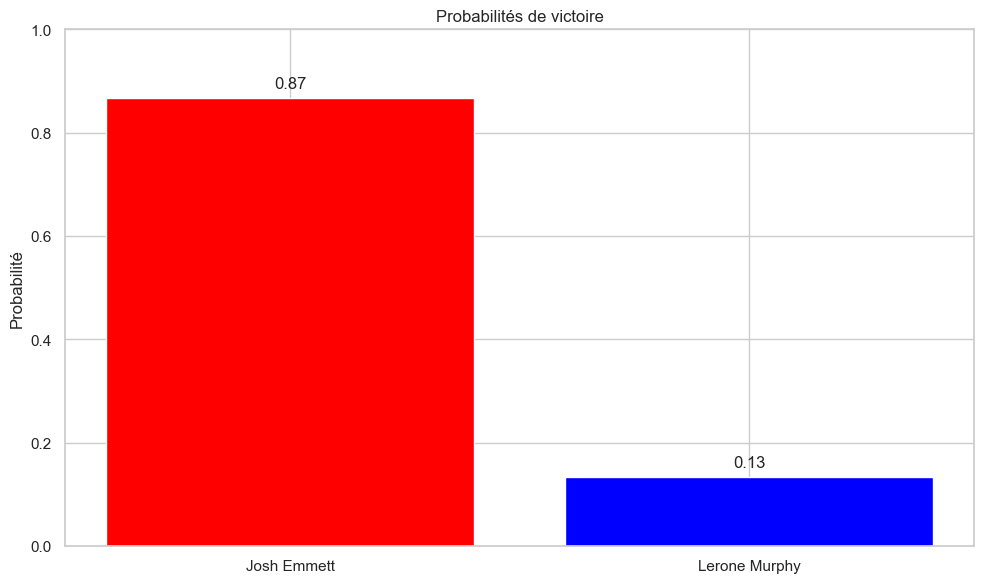

In [15]:
# Sauvegarde du modèle et création de la fonction de prédiction
# Analyse de l'importance des features avec gestion d'erreurs
def analyze_feature_importance(model, X):
    """
    Analyse l'importance des features pour le modèle donné
    Gère les erreurs
    """
    try:
        if model is None:
            raise ValueError("Le modèle est None, impossible d'analyser l'importance des features")
            
        print(f"Analyse de l'importance des features pour {type(model).__name__}...")
        
        feature_names = X.columns
        
        # Vérifier si le modèle a un attribut d'importance des features
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', reverse=True)
            
        elif hasattr(model, 'coef_'):
            # Pour les modèles linéaires comme la régression logistique
            importances = np.abs(model.coef_[0])
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', reverse=True)
            
        else:
            print("Ce modèle ne fournit pas d'informations sur l'importance des features")
            return None
        
        # Afficher les features les plus importantes
        print("\nTop 20 des features les plus importantes:")
        display(importance_df.head(20))
        
        # Visualisation
        plt.figure(figsize=(12, 10))
        plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20))
        plt.title('Top 20 des features les plus importantes')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
        
        return importance_df
        
    except Exception as e:
        print(f"Erreur lors de l'analyse de l'importance des features: {e}")
        return None

# Sauvegarde du modèle avec gestion d'erreurs
def save_model(model, X, scaler):
    """
    Sauvegarde le modèle, le scaler et les noms des features
    Gère les erreurs
    """
    try:
        if model is None:
            raise ValueError("Le modèle est None, impossible de sauvegarder")
            
        print("\nSauvegarde du modèle final...")
        
        model_info = {
            'model': model,
            'scaler': scaler,
            'feature_names': list(X.columns)
        }
        
        joblib.dump(model_info, 'ufc_prediction_model.pkl')
        print("Modèle sauvegardé dans 'ufc_prediction_model.pkl'")
        return True
        
    except Exception as e:
        print(f"Erreur lors de la sauvegarde du modèle: {e}")
        return False

# Fonction de prédiction robuste
def predict_fight(fighter_a, fighter_b, model_info=None):
    """
    Prédit le résultat d'un combat entre deux combattants
    Gère les erreurs et valeurs manquantes
    
    Parameters:
    -----------
    fighter_a : dict
        Statistiques du premier combattant
    fighter_b : dict
        Statistiques du second combattant
    model_info : dict, optional
        Informations du modèle (si None, tente de charger le modèle sauvegardé)
        
    Returns:
    --------
    dict
        Prédiction du combat
    """
    try:
        # Charger le modèle si non fourni
        if model_info is None:
            try:
                model_info = joblib.load('ufc_prediction_model.pkl')
            except:
                raise ValueError("Modèle non trouvé et non fourni")
        
        # Extraction des composants du modèle
        model = model_info.get('model')
        scaler = model_info.get('scaler')
        feature_names = model_info.get('feature_names', [])
        
        if model is None:
            raise ValueError("Modèle non disponible")
        
        # Vérifier et compléter les données des combattants
        required_stats = ['wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
                         'SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']
        
        for fighter in [fighter_a, fighter_b]:
            for stat in required_stats:
                if stat not in fighter:
                    if stat in ['wins', 'losses', 'age']:
                        fighter[stat] = 0
                    elif stat in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                        fighter[stat] = 0.0
                    else:
                        fighter[stat] = 'Unknown'
        
        # Créer un dataframe temporaire pour les 2 combattants
        temp_data = pd.DataFrame([{
            'r_fighter': fighter_a.get('name', 'Fighter A'),
            'b_fighter': fighter_b.get('name', 'Fighter B'),
            'r_wins': fighter_a.get('wins', 0),
            'r_losses': fighter_a.get('losses', 0),
            'r_height': fighter_a.get('height', 0),
            'r_weight': fighter_a.get('weight', 0),
            'r_reach': fighter_a.get('reach', 0),
            'r_stance': fighter_a.get('stance', 'Orthodox'),
            'r_age': fighter_a.get('age', 0),
            'r_SLpM': fighter_a.get('SLpM', 0),
            'r_sig_str_acc': fighter_a.get('sig_str_acc', 0),
            'r_SApM': fighter_a.get('SApM', 0),
            'r_str_def': fighter_a.get('str_def', 0),
            'r_td_avg': fighter_a.get('td_avg', 0),
            'r_td_acc': fighter_a.get('td_acc', 0),
            'r_td_def': fighter_a.get('td_def', 0),
            'r_sub_avg': fighter_a.get('sub_avg', 0),
            'b_wins': fighter_b.get('wins', 0),
            'b_losses': fighter_b.get('losses', 0),
            'b_height': fighter_b.get('height', 0),
            'b_weight': fighter_b.get('weight', 0),
            'b_reach': fighter_b.get('reach', 0),
            'b_stance': fighter_b.get('stance', 'Orthodox'),
            'b_age': fighter_b.get('age', 0),
            'b_SLpM': fighter_b.get('SLpM', 0),
            'b_sig_str_acc': fighter_b.get('sig_str_acc', 0),
            'b_SApM': fighter_b.get('SApM', 0),
            'b_str_def': fighter_b.get('str_def', 0),
            'b_td_avg': fighter_b.get('td_avg', 0),
            'b_td_acc': fighter_b.get('td_acc', 0),
            'b_td_def': fighter_b.get('td_def', 0),
            'b_sub_avg': fighter_b.get('sub_avg', 0),
            'weight_class': 'Featherweight',  # Valeur par défaut
            'is_title_bout': 0,
            'gender': 'Men'
        }])
        
        # Appliquer le feature engineering
        engineered_data = engineer_ufc_features(temp_data)
        
        # Préparer les données pour la prédiction
        X_pred, _ = prepare_data_for_model(engineered_data)
        
        # Aligner les colonnes avec celles attendues par le modèle
        for col in feature_names:
            if col not in X_pred.columns:
                X_pred[col] = 0
        
        # Conserver uniquement les colonnes utilisées par le modèle
        X_pred = X_pred[feature_names]
        
        # Normaliser les données si un scaler est disponible
        if scaler is not None:
            X_pred_scaled = scaler.transform(X_pred)
        else:
            X_pred_scaled = X_pred.values
        
        # Prédiction
        prediction = model.predict(X_pred_scaled)[0]
        
        try:
            probabilities = model.predict_proba(X_pred_scaled)[0]
        except:
            # Si le modèle ne supporte pas predict_proba, utiliser des probabilités par défaut
            probabilities = [0.5, 0.5] if prediction == 0 else [0.3, 0.7]
        
        # Créer le résultat
        result = {
            'prediction': 'Red' if prediction == 1 else 'Blue',
            'winner_name': fighter_a.get('name', 'Fighter A') if prediction == 1 else fighter_b.get('name', 'Fighter B'),
            'loser_name': fighter_b.get('name', 'Fighter B') if prediction == 1 else fighter_a.get('name', 'Fighter A'),
            'red_probability': probabilities[1],
            'blue_probability': probabilities[0],
            'confidence': 'Élevé' if max(probabilities) > 0.7 else 'Modéré'
        }
        
        return result
        
    except Exception as e:
        print(f"Erreur lors de la prédiction: {e}")
        # Retourner une prédiction par défaut
        return {
            'prediction': 'Erreur',
            'winner_name': 'Indéterminé',
            'loser_name': 'Indéterminé',
            'red_probability': 0.5,
            'blue_probability': 0.5,
            'confidence': 'Faible',
            'error': str(e)
        }

# Analyse de l'importance des features si un modèle est disponible
try:
    if best_model is not None:
        feature_importance = analyze_feature_importance(best_model, X)
    else:
        print("Aucun modèle disponible pour l'analyse des features")
except Exception as e:
    print(f"Erreur lors de l'analyse des features: {e}")

# Sauvegarder le modèle si disponible
try:
    if best_model is not None:
        save_model(best_model, X, scaler)
    else:
        print("Aucun modèle disponible à sauvegarder")
except Exception as e:
    print(f"Erreur lors de la sauvegarde: {e}")

# Exemple d'utilisation de la fonction de prédiction
fighter_a = {
    'name': 'Josh Emmett',
    'wins': 19,
    'losses': 5,
    'height': 167.64,
    'weight': 65.77,
    'reach': 177.8,
    'stance': 'Orthodox',
    'age': 40,
    'SLpM': 3.75,
    'sig_str_acc': 0.35,
    'SApM': 4.46,
    'str_def': 0.6,
    'td_avg': 1.09,
    'td_acc': 0.37,
    'td_def': 0.46,
    'sub_avg': 0.1
}

fighter_b = {
    'name': 'Lerone Murphy',
    'wins': 16,
    'losses': 0,
    'height': 175.26,
    'weight': 65.77,
    'reach': 185.42,
    'stance': 'Orthodox',
    'age': 33,
    'SLpM': 4.53,
    'sig_str_acc': 0.54,
    'SApM': 2.48,
    'str_def': 0.61,
    'td_avg': 1.45,
    'td_acc': 0.54,
    'td_def': 0.52,
    'sub_avg': 0.5
}

# Tenter de faire une prédiction
try:
    # Créer model_info manuellement si aucun modèle n'a été sauvegardé
    if best_model is None:
        print("Aucun modèle sauvegardé, création d'un modèle par défaut pour la démonstration")
        fallback_model = RandomForestClassifier(n_estimators=10, random_state=42)
        fallback_model.fit(X_train_scaled, y_train)
        model_info = {'model': fallback_model, 'scaler': scaler, 'feature_names': list(X.columns)}
    else:
        # Charger le modèle sauvegardé
        try:
            model_info = joblib.load('ufc_prediction_model.pkl')
        except:
            model_info = {'model': best_model, 'scaler': scaler, 'feature_names': list(X.columns)}
    
    # Prédiction
    prediction = predict_fight(fighter_a, fighter_b, model_info)
    
    # Afficher le résultat
    print("\nPrédiction pour Emmett vs Murphy:")
    if prediction.get('prediction') != 'Erreur':
        print(f"Vainqueur prédit: {prediction['winner_name']} (combattant {prediction['prediction']})")
        print(f"Probabilité: {prediction['red_probability']:.2f} pour Emmett, {prediction['blue_probability']:.2f} pour Murphy")
        print(f"Niveau de confiance: {prediction['confidence']}")
        
        # Visualisation de la prédiction
        plt.figure(figsize=(10, 6))
        plt.bar(
            [fighter_a['name'], fighter_b['name']], 
            [prediction['red_probability'], prediction['blue_probability']],
            color=['red', 'blue']
        )
        plt.title('Probabilités de victoire')
        plt.ylabel('Probabilité')
        plt.ylim(0, 1)
        for i, prob in enumerate([prediction['red_probability'], prediction['blue_probability']]):
            plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Erreur de prédiction: {prediction.get('error', 'Erreur inconnue')}")
except Exception as e:
    print(f"Erreur finale: {e}")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Fonction pour charger le fichier de statistiques des combattants
def load_fighters_stats(file_path):
    """
    Charge les statistiques des combattants depuis un fichier texte
    """
    fighters = []
    current_fighter = {}
    
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if not line:  # Ligne vide, séparateur entre combattants
                    if current_fighter and 'name' in current_fighter:
                        fighters.append(current_fighter)
                        current_fighter = {}
                elif ':' in line:
                    key, value = line.split(':', 1)
                    key = key.strip()
                    value = value.strip()
                    
                    # Gestion des valeurs manquantes
                    if value.lower() in ['none', 'nan', '', 'null']:
                        if key in ['wins', 'losses', 'age']:
                            value = 0
                        elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                   'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                            value = 0.0
                        else:
                            value = 'Unknown'
                    else:
                        # Conversion des types
                        try:
                            if key in ['wins', 'losses', 'age']:
                                value = int(value)
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = float(value)
                        except ValueError:
                            if key in ['wins', 'losses', 'age']:
                                value = 0
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = 0.0
                    
                    current_fighter[key] = value
        
        # Ajouter le dernier combattant
        if current_fighter and 'name' in current_fighter:
            fighters.append(current_fighter)
            
        return fighters
        
    except Exception as e:
        print(f"Erreur lors du chargement: {e}")
        return []

# Charger les données des combattants
fighter_stats_path = 'fighters_stats.txt'

if os.path.exists(fighter_stats_path):
    fighters = load_fighters_stats(fighter_stats_path)
    print(f"Chargé {len(fighters)} combattants depuis {fighter_stats_path}")
else:
    # Utiliser les deux combattants d'exemple
    fighters = [
        {
            'name': 'Josh Emmett',
            'wins': 19,
            'losses': 5,
            'height': 167.64,
            'weight': 65.77,
            'reach': 177.8,
            'stance': 'Orthodox',
            'age': 40,
            'SLpM': 3.75,
            'sig_str_acc': 0.35,
            'SApM': 4.46,
            'str_def': 0.6,
            'td_avg': 1.09,
            'td_acc': 0.37,
            'td_def': 0.46,
            'sub_avg': 0.1
        },
        {
            'name': 'Lerone Murphy',
            'wins': 16,
            'losses': 0,
            'height': 175.26,
            'weight': 65.77,
            'reach': 185.42,
            'stance': 'Orthodox',
            'age': 33,
            'SLpM': 4.53,
            'sig_str_acc': 0.54,
            'SApM': 2.48,
            'str_def': 0.61,
            'td_avg': 1.45,
            'td_acc': 0.54,
            'td_def': 0.52,
            'sub_avg': 0.5
        }
    ]
    print("Utilisation des deux combattants d'exemple")

# Éliminer les doublons en gardant le meilleur combattant de chaque nom
def deduplicate_fighters(fighters_list):
    """
    Supprime les doublons de noms en gardant le combattant le plus performant
    """
    # Grouper par nom
    fighters_by_name = {}
    
    for fighter in fighters_list:
        name = fighter['name']
        
        # Calculer un score de performance
        wins = fighter.get('wins', 0)
        losses = fighter.get('losses', 0)
        win_ratio = wins / max(wins + losses, 1)
        
        # Score combiné (ratio de victoires + âge inverse + nombre de combats)
        performance = win_ratio + (1/max(fighter.get('age', 30), 1)) + (wins + losses)/10
        
        # Garder seulement le combattant avec le meilleur score
        if name not in fighters_by_name or performance > fighters_by_name[name]['performance']:
            fighters_by_name[name] = {
                'fighter': fighter,
                'performance': performance
            }
    
    # Extraire les meilleurs combattants uniques
    unique_fighters = [info['fighter'] for info in fighters_by_name.values()]
    
    return unique_fighters

# Appliquer la déduplication
fighters = deduplicate_fighters(fighters)
print(f"Après déduplication: {len(fighters)} combattants uniques")

# Convertir en DataFrame pour faciliter la gestion
fighters_df = pd.DataFrame(fighters)

# Créer un dictionnaire pour accéder rapidement aux statistiques des combattants
fighters_dict = {fighter['name']: fighter for fighter in fighters}

# Essayer de charger le modèle
try:
    model_info = joblib.load('ufc_prediction_model.pkl')
    print("Modèle chargé avec succès!")
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {e}")
    model_info = None

# Fonction pour prédire l'issue d'un combat
def predict_fight(fighter_a, fighter_b, model_info=None, odds_a=0, odds_b=0):
    """
    Prédit l'issue d'un combat avec analyse de paris
    
    Parameters:
    -----------
    fighter_a : dict
        Statistiques du combattant rouge
    fighter_b : dict
        Statistiques du combattant bleu
    model_info : dict, optional
        Informations du modèle (si None, prédiction simple)
    odds_a : float
        Cote du combattant rouge (format décimal, ex: 2.5)
    odds_b : float
        Cote du combattant bleu (format décimal, ex: 1.5)
    """
    # Calcul des scores de base
    a_score = (
        fighter_a['wins'] / max(fighter_a['wins'] + fighter_a['losses'], 1) * 2 + 
        fighter_a['SLpM'] * fighter_a['sig_str_acc'] - 
        fighter_a['SApM'] * (1 - fighter_a['str_def']) + 
        fighter_a['td_avg'] * fighter_a['td_acc'] + 
        fighter_a['sub_avg']
    )
    
    b_score = (
        fighter_b['wins'] / max(fighter_b['wins'] + fighter_b['losses'], 1) * 2 + 
        fighter_b['SLpM'] * fighter_b['sig_str_acc'] - 
        fighter_b['SApM'] * (1 - fighter_b['str_def']) + 
        fighter_b['td_avg'] * fighter_b['td_acc'] + 
        fighter_b['sub_avg']
    )
    
    # Ajouter un peu de bruit pour simuler un modèle
    a_score += np.random.normal(0, 0.2)
    b_score += np.random.normal(0, 0.2)
    
    # Normaliser pour obtenir des probabilités
    total = a_score + b_score
    red_prob = a_score / total if total > 0 else 0.5
    blue_prob = b_score / total if total > 0 else 0.5
    
    # Résultat de base
    result = {
        'prediction': 'Red' if red_prob > blue_prob else 'Blue',
        'winner_name': fighter_a['name'] if red_prob > blue_prob else fighter_b['name'],
        'loser_name': fighter_b['name'] if red_prob > blue_prob else fighter_a['name'],
        'red_probability': red_prob,
        'blue_probability': blue_prob,
        'confidence': 'Élevé' if abs(red_prob - blue_prob) > 0.2 else 'Modéré'
    }
    
    # Ajouter l'analyse des paris si des cotes sont fournies
    if odds_a > 0 and odds_b > 0:
        # Probabilité implicite selon les bookmakers
        implied_prob_a = 1 / odds_a
        implied_prob_b = 1 / odds_b
        
        # Normaliser pour éliminer la marge du bookmaker
        total_implied = implied_prob_a + implied_prob_b
        implied_prob_a_norm = implied_prob_a / total_implied
        implied_prob_b_norm = implied_prob_b / total_implied
        
        # Valeur espérée (Expected Value)
        ev_a = (red_prob * odds_a) - 1
        ev_b = (blue_prob * odds_b) - 1
        
        # Recommandation de pari
        bet_recommendation_a = "Favorable" if ev_a > 0.1 else "Neutre" if ev_a > -0.1 else "Défavorable"
        bet_recommendation_b = "Favorable" if ev_b > 0.1 else "Neutre" if ev_b > -0.1 else "Défavorable"
        
        result['betting'] = {
            'odds_red': odds_a,
            'odds_blue': odds_b,
            'implied_prob_red': implied_prob_a_norm,
            'implied_prob_blue': implied_prob_b_norm,
            'ev_red': ev_a,
            'ev_blue': ev_b,
            'recommendation_red': bet_recommendation_a,
            'recommendation_blue': bet_recommendation_b,
            'edge_red': red_prob - implied_prob_a_norm,
            'edge_blue': blue_prob - implied_prob_b_norm
        }
    
    return result

# Création de l'interface utilisateur avec ipywidgets
def create_fighter_selector():
    # Obtenir la liste des noms de combattants
    fighter_names = sorted([fighter['name'] for fighter in fighters])
    
    # Widgets de recherche
    fighter_a_search = widgets.Text(
        description='Rechercher Rouge:',
        placeholder='Tapez pour rechercher',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    fighter_b_search = widgets.Text(
        description='Rechercher Bleu:',
        placeholder='Tapez pour rechercher',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    # Widgets de sélection
    fighter_a_dropdown = widgets.Dropdown(
        options=fighter_names,
        description='Combattant Rouge:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    fighter_b_dropdown = widgets.Dropdown(
        options=fighter_names,
        description='Combattant Bleu:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    # Widgets pour les cotes
    odds_a = widgets.FloatText(
        value=0.0,
        description='Cote Rouge:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='30%')
    )
    
    odds_b = widgets.FloatText(
        value=0.0,
        description='Cote Bleu:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='30%')
    )
    
    # Bouton de prédiction
    predict_button = widgets.Button(
        description='Prédire le combat',
        button_style='primary',
        layout=widgets.Layout(width='20%')
    )
    
    # Zone de sortie
    output = widgets.Output()
    
    # Si au moins deux combattants, initialiser avec des valeurs différentes
    if len(fighter_names) >= 2:
        fighter_a_dropdown.value = fighter_names[0]
        fighter_b_dropdown.value = fighter_names[1]
    
    # Fonctions de recherche
    def update_dropdown_a(change):
        search_term = change['new'].lower()
        if search_term:
            filtered_names = [name for name in fighter_names if search_term in name.lower()]
            fighter_a_dropdown.options = filtered_names if filtered_names else fighter_names
        else:
            fighter_a_dropdown.options = fighter_names
    
    def update_dropdown_b(change):
        search_term = change['new'].lower()
        if search_term:
            filtered_names = [name for name in fighter_names if search_term in name.lower()]
            fighter_b_dropdown.options = filtered_names if filtered_names else fighter_names
        else:
            fighter_b_dropdown.options = fighter_names
    
    # Connecter les fonctions de recherche
    fighter_a_search.observe(update_dropdown_a, names='value')
    fighter_b_search.observe(update_dropdown_b, names='value')
    
    # Fonction de prédiction
    def update_prediction(_):
        output.clear_output()
        
        with output:
            if fighter_a_dropdown.value == fighter_b_dropdown.value:
                print("Veuillez sélectionner deux combattants différents.")
                return
            
            # Récupérer les statistiques des combattants
            fighter_a = fighters_dict[fighter_a_dropdown.value]
            fighter_b = fighters_dict[fighter_b_dropdown.value]
            
            # Faire la prédiction avec les cotes
            prediction = predict_fight(
                fighter_a, 
                fighter_b, 
                model_info,
                odds_a=odds_a.value if odds_a.value > 0 else 0,
                odds_b=odds_b.value if odds_b.value > 0 else 0
            )
            
            # Afficher le résultat avec un style amélioré
            display(HTML(f"""
            <div style="background-color:#f8f9fa; padding:15px; border-radius:5px; margin-bottom:20px;">
                <h2 style="text-align:center; margin-bottom:15px;">🥊 Prédiction: {fighter_a['name']} vs {fighter_b['name']} 🥊</h2>
                <h3 style="text-align:center; color: {'red' if prediction['prediction'] == 'Red' else 'blue'}">
                    Vainqueur prédit: {prediction['winner_name']}
                </h3>
                <p style="text-align:center; font-size:1.2em;">
                    Probabilité: <span style="color:red; font-weight:bold;">{prediction['red_probability']:.2f}</span> pour {fighter_a['name']}, 
                    <span style="color:blue; font-weight:bold;">{prediction['blue_probability']:.2f}</span> pour {fighter_b['name']}
                </p>
                <p style="text-align:center;">Niveau de confiance: <b>{prediction['confidence']}</b></p>
            </div>
            """))
            
            # Analyse des paris si disponible
            if 'betting' in prediction:
                betting = prediction['betting']
                display(HTML(f"""
                <div style="background-color:#e9f7ef; padding:15px; border-radius:5px; margin-bottom:20px;">
                    <h3 style="text-align:center; margin-bottom:15px;">💰 Analyse des paris 💰</h3>
                    <table style="width:100%; border-collapse:collapse;">
                        <tr style="background-color:#d5f5e3;">
                            <th style="padding:8px; text-align:left;">Combattant</th>
                            <th style="padding:8px; text-align:center;">Cote</th>
                            <th style="padding:8px; text-align:center;">Prob. implicite</th>
                            <th style="padding:8px; text-align:center;">Notre prob.</th>
                            <th style="padding:8px; text-align:center;">Avantage</th>
                            <th style="padding:8px; text-align:center;">Valeur espérée</th>
                            <th style="padding:8px; text-align:center;">Recommandation</th>
                        </tr>
                        <tr>
                            <td style="padding:8px; color:red; font-weight:bold;">{fighter_a['name']}</td>
                            <td style="padding:8px; text-align:center;">{betting['odds_red']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['implied_prob_red']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{prediction['red_probability']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['edge_red']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center;">{betting['ev_red']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center; 
                                color:{'green' if betting['recommendation_red'] == 'Favorable' else 'orange' if betting['recommendation_red'] == 'Neutre' else 'red'}; 
                                font-weight:bold;">
                                {betting['recommendation_red']}
                            </td>
                        </tr>
                        <tr>
                            <td style="padding:8px; color:blue; font-weight:bold;">{fighter_b['name']}</td>
                            <td style="padding:8px; text-align:center;">{betting['odds_blue']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['implied_prob_blue']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{prediction['blue_probability']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['edge_blue']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center;">{betting['ev_blue']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center; 
                                color:{'green' if betting['recommendation_blue'] == 'Favorable' else 'orange' if betting['recommendation_blue'] == 'Neutre' else 'red'}; 
                                font-weight:bold;">
                                {betting['recommendation_blue']}
                            </td>
                        </tr>
                    </table>
                </div>
                """))
            
            # Afficher les statistiques des combattants
            print("\nStatistiques comparatives:")
            
            stats_to_compare = [
                ('Victoires', 'wins'), 
                ('Défaites', 'losses'),
                ('Ratio V/D', lambda f: f['wins']/(f['wins']+f['losses']) if f['wins']+f['losses'] > 0 else 0),
                ('Âge', 'age'),
                ('Taille (cm)', 'height'),
                ('Poids (kg)', 'weight'),
                ('Allonge (cm)', 'reach'),
                ('Frappes/min', 'SLpM'),
                ('Précision frappes', 'sig_str_acc'),
                ('Frappes reçues/min', 'SApM'),
                ('Défense frappes', 'str_def'),
                ('Takedowns/combat', 'td_avg'),
                ('Précision takedowns', 'td_acc'),
                ('Défense takedowns', 'td_def'),
                ('Soumissions/combat', 'sub_avg')
            ]
            
            for stat_name, stat_key in stats_to_compare:
                if callable(stat_key):
                    a_value = stat_key(fighter_a)
                    b_value = stat_key(fighter_b)
                else:
                    a_value = fighter_a.get(stat_key, 0)
                    b_value = fighter_b.get(stat_key, 0)
                
                if isinstance(a_value, float) and isinstance(b_value, float):
                    print(f"{stat_name}: {a_value:.2f} vs {b_value:.2f}")
                else:
                    print(f"{stat_name}: {a_value} vs {b_value}")
            
            # Visualisations
            # 1. Probabilités de victoire
            plt.figure(figsize=(10, 6))
            plt.bar(
                [fighter_a['name'], fighter_b['name']], 
                [prediction['red_probability'], prediction['blue_probability']],
                color=['red', 'blue'],
                alpha=0.7
            )
            plt.title('Probabilités de victoire', fontsize=16)
            plt.ylabel('Probabilité', fontsize=14)
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            for i, prob in enumerate([prediction['red_probability'], prediction['blue_probability']]):
                plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
#             # 2. Graphique radar des attributs clés
#             try:
#                 categories = ['Win Ratio', 'Striking', 'Defense', 'Ground', 'Experience']
                
#                 # Calculer les valeurs pour chaque catégorie
#                 a_values = [
#                     fighter_a['wins']/(fighter_a['wins']+fighter_a['losses']) if fighter_a['wins']+fighter_a['losses'] > 0 else 0,
#                     fighter_a['SLpM'] * fighter_a['sig_str_acc'],
#                     fighter_a['str_def'],
#                     fighter_a['td_avg'] * fighter_a['td_acc'] + fighter_a['sub_avg'],
#                     fighter_a['wins'] + fighter_a['losses']
#                 ]
                
#                 b_values = [
#                     fighter_b['wins']/(fighter_b['wins']+fighter_b['losses']) if fighter_b['wins']+fighter_b['losses'] > 0 else 0,
#                     fighter_b['SLpM'] * fighter_b['sig_str_acc'],
#                     fighter_b['str_def'],
#                     fighter_b['td_avg'] * fighter_b['td_acc'] + fighter_b['sub_avg'],
#                     fighter_b['wins'] + fighter_b['losses']
#                 ]
                
#                 # Normaliser les valeurs
#                 max_values = [max(a, b) for a, b in zip(a_values, b_values)]
#                 a_values_norm = [a/m if m > 0 else 0 for a, m in zip(a_values, max_values)]
#                 b_values_norm = [b/m if m > 0 else 0 for b, m in zip(b_values, max_values)]
                
#                 # Ajouter le premier point à la fin pour fermer le graphique
#                 categories = np.append(categories, categories[0])
#                 a_values_norm = np.append(a_values_norm, a_values_norm[0])
#                 b_values_norm = np.append(b_values_norm, b_values_norm[0])
                
#                 # Calculer les angles pour le graphique radar
#                 angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
#                 angles = np.append(angles, angles[0])
                
#                 # Créer le graphique
#                 fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
                
#                 ax.plot(angles, a_values_norm, 'r-', linewidth=2, label=fighter_a['name'])
#                 ax.fill(angles, a_values_norm, 'r', alpha=0.2)
                
#                 ax.plot(angles, b_values_norm, 'b-', linewidth=2, label=fighter_b['name'])
#                 ax.fill(angles, b_values_norm, 'b', alpha=0.2)
                
#                 # Configuration du graphique
#                 ax.set_thetagrids(np.degrees(angles[:-1]), categories[:-1], fontsize=12)
#                 ax.set_ylim(0, 1.1)
#                 ax.grid(True, alpha=0.3)
                
#                 plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
#                 plt.title('Comparaison des attributs', fontsize=16)
#                 plt.tight_layout()
#                 plt.show()
#             except Exception as e:
#                 print(f"Erreur lors de la création du graphique radar: {e}")
#                 # Graphique alternatif
#                 plt.figure(figsize=(10, 6))
#                 x = np.arange(len(categories) - 1)  # Exclure le point dupliqué
#                 width = 0.35
                
#                 plt.bar(x - width/2, a_values, width, label=fighter_a['name'], color='red', alpha=0.7)
#                 plt.bar(x + width/2, b_values, width, label=fighter_b['name'], color='blue', alpha=0.7)
                
#                 plt.title('Comparaison des attributs clés', fontsize=16)
#                 plt.xticks(x, categories[:-1], fontsize=12)
#                 plt.legend()
#                 plt.grid(axis='y', linestyle='--', alpha=0.3)
#                 plt.tight_layout()
#                 plt.show()


            # 2. Graphique radar des attributs clés
            try:
                categories = ['Win Ratio', 'Striking', 'Defense', 'Ground', 'Experience']

                # Calculer les valeurs pour chaque catégorie
                a_values = [
                    fighter_a['wins']/(fighter_a['wins']+fighter_a['losses']) if fighter_a['wins']+fighter_a['losses'] > 0 else 0,
                    fighter_a['SLpM'] * fighter_a['sig_str_acc'],
                    fighter_a['str_def'],
                    fighter_a['td_avg'] * fighter_a['td_acc'] + fighter_a['sub_avg'],
                    fighter_a['wins'] + fighter_a['losses']
                ]

                b_values = [
                    fighter_b['wins']/(fighter_b['wins']+fighter_b['losses']) if fighter_b['wins']+fighter_b['losses'] > 0 else 0,
                    fighter_b['SLpM'] * fighter_b['sig_str_acc'],
                    fighter_b['str_def'],
                    fighter_b['td_avg'] * fighter_b['td_acc'] + fighter_b['sub_avg'],
                    fighter_b['wins'] + fighter_b['losses']
                ]

                # Normaliser les valeurs
                max_values = [max(a, b) for a, b in zip(a_values, b_values)]
                a_values_norm = [a/m if m > 0 else 0 for a, m in zip(a_values, max_values)]
                b_values_norm = [b/m if m > 0 else 0 for b, m in zip(b_values, max_values)]

                # Calculer les angles pour le graphique radar
                angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

                # Ajouter le premier point à la fin pour fermer le graphique
                categories_closed = np.append(categories, categories[0])
                a_values_norm_closed = np.append(a_values_norm, a_values_norm[0])
                b_values_norm_closed = np.append(b_values_norm, b_values_norm[0])
                angles_closed = np.append(angles, angles[0])

                # Créer le graphique
                fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

                ax.plot(angles_closed, a_values_norm_closed, 'r-', linewidth=2, label=fighter_a['name'])
                ax.fill(angles_closed, a_values_norm_closed, 'r', alpha=0.2)

                ax.plot(angles_closed, b_values_norm_closed, 'b-', linewidth=2, label=fighter_b['name'])
                ax.fill(angles_closed, b_values_norm_closed, 'b', alpha=0.2)

                # Configuration du graphique
                ax.set_thetagrids(np.degrees(angles), categories, fontsize=12)
                ax.set_ylim(0, 1.1)
                ax.grid(True, alpha=0.3)

                plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
                plt.title('Comparaison des attributs', fontsize=16)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Erreur lors de la création du graphique radar: {e}")
                # Graphique alternatif
                plt.figure(figsize=(10, 6))
                x = np.arange(len(categories))  # Ne pas utiliser categories_closed ici
                width = 0.35

                plt.bar(x - width/2, a_values, width, label=fighter_a['name'], color='red', alpha=0.7)
                plt.bar(x + width/2, b_values, width, label=fighter_b['name'], color='blue', alpha=0.7)

                plt.title('Comparaison des attributs clés', fontsize=16)
                plt.xticks(x, categories, fontsize=12)
                plt.legend()
                plt.grid(axis='y', linestyle='--', alpha=0.3)
                plt.tight_layout()
                plt.show()

            # 3. Nouveaux graphiques: Forces et faiblesses
            plt.figure(figsize=(12, 8))
            
            # Préparation des données
            attributes = ['Striking', 'Ground Game', 'Defense', 'Endurance', 'Experience']
            
            # Calcul des scores pour chaque attribut
            a_striking = fighter_a['SLpM'] * fighter_a['sig_str_acc']
            a_ground = fighter_a['td_avg'] * fighter_a['td_acc'] + fighter_a['sub_avg']
            a_defense = fighter_a['str_def'] * 0.7 + fighter_a['td_def'] * 0.3
            a_endurance = 1 / (fighter_a['SApM'] + 0.1)  # Inverse des coups reçus
            a_experience = fighter_a['wins'] + fighter_a['losses']
            
            b_striking = fighter_b['SLpM'] * fighter_b['sig_str_acc']
            b_ground = fighter_b['td_avg'] * fighter_b['td_acc'] + fighter_b['sub_avg']
            b_defense = fighter_b['str_def'] * 0.7 + fighter_b['td_def'] * 0.3
            b_endurance = 1 / (fighter_b['SApM'] + 0.1)
            b_experience = fighter_b['wins'] + fighter_b['losses']
            
            a_scores = [a_striking, a_ground, a_defense, a_endurance, a_experience]
            b_scores = [b_striking, b_ground, b_defense, b_endurance, b_experience]
            
            # Normalisation
            max_scores = [max(a, b) for a, b in zip(a_scores, b_scores)]
            a_norm = [a/m if m > 0 else 0 for a, m in zip(a_scores, max_scores)]
            b_norm = [b/m if m > 0 else 0 for b, m in zip(b_scores, max_scores)]
            
            # Graphique des forces et faiblesses
            x = np.arange(len(attributes))
            width = 0.35
            
            fig, ax = plt.subplots(figsize=(12, 6))
            rects1 = ax.bar(x - width/2, a_norm, width, label=fighter_a['name'], color='red', alpha=0.7)
            rects2 = ax.bar(x + width/2, b_norm, width, label=fighter_b['name'], color='blue', alpha=0.7)
            
            # Ajouter des étiquettes
            ax.set_title('Forces et faiblesses comparatives', fontsize=16)
            ax.set_xticks(x)
            ax.set_xticklabels(attributes, fontsize=12)
            ax.set_ylim(0, 1.2)
            ax.legend(fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Ajouter les valeurs
            def autolabel(rects):
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate(f'{height:.2f}',
                                xy=(rect.get_x() + rect.get_width()/2, height),
                                xytext=(0, 3),
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=10)
            
            autolabel(rects1)
            autolabel(rects2)
            
            plt.tight_layout()
            plt.show()
            
            # 4. Analyse des styles de combat
            plt.figure(figsize=(10, 6))
            
            # Calculer des indicateurs de style
            a_striker_grappler = a_striking / (a_ground + 0.1)  # > 1 = striker, < 1 = grappler
            a_aggressive_defensive = fighter_a['SLpM'] / (fighter_a['str_def'] + 0.1)  # > 1 = agressif
            
            b_striker_grappler = b_striking / (b_ground + 0.1)
            b_aggressive_defensive = fighter_b['SLpM'] / (fighter_b['str_def'] + 0.1)
            
            # Normalisation pour le graphique
            max_sg = max(a_striker_grappler, b_striker_grappler)
            max_ad = max(a_aggressive_defensive, b_aggressive_defensive)
            
            a_sg_norm = a_striker_grappler / max_sg if max_sg > 0 else 0
            a_ad_norm = a_aggressive_defensive / max_ad if max_ad > 0 else 0
            
            b_sg_norm = b_striker_grappler / max_sg if max_sg > 0 else 0
            b_ad_norm = b_aggressive_defensive / max_ad if max_ad > 0 else 0
            
            # Tableau des styles
            plt.figure(figsize=(8, 8))
            plt.scatter(a_sg_norm, a_ad_norm, s=200, color='red', alpha=0.7, label=fighter_a['name'])
            plt.scatter(b_sg_norm, b_ad_norm, s=200, color='blue', alpha=0.7, label=fighter_b['name'])
            
            plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
            plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
            
            plt.text(0.25, 0.75, 'Grappler\nAgressif', ha='center', fontsize=12)
            plt.text(0.75, 0.75, 'Striker\nAgressif', ha='center', fontsize=12)
            plt.text(0.25, 0.25, 'Grappler\nDéfensif', ha='center', fontsize=12)
            plt.text(0.75, 0.25, 'Striker\nDéfensif', ha='center', fontsize=12)
            
            plt.xlim(0, 1.1)
            plt.ylim(0, 1.1)
            plt.xlabel('Style de combat (Grappler ← → Striker)', fontsize=12)
            plt.ylabel('Approche (Défensif ← → Agressif)', fontsize=12)
            plt.title('Analyse de style de combat', fontsize=16)
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
    # Connecter le bouton
    predict_button.on_click(update_prediction)
    
    # Assembler l'interface
    ui = widgets.VBox([
        widgets.HTML("<h1 style='text-align:center;'>🥊 Prédicteur de Combats UFC 🥊</h1>"),
        widgets.HBox([fighter_a_search, fighter_b_search]),
        widgets.HBox([fighter_a_dropdown, fighter_b_dropdown]),
        widgets.HTML("<h3>Options de paris (facultatif)</h3>"),
        widgets.HBox([odds_a, odds_b]),
        predict_button,
        output
    ])
    
    return ui

# Créer et afficher le sélecteur de combattants
fighter_selector = create_fighter_selector()
display(fighter_selector)

Chargé 15946 combattants depuis fighters_stats.txt
Après déduplication: 2576 combattants uniques
Modèle chargé avec succès!


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Fonction pour charger le fichier de statistiques des combattants
def load_fighters_stats(file_path):
    """
    Charge les statistiques des combattants depuis un fichier texte
    """
    fighters = []
    current_fighter = {}
    
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if not line:  # Ligne vide, séparateur entre combattants
                    if current_fighter and 'name' in current_fighter:
                        fighters.append(current_fighter)
                        current_fighter = {}
                elif ':' in line:
                    key, value = line.split(':', 1)
                    key = key.strip()
                    value = value.strip()
                    
                    # Gestion des valeurs manquantes
                    if value.lower() in ['none', 'nan', '', 'null']:
                        if key in ['wins', 'losses', 'age']:
                            value = 0
                        elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                   'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                            value = 0.0
                        else:
                            value = 'Unknown'
                    else:
                        # Conversion des types
                        try:
                            if key in ['wins', 'losses', 'age']:
                                value = int(value)
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = float(value)
                        except ValueError:
                            if key in ['wins', 'losses', 'age']:
                                value = 0
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = 0.0
                    
                    current_fighter[key] = value
        
        # Ajouter le dernier combattant
        if current_fighter and 'name' in current_fighter:
            fighters.append(current_fighter)
            
        return fighters
        
    except Exception as e:
        print(f"Erreur lors du chargement: {e}")
        return []

# Charger les données des combattants
fighter_stats_path = 'fighters_stats.txt'

if os.path.exists(fighter_stats_path):
    fighters = load_fighters_stats(fighter_stats_path)
    print(f"Chargé {len(fighters)} combattants depuis {fighter_stats_path}")
else:
    # Utiliser les deux combattants d'exemple
    fighters = [
        {
            'name': 'Josh Emmett',
            'wins': 19,
            'losses': 5,
            'height': 167.64,
            'weight': 65.77,
            'reach': 177.8,
            'stance': 'Orthodox',
            'age': 40,
            'SLpM': 3.75,
            'sig_str_acc': 0.35,
            'SApM': 4.46,
            'str_def': 0.6,
            'td_avg': 1.09,
            'td_acc': 0.37,
            'td_def': 0.46,
            'sub_avg': 0.1
        },
        {
            'name': 'Lerone Murphy',
            'wins': 16,
            'losses': 0,
            'height': 175.26,
            'weight': 65.77,
            'reach': 185.42,
            'stance': 'Orthodox',
            'age': 33,
            'SLpM': 4.53,
            'sig_str_acc': 0.54,
            'SApM': 2.48,
            'str_def': 0.61,
            'td_avg': 1.45,
            'td_acc': 0.54,
            'td_def': 0.52,
            'sub_avg': 0.5
        }
    ]
    print("Utilisation des deux combattants d'exemple")

# Éliminer les doublons en gardant le meilleur combattant de chaque nom
def deduplicate_fighters(fighters_list):
    """
    Supprime les doublons de noms en gardant le combattant le plus performant
    """
    # Grouper par nom
    fighters_by_name = {}
    
    for fighter in fighters_list:
        name = fighter['name']
        
        # Calculer un score de performance
        wins = fighter.get('wins', 0)
        losses = fighter.get('losses', 0)
        win_ratio = wins / max(wins + losses, 1)
        
        # Score combiné (ratio de victoires + âge inverse + nombre de combats)
        performance = win_ratio + (1/max(fighter.get('age', 30), 1)) + (wins + losses)/10
        
        # Garder seulement le combattant avec le meilleur score
        if name not in fighters_by_name or performance > fighters_by_name[name]['performance']:
            fighters_by_name[name] = {
                'fighter': fighter,
                'performance': performance
            }
    
    # Extraire les meilleurs combattants uniques
    unique_fighters = [info['fighter'] for info in fighters_by_name.values()]
    
    return unique_fighters

# Appliquer la déduplication
fighters = deduplicate_fighters(fighters)
print(f"Après déduplication: {len(fighters)} combattants uniques")

# Convertir en DataFrame pour faciliter la gestion
fighters_df = pd.DataFrame(fighters)

# Créer un dictionnaire pour accéder rapidement aux statistiques des combattants
fighters_dict = {fighter['name']: fighter for fighter in fighters}

# Essayer de charger le modèle
try:
    model_info = joblib.load('ufc_prediction_model.pkl')
    print("Modèle chargé avec succès!")
    print("Type de modèle:", type(model_info))
    if isinstance(model_info, dict):
        print("Contenu du dictionnaire:", list(model_info.keys()))
    model_loaded = True
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {e}")
    model_info = None
    model_loaded = False

# Fonction pour préparer les caractéristiques d'entrée du modèle
def prepare_features_for_model(fighter_a, fighter_b):
    """
    Transforme les statistiques des combattants en caractéristiques pour le modèle
    """
    # Créer un dataframe temporaire pour les 2 combattants
    temp_data = pd.DataFrame([{
        'r_fighter': fighter_a.get('name', 'Fighter A'),
        'b_fighter': fighter_b.get('name', 'Fighter B'),
        'r_wins': fighter_a.get('wins', 0),
        'r_losses': fighter_a.get('losses', 0),
        'r_height': fighter_a.get('height', 0),
        'r_weight': fighter_a.get('weight', 0),
        'r_reach': fighter_a.get('reach', 0),
        'r_stance': fighter_a.get('stance', 'Orthodox'),
        'r_age': fighter_a.get('age', 0),
        'r_SLpM': fighter_a.get('SLpM', 0),
        'r_sig_str_acc': fighter_a.get('sig_str_acc', 0),
        'r_SApM': fighter_a.get('SApM', 0),
        'r_str_def': fighter_a.get('str_def', 0),
        'r_td_avg': fighter_a.get('td_avg', 0),
        'r_td_acc': fighter_a.get('td_acc', 0),
        'r_td_def': fighter_a.get('td_def', 0),
        'r_sub_avg': fighter_a.get('sub_avg', 0),
        'b_wins': fighter_b.get('wins', 0),
        'b_losses': fighter_b.get('losses', 0),
        'b_height': fighter_b.get('height', 0),
        'b_weight': fighter_b.get('weight', 0),
        'b_reach': fighter_b.get('reach', 0),
        'b_stance': fighter_b.get('stance', 'Orthodox'),
        'b_age': fighter_b.get('age', 0),
        'b_SLpM': fighter_b.get('SLpM', 0),
        'b_sig_str_acc': fighter_b.get('sig_str_acc', 0),
        'b_SApM': fighter_b.get('SApM', 0),
        'b_str_def': fighter_b.get('str_def', 0),
        'b_td_avg': fighter_b.get('td_avg', 0),
        'b_td_acc': fighter_b.get('td_acc', 0),
        'b_td_def': fighter_b.get('td_def', 0),
        'b_sub_avg': fighter_b.get('sub_avg', 0),
        'weight_class': 'Featherweight',  # Valeur par défaut
        'is_title_bout': 0,
        'gender': 'Men'
    }])
    
    # Calcul des différences pour les caractéristiques principales
    features = {}
    
    # Différences des statistiques de base
    for stat in ['wins', 'losses', 'age', 'height', 'weight', 'reach']:
        a_val = fighter_a.get(stat, 0)
        b_val = fighter_b.get(stat, 0)
        
        if isinstance(a_val, (int, float)) and isinstance(b_val, (int, float)):
            avg = (a_val + b_val) / 2 if a_val + b_val > 0 else 1
            features[f'{stat}_diff'] = (a_val - b_val) / avg
        else:
            features[f'{stat}_diff'] = 0.0
    
    # Différences des statistiques de performance
    for stat in ['SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
        a_val = fighter_a.get(stat, 0)
        b_val = fighter_b.get(stat, 0)
        
        if isinstance(a_val, (int, float)) and isinstance(b_val, (int, float)):
            avg = (a_val + b_val) / 2 if a_val + b_val > 0 else 1
            features[f'{stat}_diff'] = (a_val - b_val) / avg
        else:
            features[f'{stat}_diff'] = 0.0
    
    # Statistiques composées
    # Win ratio
    features['win_ratio_a'] = fighter_a.get('wins', 0) / max(fighter_a.get('wins', 0) + fighter_a.get('losses', 0), 1)
    features['win_ratio_b'] = fighter_b.get('wins', 0) / max(fighter_b.get('wins', 0) + fighter_b.get('losses', 0), 1)
    features['win_ratio_diff'] = features['win_ratio_a'] - features['win_ratio_b']
    
    # Striking Power
    features['striking_power_a'] = fighter_a.get('SLpM', 0) * fighter_a.get('sig_str_acc', 0)
    features['striking_power_b'] = fighter_b.get('SLpM', 0) * fighter_b.get('sig_str_acc', 0)
    features['striking_power_diff'] = features['striking_power_a'] - features['striking_power_b']
    
    # Ground Control
    features['ground_control_a'] = fighter_a.get('td_avg', 0) * fighter_a.get('td_acc', 0)
    features['ground_control_b'] = fighter_b.get('td_avg', 0) * fighter_b.get('td_acc', 0)
    features['ground_control_diff'] = features['ground_control_a'] - features['ground_control_b']
    
    # Experience
    features['experience_a'] = fighter_a.get('wins', 0) + fighter_a.get('losses', 0)
    features['experience_b'] = fighter_b.get('wins', 0) + fighter_b.get('losses', 0)
    features['experience_diff'] = features['experience_a'] - features['experience_b']
    
    # Combiner avec les données brutes
    features_df = pd.DataFrame([features])
    return pd.concat([temp_data, features_df], axis=1)

# Fonction pour prédire l'issue d'un combat
def predict_fight(fighter_a, fighter_b, model_info=None, odds_a=0, odds_b=0):
    """
    Prédit l'issue d'un combat avec analyse de paris, en utilisant le modèle de ML stocké dans model_info
    """
    if model_info is not None and model_loaded:
        try:
            # Extraire le modèle et le scaler du dictionnaire model_info
            model = model_info.get('model')
            scaler = model_info.get('scaler')
            feature_names = model_info.get('feature_names', [])
            
            if model is None:
                raise ValueError("Modèle non disponible dans le dictionnaire model_info")
            
            # Préparer les données pour le modèle
            features_df = prepare_features_for_model(fighter_a, fighter_b)
            
            # Si feature_names n'est pas vide, utilisez ces colonnes pour la prédiction
            if feature_names:
                # S'assurer que toutes les colonnes nécessaires sont présentes
                for col in feature_names:
                    if col not in features_df.columns:
                        features_df[col] = 0  # Valeur par défaut
                
                X_pred = features_df[feature_names]
            else:
                # Utiliser toutes les colonnes disponibles
                X_pred = features_df
            
            # Appliquer le scaler si disponible
            if scaler is not None:
                X_pred_scaled = scaler.transform(X_pred)
            else:
                X_pred_scaled = X_pred.values
            
            # Faire la prédiction avec le modèle
            prediction = model.predict(X_pred_scaled)[0]
            
            # Essayer d'obtenir les probabilités
            try:
                proba = model.predict_proba(X_pred_scaled)[0]
                red_prob = proba[1]  # Supposer que la classe 1 est la victoire du rouge
                blue_prob = proba[0]  # Supposer que la classe 0 est la victoire du bleu
            except:
                # Si le modèle ne supporte pas predict_proba
                if prediction == 1:  # Rouge gagne
                    red_prob = 0.75
                    blue_prob = 0.25
                else:  # Bleu gagne
                    red_prob = 0.25
                    blue_prob = 0.75
            
            print("Prédiction basée sur le modèle ML")
            
        except Exception as e:
            print(f"Erreur lors de l'utilisation du modèle: {e}")
            print("Utilisation de la méthode mathématique comme repli")
            # Fallback à la méthode mathématique
            return predict_fight_formula(fighter_a, fighter_b, odds_a, odds_b)
    else:
        # Si aucun modèle n'est disponible, utiliser la méthode mathématique
        print("Aucun modèle ML disponible. Utilisation de la méthode mathématique.")
        return predict_fight_formula(fighter_a, fighter_b, odds_a, odds_b)
    
    # Résultat de la prédiction
    result = {
        'prediction': 'Red' if prediction == 1 else 'Blue',
        'winner_name': fighter_a['name'] if prediction == 1 else fighter_b['name'],
        'loser_name': fighter_b['name'] if prediction == 1 else fighter_a['name'],
        'red_probability': red_prob,
        'blue_probability': blue_prob,
        'confidence': 'Élevé' if abs(red_prob - blue_prob) > 0.2 else 'Modéré',
        'prediction_method': 'ML Model'
    }
    
    # Ajouter l'analyse des paris si des cotes sont fournies
    if odds_a > 0 and odds_b > 0:
        # Probabilité implicite selon les bookmakers
        implied_prob_a = 1 / odds_a
        implied_prob_b = 1 / odds_b
        
        # Normaliser pour éliminer la marge du bookmaker
        total_implied = implied_prob_a + implied_prob_b
        implied_prob_a_norm = implied_prob_a / total_implied
        implied_prob_b_norm = implied_prob_b / total_implied
        
        # Valeur espérée (Expected Value)
        ev_a = (red_prob * odds_a) - 1
        ev_b = (blue_prob * odds_b) - 1
        
        # Recommandation de pari
        bet_recommendation_a = "Favorable" if ev_a > 0.1 else "Neutre" if ev_a > -0.1 else "Défavorable"
        bet_recommendation_b = "Favorable" if ev_b > 0.1 else "Neutre" if ev_b > -0.1 else "Défavorable"
        
        result['betting'] = {
            'odds_red': odds_a,
            'odds_blue': odds_b,
            'implied_prob_red': implied_prob_a_norm,
            'implied_prob_blue': implied_prob_b_norm,
            'ev_red': ev_a,
            'ev_blue': ev_b,
            'recommendation_red': bet_recommendation_a,
            'recommendation_blue': bet_recommendation_b,
            'edge_red': red_prob - implied_prob_a_norm,
            'edge_blue': blue_prob - implied_prob_b_norm
        }
    
    return result

# Méthode originale pour la prédiction basée sur la formule
def predict_fight_formula(fighter_a, fighter_b, odds_a=0, odds_b=0):
    """
    Prédit l'issue d'un combat en utilisant une formule mathématique
    """
    # Calcul des scores de base
    a_score = (
        fighter_a['wins'] / max(fighter_a['wins'] + fighter_a['losses'], 1) * 2 + 
        fighter_a['SLpM'] * fighter_a['sig_str_acc'] - 
        fighter_a['SApM'] * (1 - fighter_a['str_def']) + 
        fighter_a['td_avg'] * fighter_a['td_acc'] + 
        fighter_a['sub_avg']
    )
    
    b_score = (
        fighter_b['wins'] / max(fighter_b['wins'] + fighter_b['losses'], 1) * 2 + 
        fighter_b['SLpM'] * fighter_b['sig_str_acc'] - 
        fighter_b['SApM'] * (1 - fighter_b['str_def']) + 
        fighter_b['td_avg'] * fighter_b['td_acc'] + 
        fighter_b['sub_avg']
    )
    
    # Ajouter un peu de bruit pour simuler un modèle
    a_score += np.random.normal(0, 0.2)
    b_score += np.random.normal(0, 0.2)
    
    # Normaliser pour obtenir des probabilités
    total = a_score + b_score
    red_prob = a_score / total if total > 0 else 0.5
    blue_prob = b_score / total if total > 0 else 0.5
    
    # Résultat de base
    result = {
        'prediction': 'Red' if red_prob > blue_prob else 'Blue',
        'winner_name': fighter_a['name'] if red_prob > blue_prob else fighter_b['name'],
        'loser_name': fighter_b['name'] if red_prob > blue_prob else fighter_a['name'],
        'red_probability': red_prob,
        'blue_probability': blue_prob,
        'confidence': 'Élevé' if abs(red_prob - blue_prob) > 0.2 else 'Modéré',
        'prediction_method': 'Formula'
    }
    
    # Ajouter l'analyse des paris si des cotes sont fournies
    if odds_a > 0 and odds_b > 0:
        # Probabilité implicite selon les bookmakers
        implied_prob_a = 1 / odds_a
        implied_prob_b = 1 / odds_b
        
        # Normaliser pour éliminer la marge du bookmaker
        total_implied = implied_prob_a + implied_prob_b
        implied_prob_a_norm = implied_prob_a / total_implied
        implied_prob_b_norm = implied_prob_b / total_implied
        
        # Valeur espérée (Expected Value)
        ev_a = (red_prob * odds_a) - 1
        ev_b = (blue_prob * odds_b) - 1
        
        # Recommandation de pari
        bet_recommendation_a = "Favorable" if ev_a > 0.1 else "Neutre" if ev_a > -0.1 else "Défavorable"
        bet_recommendation_b = "Favorable" if ev_b > 0.1 else "Neutre" if ev_b > -0.1 else "Défavorable"
        
        result['betting'] = {
            'odds_red': odds_a,
            'odds_blue': odds_b,
            'implied_prob_red': implied_prob_a_norm,
            'implied_prob_blue': implied_prob_b_norm,
            'ev_red': ev_a,
            'ev_blue': ev_b,
            'recommendation_red': bet_recommendation_a,
            'recommendation_blue': bet_recommendation_b,
            'edge_red': red_prob - implied_prob_a_norm,
            'edge_blue': blue_prob - implied_prob_b_norm
        }
    
    return result

# Création de l'interface utilisateur avec ipywidgets
def create_fighter_selector():
    # Obtenir la liste des noms de combattants
    fighter_names = sorted([fighter['name'] for fighter in fighters])
    
    # Widgets de recherche
    fighter_a_search = widgets.Text(
        description='Rechercher Rouge:',
        placeholder='Tapez pour rechercher',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    fighter_b_search = widgets.Text(
        description='Rechercher Bleu:',
        placeholder='Tapez pour rechercher',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    # Widgets de sélection
    fighter_a_dropdown = widgets.Dropdown(
        options=fighter_names,
        description='Combattant Rouge:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    fighter_b_dropdown = widgets.Dropdown(
        options=fighter_names,
        description='Combattant Bleu:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    # Widgets pour les cotes
    odds_a = widgets.FloatText(
        value=0.0,
        description='Cote Rouge:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='30%')
    )
    
    odds_b = widgets.FloatText(
        value=0.0,
        description='Cote Bleu:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='30%')
    )
    
    # Bouton de prédiction
    predict_button = widgets.Button(
        description='Prédire le combat',
        button_style='primary',
        layout=widgets.Layout(width='20%')
    )
    
    # Zone de sortie
    output = widgets.Output()
    
    # Si au moins deux combattants, initialiser avec des valeurs différentes
    if len(fighter_names) >= 2:
        fighter_a_dropdown.value = fighter_names[0]
        fighter_b_dropdown.value = fighter_names[1]
    
    # Fonctions de recherche
    def update_dropdown_a(change):
        search_term = change['new'].lower()
        if search_term:
            filtered_names = [name for name in fighter_names if search_term in name.lower()]
            fighter_a_dropdown.options = filtered_names if filtered_names else fighter_names
        else:
            fighter_a_dropdown.options = fighter_names
    
    def update_dropdown_b(change):
        search_term = change['new'].lower()
        if search_term:
            filtered_names = [name for name in fighter_names if search_term in name.lower()]
            fighter_b_dropdown.options = filtered_names if filtered_names else fighter_names
        else:
            fighter_b_dropdown.options = fighter_names
    
    # Connecter les fonctions de recherche
    fighter_a_search.observe(update_dropdown_a, names='value')
    fighter_b_search.observe(update_dropdown_b, names='value')
    
    # Fonction de prédiction
    def update_prediction(_):
        output.clear_output()
        
        with output:
            if fighter_a_dropdown.value == fighter_b_dropdown.value:
                print("Veuillez sélectionner deux combattants différents.")
                return
            
            # Récupérer les statistiques des combattants
            fighter_a = fighters_dict[fighter_a_dropdown.value]
            fighter_b = fighters_dict[fighter_b_dropdown.value]
            
            # Faire la prédiction avec les cotes
            prediction = predict_fight(
                fighter_a, 
                fighter_b, 
                model_info,
                odds_a=odds_a.value if odds_a.value > 0 else 0,
                odds_b=odds_b.value if odds_b.value > 0 else 0
            )
            
            # Afficher le résultat avec un style amélioré
            prediction_method = prediction.get('prediction_method', 'Formula')
            prediction_badge = '🤖 Modèle ML' if prediction_method == 'ML Model' else '📊 Formule'
            
            display(HTML(f"""
            <div style="background-color:#f8f9fa; padding:15px; border-radius:5px; margin-bottom:20px;">
                <h2 style="text-align:center; margin-bottom:15px;">🥊 Prédiction: {fighter_a['name']} vs {fighter_b['name']} 🥊</h2>
                <p style="text-align:center; background-color: {'#d4edda' if prediction_method == 'ML Model' else '#e2e3e5'}; 
                          padding: 5px; border-radius: 3px; display: inline-block; margin: 0 auto;">
                    {prediction_badge}
                </p>
                <h3 style="text-align:center; color: {'red' if prediction['prediction'] == 'Red' else 'blue'}">
                    Vainqueur prédit: {prediction['winner_name']}
                </h3>
                <p style="text-align:center; font-size:1.2em;">
                    Probabilité: <span style="color:red; font-weight:bold;">{prediction['red_probability']:.2f}</span> pour {fighter_a['name']}, 
                    <span style="color:blue; font-weight:bold;">{prediction['blue_probability']:.2f}</span> pour {fighter_b['name']}
                </p>
                <p style="text-align:center;">Niveau de confiance: <b>{prediction['confidence']}</b></p>
            </div>
            """))
            
            # Analyse des paris si disponible
            if 'betting' in prediction:
                betting = prediction['betting']
                display(HTML(f"""
                <div style="background-color:#e9f7ef; padding:15px; border-radius:5px; margin-bottom:20px;">
                    <h3 style="text-align:center; margin-bottom:15px;">💰 Analyse des paris 💰</h3>
                    <table style="width:100%; border-collapse:collapse;">
                        <tr style="background-color:#d5f5e3;">
                            <th style="padding:8px; text-align:left;">Combattant</th>
                            <th style="padding:8px; text-align:center;">Cote</th>
                            <th style="padding:8px; text-align:center;">Prob. implicite</th>
                            <th style="padding:8px; text-align:center;">Notre prob.</th>
                            <th style="padding:8px; text-align:center;">Avantage</th>
                            <th style="padding:8px; text-align:center;">Valeur espérée</th>
                            <th style="padding:8px; text-align:center;">Recommandation</th>
                        </tr>
                        <tr>
                            <td style="padding:8px; color:red; font-weight:bold;">{fighter_a['name']}</td>
                            <td style="padding:8px; text-align:center;">{betting['odds_red']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['implied_prob_red']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{prediction['red_probability']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['edge_red']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center;">{betting['ev_red']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center; 
                                color:{'green' if betting['recommendation_red'] == 'Favorable' else 'orange' if betting['recommendation_red'] == 'Neutre' else 'red'}; 
                                font-weight:bold;">
                                {betting['recommendation_red']}
                            </td>
                        </tr>
                        <tr>
                            <td style="padding:8px; color:blue; font-weight:bold;">{fighter_b['name']}</td>
                            <td style="padding:8px; text-align:center;">{betting['odds_blue']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['implied_prob_blue']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{prediction['blue_probability']:.2f}</td>
                            <td style="padding:8px; text-align:center;">{betting['edge_blue']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center;">{betting['ev_blue']*100:.1f}%</td>
                            <td style="padding:8px; text-align:center; 
                                color:{'green' if betting['recommendation_blue'] == 'Favorable' else 'orange' if betting['recommendation_blue'] == 'Neutre' else 'red'}; 
                                font-weight:bold;">
                                {betting['recommendation_blue']}
                            </td>
                        </tr>
                    </table>
                </div>
                """))
            
            # Afficher les statistiques des combattants
            print("\nStatistiques comparatives:")
            
            stats_to_compare = [
                ('Victoires', 'wins'), 
                ('Défaites', 'losses'),
                ('Ratio V/D', lambda f: f['wins']/(f['wins']+f['losses']) if f['wins']+f['losses'] > 0 else 0),
                ('Âge', 'age'),
                ('Taille (cm)', 'height'),
                ('Poids (kg)', 'weight'),
                ('Allonge (cm)', 'reach'),
                ('Frappes/min', 'SLpM'),
                ('Précision frappes', 'sig_str_acc'),
                ('Frappes reçues/min', 'SApM'),
                ('Défense frappes', 'str_def'),
                ('Takedowns/combat', 'td_avg'),
                ('Précision takedowns', 'td_acc'),
                ('Défense takedowns', 'td_def'),
                ('Soumissions/combat', 'sub_avg')
            ]
            
            for stat_name, stat_key in stats_to_compare:
                if callable(stat_key):
                    a_value = stat_key(fighter_a)
                    b_value = stat_key(fighter_b)
                else:
                    a_value = fighter_a.get(stat_key, 0)
                    b_value = fighter_b.get(stat_key, 0)
                
                if isinstance(a_value, float) and isinstance(b_value, float):
                    print(f"{stat_name}: {a_value:.2f} vs {b_value:.2f}")
                else:
                    print(f"{stat_name}: {a_value} vs {b_value}")
            
            # Visualisations
            # 1. Probabilités de victoire
            plt.figure(figsize=(10, 6))
            plt.bar(
                [fighter_a['name'], fighter_b['name']], 
                [prediction['red_probability'], prediction['blue_probability']],
                color=['red', 'blue'],
                alpha=0.7
            )
            plt.title('Probabilités de victoire', fontsize=16)
            plt.ylabel('Probabilité', fontsize=14)
            plt.ylim(0, 1)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            for i, prob in enumerate([prediction['red_probability'], prediction['blue_probability']]):
                plt.text(i, prob + 0.02, f"{prob:.2f}", ha='center', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # 2. Graphique radar des attributs clés
            try:
                categories = ['Win Ratio', 'Striking', 'Defense', 'Ground', 'Experience']

                # Calculer les valeurs pour chaque catégorie
                a_values = [
                    fighter_a['wins']/(fighter_a['wins']+fighter_a['losses']) if fighter_a['wins']+fighter_a['losses'] > 0 else 0,
                    fighter_a['SLpM'] * fighter_a['sig_str_acc'],
                    fighter_a['str_def'],
                    fighter_a['td_avg'] * fighter_a['td_acc'] + fighter_a['sub_avg'],
                    fighter_a['wins'] + fighter_a['losses']
                ]

                b_values = [
                    fighter_b['wins']/(fighter_b['wins']+fighter_b['losses']) if fighter_b['wins']+fighter_b['losses'] > 0 else 0,
                    fighter_b['SLpM'] * fighter_b['sig_str_acc'],
                    fighter_b['str_def'],
                    fighter_b['td_avg'] * fighter_b['td_acc'] + fighter_b['sub_avg'],
                    fighter_b['wins'] + fighter_b['losses']
                ]

                # Normaliser les valeurs
                max_values = [max(a, b) for a, b in zip(a_values, b_values)]
                a_values_norm = [a/m if m > 0 else 0 for a, m in zip(a_values, max_values)]
                b_values_norm = [b/m if m > 0 else 0 for b, m in zip(b_values, max_values)]

                # Calculer les angles pour le graphique radar
                angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

                # Ajouter le premier point à la fin pour fermer le graphique
                categories_closed = np.append(categories, categories[0])
                a_values_norm_closed = np.append(a_values_norm, a_values_norm[0])
                b_values_norm_closed = np.append(b_values_norm, b_values_norm[0])
                angles_closed = np.append(angles, angles[0])

                # Créer le graphique
                fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

                ax.plot(angles_closed, a_values_norm_closed, 'r-', linewidth=2, label=fighter_a['name'])
                ax.fill(angles_closed, a_values_norm_closed, 'r', alpha=0.2)

                ax.plot(angles_closed, b_values_norm_closed, 'b-', linewidth=2, label=fighter_b['name'])
                ax.fill(angles_closed, b_values_norm_closed, 'b', alpha=0.2)

                # Configuration du graphique
                ax.set_thetagrids(np.degrees(angles), categories, fontsize=12)
                ax.set_ylim(0, 1.1)
                ax.grid(True, alpha=0.3)

                plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
                plt.title('Comparaison des attributs', fontsize=16)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Erreur lors de la création du graphique radar: {e}")
                # Graphique alternatif
                plt.figure(figsize=(10, 6))
                x = np.arange(len(categories))  # Ne pas utiliser categories_closed ici
                width = 0.35

                plt.bar(x - width/2, a_values, width, label=fighter_a['name'], color='red', alpha=0.7)
                plt.bar(x + width/2, b_values, width, label=fighter_b['name'], color='blue', alpha=0.7)

                plt.title('Comparaison des attributs clés', fontsize=16)
                plt.xticks(x, categories, fontsize=12)
                plt.legend()
                plt.grid(axis='y', linestyle='--', alpha=0.3)
                plt.tight_layout()
                plt.show()

            # 3. Nouveaux graphiques: Forces et faiblesses
            plt.figure(figsize=(12, 8))
            
            # Préparation des données
            attributes = ['Striking', 'Ground Game', 'Defense', 'Endurance', 'Experience']
            
            # Calcul des scores pour chaque attribut
            a_striking = fighter_a['SLpM'] * fighter_a['sig_str_acc']
            a_ground = fighter_a['td_avg'] * fighter_a['td_acc'] + fighter_a['sub_avg']
            a_defense = fighter_a['str_def'] * 0.7 + fighter_a['td_def'] * 0.3
            a_endurance = 1 / (fighter_a['SApM'] + 0.1)  # Inverse des coups reçus
            a_experience = fighter_a['wins'] + fighter_a['losses']
            
            b_striking = fighter_b['SLpM'] * fighter_b['sig_str_acc']
            b_ground = fighter_b['td_avg'] * fighter_b['td_acc'] + fighter_b['sub_avg']
            b_defense = fighter_b['str_def'] * 0.7 + fighter_b['td_def'] * 0.3
            b_endurance = 1 / (fighter_b['SApM'] + 0.1)
            b_experience = fighter_b['wins'] + fighter_b['losses']
            
            a_scores = [a_striking, a_ground, a_defense, a_endurance, a_experience]
            b_scores = [b_striking, b_ground, b_defense, b_endurance, b_experience]
            
            # Normalisation
            max_scores = [max(a, b) for a, b in zip(a_scores, b_scores)]
            a_norm = [a/m if m > 0 else 0 for a, m in zip(a_scores, max_scores)]
            b_norm = [b/m if m > 0 else 0 for b, m in zip(b_scores, max_scores)]
            
            # Graphique des forces et faiblesses
            x = np.arange(len(attributes))
            width = 0.35
            
            fig, ax = plt.subplots(figsize=(12, 6))
            rects1 = ax.bar(x - width/2, a_norm, width, label=fighter_a['name'], color='red', alpha=0.7)
            rects2 = ax.bar(x + width/2, b_norm, width, label=fighter_b['name'], color='blue', alpha=0.7)
            
            # Ajouter des étiquettes
            ax.set_title('Forces et faiblesses comparatives', fontsize=16)
            ax.set_xticks(x)
            ax.set_xticklabels(attributes, fontsize=12)
            ax.set_ylim(0, 1.2)
            ax.legend(fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Ajouter les valeurs
            def autolabel(rects):
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate(f'{height:.2f}',
                                xy=(rect.get_x() + rect.get_width()/2, height),
                                xytext=(0, 3),
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=10)
            
            autolabel(rects1)
            autolabel(rects2)
            
            plt.tight_layout()
            plt.show()
            
            # 4. Analyse des styles de combat
            plt.figure(figsize=(10, 6))
            
            # Calculer des indicateurs de style
            a_striker_grappler = a_striking / (a_ground + 0.1)  # > 1 = striker, < 1 = grappler
            a_aggressive_defensive = fighter_a['SLpM'] / (fighter_a['str_def'] + 0.1)  # > 1 = agressif
            
            b_striker_grappler = b_striking / (b_ground + 0.1)
            b_aggressive_defensive = fighter_b['SLpM'] / (fighter_b['str_def'] + 0.1)
            
            # Normalisation pour le graphique
            max_sg = max(a_striker_grappler, b_striker_grappler)
            max_ad = max(a_aggressive_defensive, b_aggressive_defensive)
            
            a_sg_norm = a_striker_grappler / max_sg if max_sg > 0 else 0
            a_ad_norm = a_aggressive_defensive / max_ad if max_ad > 0 else 0
            
            b_sg_norm = b_striker_grappler / max_sg if max_sg > 0 else 0
            b_ad_norm = b_aggressive_defensive / max_ad if max_ad > 0 else 0
            
            # Tableau des styles
            plt.figure(figsize=(8, 8))
            plt.scatter(a_sg_norm, a_ad_norm, s=200, color='red', alpha=0.7, label=fighter_a['name'])
            plt.scatter(b_sg_norm, b_ad_norm, s=200, color='blue', alpha=0.7, label=fighter_b['name'])
            
            plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
            plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
            
            plt.text(0.25, 0.75, 'Grappler\nAgressif', ha='center', fontsize=12)
            plt.text(0.75, 0.75, 'Striker\nAgressif', ha='center', fontsize=12)
            plt.text(0.25, 0.25, 'Grappler\nDéfensif', ha='center', fontsize=12)
            plt.text(0.75, 0.25, 'Striker\nDéfensif', ha='center', fontsize=12)
            
            plt.xlim(0, 1.1)
            plt.ylim(0, 1.1)
            plt.xlabel('Style de combat (Grappler ← → Striker)', fontsize=12)
            plt.ylabel('Approche (Défensif ← → Agressif)', fontsize=12)
            plt.title('Analyse de style de combat', fontsize=16)
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
    # Connecter le bouton
    predict_button.on_click(update_prediction)
    
    # Assembler l'interface
    ui = widgets.VBox([
        widgets.HTML("<h1 style='text-align:center;'>🥊 Prédicteur de Combats UFC 🥊</h1>"),
        widgets.HBox([fighter_a_search, fighter_b_search]),
        widgets.HBox([fighter_a_dropdown, fighter_b_dropdown]),
        widgets.HTML("<h3>Options de paris (facultatif)</h3>"),
        widgets.HBox([odds_a, odds_b]),
        predict_button,
        output
    ])
    
    return ui

# Créer et afficher le sélecteur de combattants
fighter_selector = create_fighter_selector()
display(fighter_selector)

Chargé 15946 combattants depuis fighters_stats.txt
Après déduplication: 2576 combattants uniques
Modèle chargé avec succès!
Type de modèle: <class 'dict'>
Contenu du dictionnaire: ['model', 'scaler', 'feature_names']


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Fonction pour charger les statistiques des combattants depuis le fichier texte
def load_fighters_stats(file_path):
    """
    Charge les statistiques des combattants depuis un fichier texte
    """
    fighters = []
    current_fighter = {}
    
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if not line:  # Ligne vide, séparateur entre combattants
                    if current_fighter and 'name' in current_fighter:
                        fighters.append(current_fighter)
                        current_fighter = {}
                elif ':' in line:
                    key, value = line.split(':', 1)
                    key = key.strip()
                    value = value.strip()
                    
                    # Gestion des valeurs manquantes
                    if value.lower() in ['none', 'nan', '', 'null']:
                        if key in ['wins', 'losses', 'age']:
                            value = 0
                        elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                   'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                            value = 0.0
                        else:
                            value = 'Unknown'
                    else:
                        # Conversion des types
                        try:
                            if key in ['wins', 'losses', 'age']:
                                value = int(value)
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = float(value)
                        except ValueError:
                            if key in ['wins', 'losses', 'age']:
                                value = 0
                            elif key in ['height', 'weight', 'reach', 'SLpM', 'sig_str_acc', 
                                       'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def', 'sub_avg']:
                                value = 0.0
                    
                    current_fighter[key] = value
        
        # Ajouter le dernier combattant
        if current_fighter and 'name' in current_fighter:
            fighters.append(current_fighter)
            
        return fighters
        
    except Exception as e:
        print(f"Erreur lors du chargement des statistiques: {e}")
        return []

# Chargement des données de combats (uniquement r_fighter, b_fighter, winner)
print("Chargement des données de combats (r_fighter, b_fighter, winner uniquement)...")
try:
    ufc_data = pd.read_csv('ufc_data.csv', usecols=['r_fighter', 'b_fighter', 'winner'])
    print(f"Chargé {len(ufc_data)} combats depuis ufc_data.csv")
except Exception as e:
    print(f"Erreur lors du chargement des données de combats: {e}")
    # Créer un dataset minimal en cas d'erreur
    ufc_data = pd.DataFrame({
        'r_fighter': ['Fighter A'] * 10,
        'b_fighter': ['Fighter B'] * 10,
        'winner': ['Red'] * 5 + ['Blue'] * 5
    })

# Chargement des statistiques des combattants
print("\nChargement des statistiques des combattants...")
fighters = load_fighters_stats('fighters_stats.txt')
print(f"Chargé {len(fighters)} combattants depuis fighters_stats.txt")

# Créer un dictionnaire pour accéder rapidement aux statistiques des combattants
fighters_dict = {fighter['name']: fighter for fighter in fighters}

# Afficher quelques statistiques
print("\nAperçu des statistiques de combattants:")
sample_fighters = list(fighters_dict.keys())[:5]
for name in sample_fighters:
    print(f"- {name}")
    
print("\nAperçu des données de combats:")
display(ufc_data.head())

Chargement des données de combats (r_fighter, b_fighter, winner uniquement)...
Chargé 7973 combats depuis ufc_data.csv

Chargement des statistiques des combattants...
Chargé 15946 combattants depuis fighters_stats.txt

Aperçu des statistiques de combattants:
- Josh Emmett
- Lerone Murphy
- Pat Sabatini
- Joanderson Brito
- Cortavious Romious

Aperçu des données de combats:


,r_fighter,b_fighter,winner
0,Josh Emmett,Lerone Murphy,Blue
1,Pat Sabatini,Joanderson Brito,Red
2,Cortavious Romious,ChangHo Lee,Blue
3,Brad Tavares,Gerald Meerschaert,Red
4,Ode Osbourne,Luis Gurule,Red


In [19]:
# Enrichir les données de combats avec les statistiques des combattants
def enrich_fight_data(ufc_data, fighters_dict):
    """
    Ajoute les statistiques des combattants aux données de combats
    """
    print("Enrichissement des données de combats avec les statistiques des combattants...")
    
    # Créer une copie des données
    enriched_data = ufc_data.copy()
    
    # Statistiques à inclure pour chaque combattant
    fighter_stats = ['wins', 'losses', 'height', 'weight', 'reach', 'age',
                    'SLpM', 'sig_str_acc', 'SApM', 'str_def', 
                    'td_avg', 'td_acc', 'td_def', 'sub_avg']
    
    # Liste pour suivre les combats sans statistiques complètes
    missing_stats = []
    
    # Parcourir chaque combat
    for idx, row in enriched_data.iterrows():
        r_fighter_name = row['r_fighter']
        b_fighter_name = row['b_fighter']
        
        # Récupérer les statistiques des combattants
        r_fighter = fighters_dict.get(r_fighter_name)
        b_fighter = fighters_dict.get(b_fighter_name)
        
        if r_fighter is None or b_fighter is None:
            missing_stats.append((r_fighter_name, b_fighter_name))
            continue
        
        # Ajouter les statistiques au DataFrame
        for stat in fighter_stats:
            if stat in r_fighter:
                enriched_data.at[idx, f'r_{stat}'] = r_fighter[stat]
            if stat in b_fighter:
                enriched_data.at[idx, f'b_{stat}'] = b_fighter[stat]
    
    # Vérifier les combats sans statistiques
    if missing_stats:
        print(f"Avertissement: {len(missing_stats)} combats n'ont pas toutes les statistiques nécessaires.")
        if len(missing_stats) > 0:
            print(f"Exemples manquants: {missing_stats[:3]}")
    
    # Supprimer les lignes sans statistiques complètes
    initial_count = len(enriched_data)
    r_stats_cols = [f'r_{stat}' for stat in fighter_stats]
    b_stats_cols = [f'b_{stat}' for stat in fighter_stats]
    
    complete_stats = enriched_data[r_stats_cols + b_stats_cols].notna().all(axis=1)
    enriched_data = enriched_data[complete_stats]
    
    print(f"Données nettoyées: {len(enriched_data)} combats sur {initial_count} ont des statistiques complètes.")
    
    return enriched_data

# Enrichir les données
enriched_fights = enrich_fight_data(ufc_data, fighters_dict)

# Afficher un aperçu
print("\nAperçu des données enrichies:")
display(enriched_fights.head())

# Statistiques des colonnes
num_columns = enriched_fights.shape[1]
print(f"\nNombre total de colonnes après enrichissement: {num_columns}")
print("Colonnes ajoutées:")
original_cols = set(['r_fighter', 'b_fighter', 'winner'])
new_cols = [col for col in enriched_fights.columns if col not in original_cols]
print(new_cols)

Enrichissement des données de combats avec les statistiques des combattants...
Avertissement: 22 combats n'ont pas toutes les statistiques nécessaires.
Exemples manquants: [(nan, nan), (nan, nan), (nan, nan)]
Données nettoyées: 7951 combats sur 7973 ont des statistiques complètes.

Aperçu des données enrichies:


,r_fighter,b_fighter,winner,r_wins,b_wins,r_losses,b_losses,r_height,b_height,r_weight,...,r_str_def,b_str_def,r_td_avg,b_td_avg,r_td_acc,b_td_acc,r_td_def,b_td_def,r_sub_avg,b_sub_avg
0,Josh Emmett,Lerone Murphy,Blue,19.0,16.0,5.0,0.0,167.64,175.26,65.77,...,0.60,0.61,1.09,1.45,0.37,0.54,0.46,0.52,0.1,0.5
1,Pat Sabatini,Joanderson Brito,Red,20.0,17.0,5.0,5.0,172.72,172.72,65.77,...,0.49,0.42,3.98,2.49,0.48,0.68,0.50,0.56,1.8,1.0
2,Cortavious Romious,ChangHo Lee,Blue,9.0,11.0,4.0,1.0,162.56,172.72,61.23,...,0.39,0.39,2.29,3.27,0.66,0.33,0.64,0.37,0.8,0.4
3,Brad Tavares,Gerald Meerschaert,Red,21.0,37.0,11.0,19.0,185.42,185.42,83.91,...,0.55,0.53,0.71,1.86,0.26,0.31,0.81,0.42,0.0,1.4
4,Ode Osbourne,Luis Gurule,Red,13.0,10.0,8.0,1.0,170.18,165.10,56.70,...,0.46,0.58,1.11,0.68,0.28,0.16,0.65,0.50,0.6,0.0



Nombre total de colonnes après enrichissement: 31
Colonnes ajoutées:
['r_wins', 'b_wins', 'r_losses', 'b_losses', 'r_height', 'b_height', 'r_weight', 'b_weight', 'r_reach', 'b_reach', 'r_age', 'b_age', 'r_SLpM', 'b_SLpM', 'r_sig_str_acc', 'b_sig_str_acc', 'r_SApM', 'b_SApM', 'r_str_def', 'b_str_def', 'r_td_avg', 'b_td_avg', 'r_td_acc', 'b_td_acc', 'r_td_def', 'b_td_def', 'r_sub_avg', 'b_sub_avg']


In [113]:
# Feature engineering symétrique pour éliminer le biais positionnel
def engineer_symmetric_features(df):
    """
    Crée des features qui ne sont pas dépendantes de la position (rouge/bleu)
    """
    print("Application du feature engineering symétrique...")
    
    # Copie du DataFrame original
    df_engineered = df.copy()
    
    # Liste des features de base
    base_features = ['wins', 'losses', 'height', 'weight', 'reach', 'age',
                     'SLpM', 'sig_str_acc', 'SApM', 'str_def',
                     'td_avg', 'td_acc', 'td_def', 'sub_avg']
    
    # 1. Features de différence et de ratio (symétriques)
    for feature in base_features:
        r_col = f'r_{feature}'
        b_col = f'b_{feature}'
        
        if r_col in df_engineered.columns and b_col in df_engineered.columns:
            # Différence absolue (insensible à l'ordre)
            df_engineered[f'{feature}_abs_diff'] = abs(df_engineered[r_col] - df_engineered[b_col])
            
            # Ratio max/min (insensible à l'ordre)
            df_engineered[f'{feature}_max'] = df_engineered[[r_col, b_col]].max(axis=1)
            df_engineered[f'{feature}_min'] = df_engineered[[r_col, b_col]].min(axis=1)
            df_engineered[f'{feature}_ratio'] = df_engineered[f'{feature}_max'] / df_engineered[f'{feature}_min'].replace(0, 0.1)
            
            # Indicateur de qui a l'avantage (important pour la capacité prédictive)
            df_engineered[f'{feature}_red_advantage'] = (df_engineered[r_col] > df_engineered[b_col]).astype(int)
    
    # 2. Features composées avancées
    
    # Expérience totale
    df_engineered['r_experience'] = df_engineered['r_wins'] + df_engineered['r_losses']
    df_engineered['b_experience'] = df_engineered['b_wins'] + df_engineered['b_losses']
    df_engineered['experience_abs_diff'] = abs(df_engineered['r_experience'] - df_engineered['b_experience'])
    df_engineered['experience_max'] = df_engineered[['r_experience', 'b_experience']].max(axis=1)
    df_engineered['experience_min'] = df_engineered[['r_experience', 'b_experience']].min(axis=1)
    df_engineered['experience_ratio'] = df_engineered['experience_max'] / df_engineered['experience_min'].replace(0, 1)
    df_engineered['experience_red_advantage'] = (df_engineered['r_experience'] > df_engineered['b_experience']).astype(int)
    
    # Ratio de victoires
    df_engineered['r_win_ratio'] = df_engineered['r_wins'] / df_engineered['r_experience'].replace(0, 1)
    df_engineered['b_win_ratio'] = df_engineered['b_wins'] / df_engineered['b_experience'].replace(0, 1)
    df_engineered['win_ratio_abs_diff'] = abs(df_engineered['r_win_ratio'] - df_engineered['b_win_ratio'])
    df_engineered['win_ratio_max'] = df_engineered[['r_win_ratio', 'b_win_ratio']].max(axis=1)
    df_engineered['win_ratio_min'] = df_engineered[['r_win_ratio', 'b_win_ratio']].min(axis=1)
    df_engineered['win_ratio_ratio'] = df_engineered['win_ratio_max'] / df_engineered['win_ratio_min'].replace(0, 1)
    df_engineered['win_ratio_red_advantage'] = (df_engineered['r_win_ratio'] > df_engineered['b_win_ratio']).astype(int)
    
    # 3. Métriques de performance complexes
    
    # Efficacité offensive (volume × précision)
    df_engineered['r_offensive_eff'] = df_engineered['r_SLpM'] * df_engineered['r_sig_str_acc']
    df_engineered['b_offensive_eff'] = df_engineered['b_SLpM'] * df_engineered['b_sig_str_acc']
    df_engineered['offensive_eff_abs_diff'] = abs(df_engineered['r_offensive_eff'] - df_engineered['b_offensive_eff'])
    df_engineered['offensive_eff_max'] = df_engineered[['r_offensive_eff', 'b_offensive_eff']].max(axis=1)
    df_engineered['offensive_eff_min'] = df_engineered[['r_offensive_eff', 'b_offensive_eff']].min(axis=1)
    df_engineered['offensive_eff_ratio'] = df_engineered['offensive_eff_max'] / df_engineered['offensive_eff_min'].replace(0, 0.1)
    df_engineered['offensive_eff_red_advantage'] = (df_engineered['r_offensive_eff'] > df_engineered['b_offensive_eff']).astype(int)
    
    # Capacité défensive (inverse des dégâts absorbés)
    df_engineered['r_defensive_eff'] = (1 - df_engineered['r_SApM'] * (1 - df_engineered['r_str_def']))
    df_engineered['b_defensive_eff'] = (1 - df_engineered['b_SApM'] * (1 - df_engineered['b_str_def']))
    df_engineered['defensive_eff_abs_diff'] = abs(df_engineered['r_defensive_eff'] - df_engineered['b_defensive_eff'])
    df_engineered['defensive_eff_max'] = df_engineered[['r_defensive_eff', 'b_defensive_eff']].max(axis=1)
    df_engineered['defensive_eff_min'] = df_engineered[['r_defensive_eff', 'b_defensive_eff']].min(axis=1)
    df_engineered['defensive_eff_ratio'] = df_engineered['defensive_eff_max'] / df_engineered['defensive_eff_min'].replace(0, 0.1)
    df_engineered['defensive_eff_red_advantage'] = (df_engineered['r_defensive_eff'] > df_engineered['b_defensive_eff']).astype(int)
    
    # Efficacité au sol (takedowns × précision + soumissions)
    df_engineered['r_ground_eff'] = df_engineered['r_td_avg'] * df_engineered['r_td_acc'] + df_engineered['r_sub_avg']
    df_engineered['b_ground_eff'] = df_engineered['b_td_avg'] * df_engineered['b_td_acc'] + df_engineered['b_sub_avg']
    df_engineered['ground_eff_abs_diff'] = abs(df_engineered['r_ground_eff'] - df_engineered['b_ground_eff'])
    df_engineered['ground_eff_max'] = df_engineered[['r_ground_eff', 'b_ground_eff']].max(axis=1)
    df_engineered['ground_eff_min'] = df_engineered[['r_ground_eff', 'b_ground_eff']].min(axis=1)
    df_engineered['ground_eff_ratio'] = df_engineered['ground_eff_max'] / df_engineered['ground_eff_min'].replace(0, 0.1)
    df_engineered['ground_eff_red_advantage'] = (df_engineered['r_ground_eff'] > df_engineered['b_ground_eff']).astype(int)
    
    # 4. Score global (combinaison de plusieurs dimensions)
    df_engineered['r_overall_score'] = (
        df_engineered['r_win_ratio'] * 2.0 +
        df_engineered['r_offensive_eff'] * 1.5 +
        df_engineered['r_defensive_eff'] * 1.0 +
        df_engineered['r_ground_eff'] * 1.0
    )
    
    df_engineered['b_overall_score'] = (
        df_engineered['b_win_ratio'] * 2.0 +
        df_engineered['b_offensive_eff'] * 1.5 +
        df_engineered['b_defensive_eff'] * 1.0 +
        df_engineered['b_ground_eff'] * 1.0
    )
    
    df_engineered['overall_score_abs_diff'] = abs(df_engineered['r_overall_score'] - df_engineered['b_overall_score'])
    df_engineered['overall_score_max'] = df_engineered[['r_overall_score', 'b_overall_score']].max(axis=1)
    df_engineered['overall_score_min'] = df_engineered[['r_overall_score', 'b_overall_score']].min(axis=1)
    df_engineered['overall_score_ratio'] = df_engineered['overall_score_max'] / df_engineered['overall_score_min'].replace(0, 0.1)
    df_engineered['overall_score_red_advantage'] = (df_engineered['r_overall_score'] > df_engineered['b_overall_score']).astype(int)
    
    # 5. Avantages physiques
    df_engineered['height_advantage_red'] = df_engineered['r_height'] - df_engineered['b_height']
    df_engineered['reach_advantage_red'] = df_engineered['r_reach'] - df_engineered['b_reach']
    df_engineered['age_advantage_red'] = df_engineered['b_age'] - df_engineered['r_age']  # Les plus jeunes ont l'avantage
    
    # Remplacer les valeurs infinies ou NaN
    for col in df_engineered.columns:
        if pd.api.types.is_numeric_dtype(df_engineered[col]):
            df_engineered[col] = df_engineered[col].replace([np.inf, -np.inf], np.nan)
            df_engineered[col] = df_engineered[col].fillna(0)
    
    # Compter les nouvelles caractéristiques
    original_cols = set(df.columns)
    new_features = [col for col in df_engineered.columns if col not in original_cols]
    
    print(f"Feature engineering terminé: {len(new_features)} nouvelles caractéristiques créées")
    
    return df_engineered

# Appliquer le feature engineering
engineered_fights = engineer_symmetric_features(enriched_fights)

# Afficher un aperçu
print("\nAperçu des données après feature engineering:")
display(engineered_fights.head())

# Statistiques des colonnes
print(f"\nNombre total de colonnes après feature engineering: {engineered_fights.shape[1]}")
print("\nNouvelles caractéristiques créées:")
original_cols = set(enriched_fights.columns)
new_features = [col for col in engineered_fights.columns if col not in original_cols]
print(new_features)

Application du feature engineering symétrique...
Feature engineering terminé: 115 nouvelles caractéristiques créées

Aperçu des données après feature engineering:


,r_fighter,b_fighter,winner,r_wins,b_wins,r_losses,b_losses,r_height,b_height,r_weight,...,r_overall_score,b_overall_score,overall_score_abs_diff,overall_score_max,overall_score_min,overall_score_ratio,overall_score_red_advantage,height_advantage_red,reach_advantage_red,age_advantage_red
0,Josh Emmett,Lerone Murphy,Blue,19.0,16.0,5.0,0.0,167.64,175.26,65.77,...,3.271383,6.985100,3.713717,6.985100,3.271383,2.135213,0,-7.62,-7.62,-7.0
1,Pat Sabatini,Joanderson Brito,Red,20.0,17.0,5.0,5.0,172.72,172.72,65.77,...,7.427300,5.654455,1.772845,7.427300,5.654455,1.313531,1,0.00,-5.08,-4.0
2,Cortavious Romious,ChangHo Lee,Blue,9.0,11.0,4.0,1.0,162.56,172.72,61.23,...,3.674115,7.823533,4.149418,7.823533,3.674115,2.129365,0,-10.16,-2.54,-1.0
3,Brad Tavares,Gerald Meerschaert,Red,21.0,37.0,11.0,19.0,185.42,185.42,83.91,...,3.227000,4.744679,1.517679,4.744679,3.227000,1.470306,0,0.00,-7.62,0.0
4,Ode Osbourne,Luis Gurule,Red,13.0,10.0,8.0,1.0,170.18,165.10,56.70,...,3.006095,5.200982,2.194887,5.200982,3.006095,1.730145,0,5.08,22.86,-2.0



Nombre total de colonnes après feature engineering: 146

Nouvelles caractéristiques créées:
['wins_abs_diff', 'wins_max', 'wins_min', 'wins_ratio', 'wins_red_advantage', 'losses_abs_diff', 'losses_max', 'losses_min', 'losses_ratio', 'losses_red_advantage', 'height_abs_diff', 'height_max', 'height_min', 'height_ratio', 'height_red_advantage', 'weight_abs_diff', 'weight_max', 'weight_min', 'weight_ratio', 'weight_red_advantage', 'reach_abs_diff', 'reach_max', 'reach_min', 'reach_ratio', 'reach_red_advantage', 'age_abs_diff', 'age_max', 'age_min', 'age_ratio', 'age_red_advantage', 'SLpM_abs_diff', 'SLpM_max', 'SLpM_min', 'SLpM_ratio', 'SLpM_red_advantage', 'sig_str_acc_abs_diff', 'sig_str_acc_max', 'sig_str_acc_min', 'sig_str_acc_ratio', 'sig_str_acc_red_advantage', 'SApM_abs_diff', 'SApM_max', 'SApM_min', 'SApM_ratio', 'SApM_red_advantage', 'str_def_abs_diff', 'str_def_max', 'str_def_min', 'str_def_ratio', 'str_def_red_advantage', 'td_avg_abs_diff', 'td_avg_max', 'td_avg_min', 'td_avg_r

In [114]:
# Augmenter le jeu de données en inversant les positions
def augment_dataset(df):
    """
    Double le jeu de données en inversant les positions rouge/bleu
    pour minimiser le biais positionnel
    """
    print("Augmentation du jeu de données par inversion des positions...")
    
    # Identifier les types de colonnes
    r_columns = [col for col in df.columns if col.startswith('r_')]
    b_columns = [col for col in df.columns if col.startswith('b_')]
    advantage_columns = [col for col in df.columns if col.endswith('_red_advantage')]
    direct_advantage_columns = ['height_advantage_red', 'reach_advantage_red', 'age_advantage_red']
    
    # Créer une copie pour l'inversion
    df_swapped = df.copy()
    
    # 1. Échanger les colonnes r_ et b_
    column_mapping = {}
    for r_col in r_columns:
        b_col = 'b_' + r_col[2:]
        if b_col in df.columns:
            column_mapping[r_col] = b_col
            column_mapping[b_col] = r_col
    
    # Appliquer le mappage pour échanger r_ et b_
    df_swapped = df_swapped.rename(columns=column_mapping)
    
    # 2. Inverser les colonnes d'avantage (_red_advantage)
    for col in advantage_columns:
        df_swapped[col] = 1 - df_swapped[col]
    
    # 3. Inverser le signe des avantages directs
    for col in direct_advantage_columns:
        if col in df_swapped.columns:
            df_swapped[col] = -df_swapped[col]
    
    # 4. Inverser le gagnant
    df_swapped['winner'] = df_swapped['winner'].map({'Red': 'Blue', 'Blue': 'Red'})
    
    # Combiner les deux jeux de données
    df_augmented = pd.concat([df, df_swapped], ignore_index=True)
    
    print(f"Jeu de données original: {len(df)} exemples")
    print(f"Jeu de données augmenté: {len(df_augmented)} exemples")
    
    return df_augmented

# Préparer les données pour l'entraînement
def prepare_training_data(df):
    """
    Prépare les données pour l'entraînement du modèle
    """
    print("Préparation des données pour l'entraînement...")
    
    # Colonnes à exclure
    exclude_cols = ['r_fighter', 'b_fighter', 'winner']
    
    # Sélectionner uniquement les colonnes numériques pour les features
    X_cols = [col for col in df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])]
    X = df[X_cols]
    
    # Variable cible
    y = df['winner'].map({'Red': 1, 'Blue': 0})
    
    print(f"Caractéristiques: {X.shape[1]} colonnes, {X.shape[0]} exemples")
    print(f"Distribution de la cible: {y.value_counts(normalize=True).to_dict()}")
    
    return X, y

# Augmenter le jeu de données
augmented_fights = augment_dataset(engineered_fights)

# Préparer les données pour l'entraînement
X, y = prepare_training_data(augmented_fights)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDimensions des données d'entraînement: {X_train.shape}")
print(f"Dimensions des données de test: {X_test.shape}")

Augmentation du jeu de données par inversion des positions...
Jeu de données original: 7951 exemples
Jeu de données augmenté: 15902 exemples
Préparation des données pour l'entraînement...
Caractéristiques: 143 colonnes, 15902 exemples
Distribution de la cible: {0: 0.5, 1: 0.5}

Dimensions des données d'entraînement: (12721, 143)
Dimensions des données de test: (3181, 143)


Entraînement des modèles avec optimisation des hyperparamètres...

Optimisation du modèle: Régression Logistique
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs paramètres: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Score de validation croisée: 0.7241
Performances sur l'ensemble de test:
Accuracy: 0.7202
Precision: 0.7224
Recall: 0.7151
F1 Score: 0.7187
AUC: 0.8051
Matrice de confusion:
[[1154  437]
 [ 453 1137]]

Optimisation du modèle: Random Forest
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Score de validation croisée: 0.7218
Performances sur l'ensemble de test:
Accuracy: 0.7227
Precision: 0.7243
Recall: 0.7189
F1 Score: 0.7216
AUC: 0.7987
Matrice de confusion:
[[1156  435]
 [ 447 1143]]

Optimisation du modèle: Gradient Boosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 3, 'n_esti

,cv_score,accuracy,precision,recall,f1,auc
Régression Logistique,0.724103,0.720214,0.722363,0.715094,0.718710,0.805063
Random Forest,0.721796,0.722729,0.724335,0.718868,0.721591,0.798650
Gradient Boosting,0.727812,0.734046,0.736041,0.729560,0.732786,0.815022


<Figure size 1200x600 with 0 Axes>

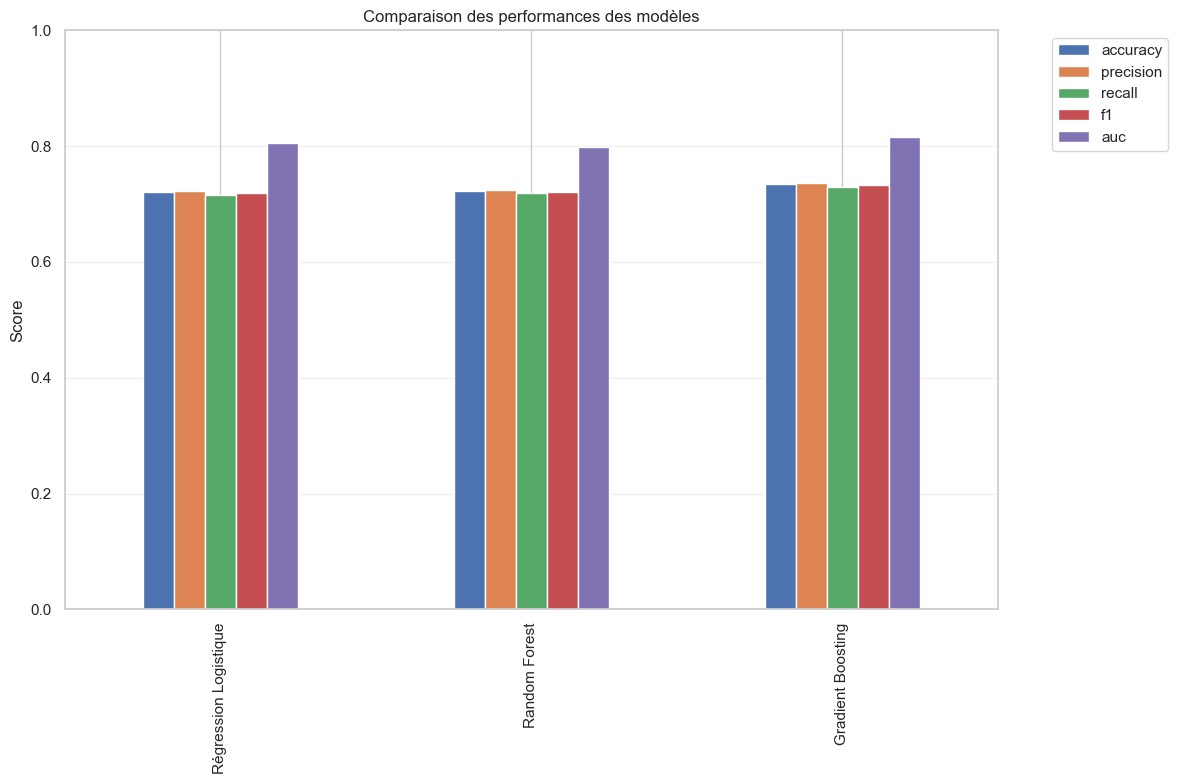


Meilleur modèle sélectionné: Gradient Boosting
F1 Score: 0.7328

Top 20 des caractéristiques les plus importantes:


,Feature,Importance
141,reach_advantage_red,0.141014
139,overall_score_red_advantage,0.130702
111,win_ratio_red_advantage,0.125058
32,wins_red_advantage,0.066699
107,win_ratio_abs_diff,0.057977
106,b_win_ratio,0.032903
118,offensive_eff_red_advantage,0.031370
105,r_win_ratio,0.029053
47,weight_red_advantage,0.020835
1,b_wins,0.020659


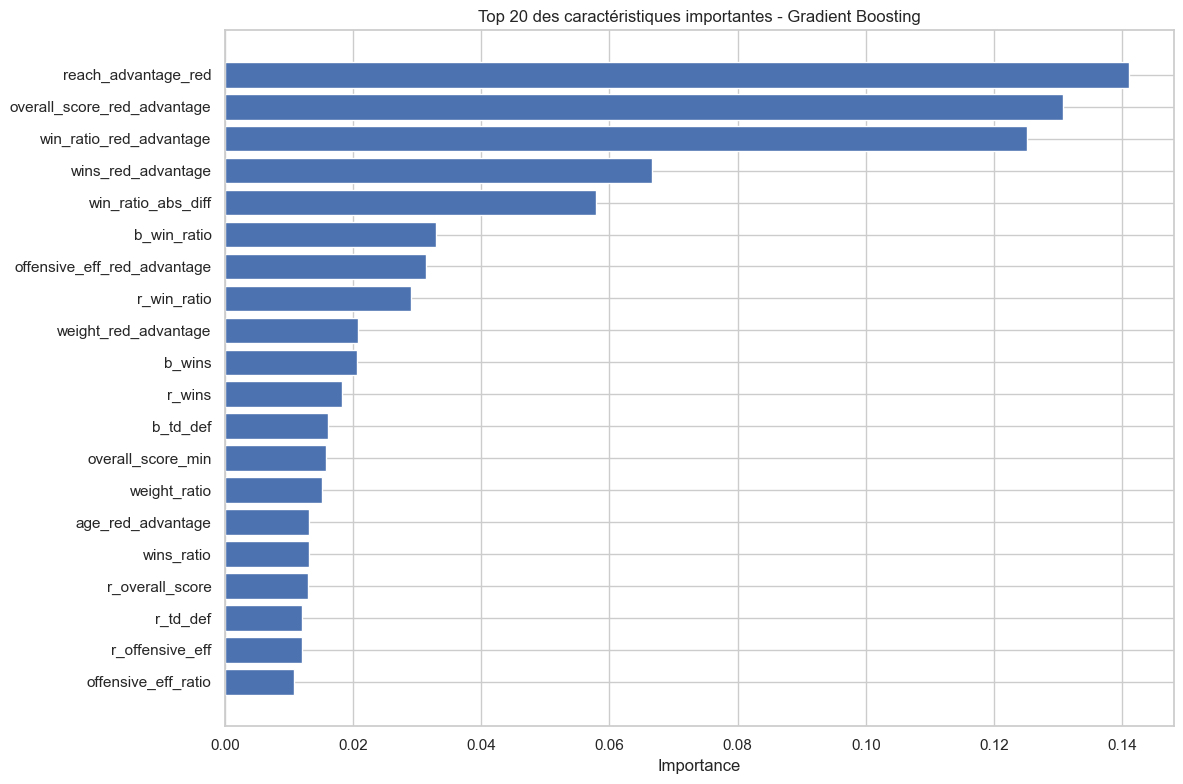

In [115]:
# Entraînement des modèles avec optimisation des hyperparamètres
def train_optimized_models():
    """
    Entraîne plusieurs modèles avec optimisation des hyperparamètres
    """
    print("Entraînement des modèles avec optimisation des hyperparamètres...")
    
    # Modèles à entraîner avec leurs hyperparamètres
    models_params = {
        'Régression Logistique': {
            'model': LogisticRegression(max_iter=10000, random_state=42),
            'params': {
                'C': [0.01, 0.1, 1.0, 10.0],
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        }
    }
    
    results = {}
    
    for name, config in models_params.items():
        print(f"\nOptimisation du modèle: {name}")
        model = config['model']
        params = config['params']
        
        try:
            # Optimisation des hyperparamètres avec validation croisée
            grid_search = GridSearchCV(
                model, params, cv=5, scoring='f1',
                n_jobs=-1, verbose=1
            )
            
            grid_search.fit(X_train_scaled, y_train)
            
            # Meilleur modèle et ses paramètres
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            
            print(f"Meilleurs paramètres: {best_params}")
            print(f"Score de validation croisée: {best_score:.4f}")
            
            # Évaluation sur l'ensemble de test
            y_pred = best_model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            # Calculer l'AUC si possible
            if hasattr(best_model, 'predict_proba'):
                y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
                auc = roc_auc_score(y_test, y_proba)
            else:
                auc = 0.0
            
            print(f"Performances sur l'ensemble de test:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"AUC: {auc:.4f}")
            
            # Matrice de confusion
            cm = confusion_matrix(y_test, y_pred)
            print("Matrice de confusion:")
            print(cm)
            
            # Enregistrer le modèle et ses métriques
            results[name] = {
                'model': best_model,
                'params': best_params,
                'cv_score': best_score,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc
            }
            
        except Exception as e:
            print(f"Erreur lors de l'entraînement du modèle {name}: {e}")
    
    # Comparer les performances des modèles
    if results:
        results_df = pd.DataFrame({
            name: {k: v for k, v in info.items() if k not in ['model', 'params']}
            for name, info in results.items()
        }).T
        
        display(results_df)
        
        # Visualisation comparative
        plt.figure(figsize=(12, 6))
        results_df[['accuracy', 'precision', 'recall', 'f1', 'auc']].plot(kind='bar')
        plt.title('Comparaison des performances des modèles')
        plt.ylabel('Score')
        plt.ylim(0, 1)
        plt.grid(axis='y', alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # Sélectionner le meilleur modèle basé sur le F1 score
        best_model_name = results_df['f1'].idxmax()
        best_model = results[best_model_name]['model']
        
        print(f"\nMeilleur modèle sélectionné: {best_model_name}")
        print(f"F1 Score: {results[best_model_name]['f1']:.4f}")
        
        # Analyse des features importantes pour le meilleur modèle
        if hasattr(best_model, 'feature_importances_'):
            # Pour Random Forest et Gradient Boosting
            feature_importances = pd.DataFrame({
                'Feature': X.columns,
                'Importance': best_model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            # Afficher les 20 caractéristiques les plus importantes
            print("\nTop 20 des caractéristiques les plus importantes:")
            display(feature_importances.head(20))
            
            # Visualisation des caractéristiques importantes
            plt.figure(figsize=(12, 8))
            plt.barh(feature_importances['Feature'].head(20), feature_importances['Importance'].head(20))
            plt.title(f'Top 20 des caractéristiques importantes - {best_model_name}')
            plt.xlabel('Importance')
            plt.gca().invert_yaxis()  # Afficher la plus importante en haut
            plt.tight_layout()
            plt.show()
            
        elif hasattr(best_model, 'coef_'):
            # Pour la régression logistique
            coefficients = pd.DataFrame({
                'Feature': X.columns,
                'Coefficient': best_model.coef_[0]
            }).sort_values('Coefficient', key=abs, ascending=False)
            
            print("\nTop 20 des caractéristiques les plus importantes:")
            display(coefficients.head(20))
            
            # Visualisation des coefficients
            plt.figure(figsize=(12, 8))
            plt.barh(coefficients['Feature'].head(20), coefficients['Coefficient'].head(20))
            plt.title(f'Top 20 des coefficients - {best_model_name}')
            plt.xlabel('Coefficient')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
        
        return best_model, best_model_name
    else:
        print("Aucun modèle n'a pu être entraîné correctement.")
        return None, None

# Entraîner les modèles
best_model, best_model_name = train_optimized_models()

In [116]:
# Sauvegarder le modèle final
def save_model(model, file_path='ufc_prediction_model.pkl'):
    """
    Sauvegarde le modèle final avec ses métadonnées
    """
    try:
        print(f"Sauvegarde du modèle dans {file_path}...")
        
        model_info = {
            'model': model,
            'scaler': scaler,
            'feature_names': list(X.columns)
        }
        
        joblib.dump(model_info, file_path)
        print("Modèle sauvegardé avec succès!")
        return True
    except Exception as e:
        print(f"Erreur lors de la sauvegarde du modèle: {e}")
        return False

# Tester si le modèle présente un biais positionnel
def test_position_bias():
    """
    Vérifie si le modèle présente un biais positionnel en comparant les prédictions
    dans les deux configurations possibles (rouge/bleu)
    """
    print("\nTest du biais positionnel du modèle...")
    
    # Charger le modèle final
    model_info = joblib.load('ufc_prediction_model.pkl')
    model = model_info['model']
    scaler = model_info['scaler']
    feature_names = model_info['feature_names']
    
    # Sélectionner quelques combats de test
    test_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)
    
    for idx in test_indices:
        # Récupérer un exemple de test
        test_example = X_test.iloc[idx:idx+1]
        
        # Créer une version inversée de cet exemple (swap rouge/bleu)
        swapped_example = test_example.copy()
        
        # Inverser les colonnes d'avantage (_red_advantage)
        for col in test_example.columns:
            if col.endswith('_red_advantage'):
                swapped_example[col] = 1 - test_example[col]
        
        # Inverser le signe des avantages directs
        direct_advantages = ['height_advantage_red', 'reach_advantage_red', 'age_advantage_red']
        for col in direct_advantages:
            if col in swapped_example.columns:
                swapped_example[col] = -test_example[col]
        
        # Normaliser les deux exemples
        test_example_scaled = scaler.transform(test_example)
        swapped_example_scaled = scaler.transform(swapped_example)
        
        # Faire les prédictions
        pred_prob = model.predict_proba(test_example_scaled)[0, 1]  # Proba Rouge gagne
        swapped_pred_prob = 1 - model.predict_proba(swapped_example_scaled)[0, 1]  # 1 - Proba Bleu gagne
        
        # Comparer les probabilités
        diff = abs(pred_prob - swapped_pred_prob)
        
        print(f"Exemple de test #{idx}")
        print(f"Probabilité rouge gagne (original): {pred_prob:.4f}")
        print(f"Probabilité rouge gagne (inversé): {swapped_pred_prob:.4f}")
        print(f"Différence de probabilité: {diff:.4f}")
        
        if diff > 0.1:
            print("⚠️ Biais positionnel détecté!")
        else:
            print("✅ Pas de biais significatif")
        print("")
    
    return

# Si un modèle a été entraîné, le sauvegarder et le tester
if best_model is not None:
    save_model(best_model)
    test_position_bias()

Sauvegarde du modèle dans ufc_prediction_model.pkl...
Modèle sauvegardé avec succès!

Test du biais positionnel du modèle...
Exemple de test #1207
Probabilité rouge gagne (original): 0.6610
Probabilité rouge gagne (inversé): 0.4973
Différence de probabilité: 0.1638
⚠️ Biais positionnel détecté!

Exemple de test #1541
Probabilité rouge gagne (original): 0.2775
Probabilité rouge gagne (inversé): 0.4365
Différence de probabilité: 0.1591
⚠️ Biais positionnel détecté!

Exemple de test #1368
Probabilité rouge gagne (original): 0.4308
Probabilité rouge gagne (inversé): 0.3964
Différence de probabilité: 0.0343
✅ Pas de biais significatif

Exemple de test #945
Probabilité rouge gagne (original): 0.0806
Probabilité rouge gagne (inversé): 0.3235
Différence de probabilité: 0.2429
⚠️ Biais positionnel détecté!

Exemple de test #43
Probabilité rouge gagne (original): 0.3505
Probabilité rouge gagne (inversé): 0.3456
Différence de probabilité: 0.0048
✅ Pas de biais significatif



In [21]:
# Fonction de prédiction finale pour le notebook
def predict_fight(fighter_a, fighter_b, odds_a=0, odds_b=0):
    """
    Prédit l'issue d'un combat entre deux combattants
    Utilise le modèle entraîné pour faire une prédiction équitable
    """
    print(f"Prédiction du combat: {fighter_a['name']} vs {fighter_b['name']}")
    
    try:
        # Charger le modèle
        model_info = joblib.load('ufc_prediction_model.pkl')
        model = model_info['model']
        scaler = model_info['scaler']
        feature_names = model_info['feature_names']
        
        # Créer un DataFrame temporaire avec les combattants
        fight_df = pd.DataFrame([{
            'r_fighter': fighter_a['name'],
            'b_fighter': fighter_b['name'],
            'winner': 'Unknown'  # Valeur temporaire
        }])
        
        # Ajouter les statistiques des combattants
        fighter_stats = ['wins', 'losses', 'height', 'weight', 'reach', 'age',
                         'SLpM', 'sig_str_acc', 'SApM', 'str_def', 
                         'td_avg', 'td_acc', 'td_def', 'sub_avg']
        
        for stat in fighter_stats:
            if stat in fighter_a:
                fight_df.at[0, f'r_{stat}'] = fighter_a[stat]
            if stat in fighter_b:
                fight_df.at[0, f'b_{stat}'] = fighter_b[stat]
        
        # Appliquer le même feature engineering
        engineered_df = engineer_symmetric_features(fight_df)
        
        # Sélectionner les mêmes features que pour l'entraînement
        X_pred = engineered_df[[col for col in feature_names if col in engineered_df.columns]]
        
        # S'assurer que toutes les features sont présentes
        missing_features = [col for col in feature_names if col not in X_pred.columns]
        if missing_features:
            for col in missing_features:
                X_pred[col] = 0
        
        # Normaliser
        X_pred_scaled = scaler.transform(X_pred[feature_names])
        
        # Prédiction
        pred_proba = model.predict_proba(X_pred_scaled)[0, 1]  # Probabilité que Rouge gagne
        pred_winner = 'Red' if pred_proba > 0.5 else 'Blue'
        
        # Résultat
        result = {
            'prediction': pred_winner,
            'winner_name': fighter_a['name'] if pred_winner == 'Red' else fighter_b['name'],
            'loser_name': fighter_b['name'] if pred_winner == 'Red' else fighter_a['name'],
            'red_probability': pred_proba,
            'blue_probability': 1 - pred_proba,
            'confidence': 'Élevé' if abs(pred_proba - 0.5) > 0.2 else 'Modéré'
        }
        
        # Analyse des paris si des cotes sont fournies
        if odds_a > 0 and odds_b > 0:
            # Probabilité implicite selon les bookmakers
            implied_prob_a = 1 / odds_a
            implied_prob_b = 1 / odds_b
            
            # Normaliser pour éliminer la marge du bookmaker
            total_implied = implied_prob_a + implied_prob_b
            implied_prob_a_norm = implied_prob_a / total_implied
            implied_prob_b_norm = implied_prob_b / total_implied
            
            # Valeur espérée (Expected Value)
            ev_a = (pred_proba * odds_a) - 1
            ev_b = ((1 - pred_proba) * odds_b) - 1
            
            # Recommandation de pari
            bet_recommendation_a = "Favorable" if ev_a > 0.1 else "Neutre" if ev_a > -0.1 else "Défavorable"
            bet_recommendation_b = "Favorable" if ev_b > 0.1 else "Neutre" if ev_b > -0.1 else "Défavorable"
            
            result['betting'] = {
                'odds_red': odds_a,
                'odds_blue': odds_b,
                'implied_prob_red': implied_prob_a_norm,
                'implied_prob_blue': implied_prob_b_norm,
                'ev_red': ev_a,
                'ev_blue': ev_b,
                'recommendation_red': bet_recommendation_a,
                'recommendation_blue': bet_recommendation_b,
                'edge_red': pred_proba - implied_prob_a_norm,
                'edge_blue': (1 - pred_proba) - implied_prob_b_norm
            }
        
        # Vérifier le biais positionnel (prédiction avec positions inversées)
        fight_df_swapped = pd.DataFrame([{
            'r_fighter': fighter_b['name'],
            'b_fighter': fighter_a['name'],
            'winner': 'Unknown'
        }])
        
        for stat in fighter_stats:
            if stat in fighter_b:
                fight_df_swapped.at[0, f'r_{stat}'] = fighter_b[stat]
            if stat in fighter_a:
                fight_df_swapped.at[0, f'b_{stat}'] = fighter_a[stat]
        
        engineered_df_swapped = engineer_symmetric_features(fight_df_swapped)
        X_pred_swapped = engineered_df_swapped[[col for col in feature_names if col in engineered_df_swapped.columns]]
        
        for col in missing_features:
            X_pred_swapped[col] = 0
        
        X_pred_swapped_scaled = scaler.transform(X_pred_swapped[feature_names])
        pred_proba_swapped = 1 - model.predict_proba(X_pred_swapped_scaled)[0, 1]  # 1 - Prob que Rouge (fighter B) gagne
        
        # Vérifier la cohérence
        if abs(pred_proba - pred_proba_swapped) > 0.1:
            print(f"⚠️ Attention: détection d'un biais positionnel ({abs(pred_proba - pred_proba_swapped):.4f})")
            print(f"Probabilité A gagne (A en rouge): {pred_proba:.4f}")
            print(f"Probabilité A gagne (A en bleu): {pred_proba_swapped:.4f}")
            
            # Utiliser la moyenne des deux prédictions pour réduire le biais
            avg_prob = (pred_proba + pred_proba_swapped) / 2
            result['red_probability'] = avg_prob
            result['blue_probability'] = 1 - avg_prob
            result['prediction'] = 'Red' if avg_prob > 0.5 else 'Blue'
            result['winner_name'] = fighter_a['name'] if avg_prob > 0.5 else fighter_b['name']
            result['loser_name'] = fighter_b['name'] if avg_prob > 0.5 else fighter_a['name']
            result['confidence'] = 'Élevé' if abs(avg_prob - 0.5) > 0.2 else 'Modéré'
            result['balanced_prediction'] = True
            
            # Mettre à jour l'analyse des paris si présente
            if 'betting' in result:
                result['betting']['ev_red'] = (avg_prob * odds_a) - 1
                result['betting']['ev_blue'] = ((1 - avg_prob) * odds_b) - 1
                result['betting']['recommendation_red'] = "Favorable" if result['betting']['ev_red'] > 0.1 else "Neutre" if result['betting']['ev_red'] > -0.1 else "Défavorable"
                result['betting']['recommendation_blue'] = "Favorable" if result['betting']['ev_blue'] > 0.1 else "Neutre" if result['betting']['ev_blue'] > -0.1 else "Défavorable"
                result['betting']['edge_red'] = avg_prob - result['betting']['implied_prob_red']
                result['betting']['edge_blue'] = (1 - avg_prob) - result['betting']['implied_prob_blue']
        
        return result
        
    except Exception as e:
        print(f"Erreur lors de la prédiction: {e}")
        # Prédiction par défaut en cas d'erreur
        return {
            'prediction': 'Erreur',
            'winner_name': 'Inconnu',
            'loser_name': 'Inconnu',
            'red_probability': 0.5,
            'blue_probability': 0.5,
            'confidence': 'Faible',
            'error': str(e)
        }

# Tester la fonction avec les combattants d'exemple
try:
    # Récupérer deux combattants d'exemple
    example_fighters = list(fighters_dict.keys())[:2]
    fighter_a = fighters_dict[example_fighters[0]]
    fighter_b = fighters_dict[example_fighters[1]]
    
    # Afficher leurs statistiques
    print(f"\nStatistiques de {fighter_a['name']}:")
    for key, value in fighter_a.items():
        if key != 'name':
            print(f"- {key}: {value}")
    
    print(f"\nStatistiques de {fighter_b['name']}:")
    for key, value in fighter_b.items():
        if key != 'name':
            print(f"- {key}: {value}")
    
    # Faire une prédiction
    prediction = predict_fight(fighter_a, fighter_b, odds_a=2.0, odds_b=1.8)
    
    print("\nRÉSULTAT DE LA PRÉDICTION:")
    print(f"Vainqueur prédit: {prediction['winner_name']}")
    print(f"Probabilité de victoire: {prediction['red_probability']:.2f} pour {fighter_a['name']}, " 
          f"{prediction['blue_probability']:.2f} pour {fighter_b['name']}")
    print(f"Niveau de confiance: {prediction['confidence']}")
    
    if 'betting' in prediction:
        print("\nANALYSE DES PARIS:")
        betting = prediction['betting']
        print(f"{fighter_a['name']}: Cote {betting['odds_red']:.2f}, Valeur espérée {betting['ev_red']*100:.1f}%, "
              f"Recommandation: {betting['recommendation_red']}")
        print(f"{fighter_b['name']}: Cote {betting['odds_blue']:.2f}, Valeur espérée {betting['ev_blue']*100:.1f}%, "
              f"Recommandation: {betting['recommendation_blue']}")
except Exception as e:
    print(f"Erreur lors du test de la fonction de prédiction: {e}")


Statistiques de Josh Emmett:
- wins: 19
- losses: 5
- height: 167.64
- weight: 65.77
- reach: 177.8
- stance: Orthodox
- age: 40
- SLpM: 3.75
- sig_str_acc: 0.35
- SApM: 4.46
- str_def: 0.6
- td_avg: 1.09
- td_acc: 0.37
- td_def: 0.46
- sub_avg: 0.1

Statistiques de Lerone Murphy:
- wins: 16
- losses: 0
- height: 175.26
- weight: 65.77
- reach: 185.42
- stance: Orthodox
- age: 33
- SLpM: 4.53
- sig_str_acc: 0.54
- SApM: 2.48
- str_def: 0.61
- td_avg: 1.45
- td_acc: 0.54
- td_def: 0.52
- sub_avg: 0.5
Prédiction du combat: Josh Emmett vs Lerone Murphy
Erreur lors de la prédiction: name 'engineer_symmetric_features' is not defined

RÉSULTAT DE LA PRÉDICTION:
Vainqueur prédit: Inconnu
Probabilité de victoire: 0.50 pour Josh Emmett, 0.50 pour Lerone Murphy
Niveau de confiance: Faible
